<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

# **Modeling Suicide Risk**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import pearsonr


In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Read formatted linked persons
final23 = pd.read_csv("final/final2023.csv")    # Linked class of 2023
final24 = pd.read_csv("final/final2024.csv")    # Linked class of 2024
final25 = pd.read_csv("final/final2025.csv")    # Linked class of 2025
final26 = pd.read_csv("final/final2026.csv")    # Linked class of 2026
all_linked = pd.concat([final23, final24, final25, final26], ignore_index=True, axis=0)

cohorts = range(2023, 2027)
years = range(2020, 2024)

final = {
    2023: final23,
    2024: final24,
    2025: final25,
    2026: final26,
}

In [60]:
# All common questions across years

# Survey
survey = [
    "Unnamed: 0",
    "IDX.INT.Origin.Database",
    "IDX.INT.Origin.Record",
    "SSS.INT.SurveyYear",
    "IDX.INT.Row",
    "IDX.CHR.Linked.ID",
    "QCC.LGC.Linked.Attempted",
    "QCC.LGC.Linked",
    "QCC.LGC.Linked.No_issues",
    "QCC.CHR.Linked.Score.Base",
    "QCC.CHR.Linked.Score.Add",
    "QCC.CHR.Linked.Rows",
    "QCC.CHR.Linked.Dissimilarity",
]
   
# Adolescent Psychotic-like Symptoms 
psychotic = [
    "INV.DBL.APSS.Q1.MindReading",
    "INV.DBL.APSS.Q2.TVRadio",
    "INV.DBL.APSS.Q3.Spying",
    "INV.DBL.APSS.Q4.Auditory",
    "INV.DBL.APSS.Q5.Controlled",
    "INV.DBL.APSS.Q6.Visual",
    "INV.DBL.APSS.Q7.Grandiosity",
    "INV.DBL.APSS.Total",
]
    
# Emotional Reactivity 
emotional = [
    "INV.INT.ERS.IntensityArousalTotal",
    "INV.INT.ERS.PersistenceTotal",
    "INV.INT.ERS.Q01.Persistence1",
    "INV.INT.ERS.Q02.Sensitivity1",
    "INV.INT.ERS.Q03.IntensityArousal1",
    "INV.INT.ERS.Q04.IntensityArousal2",
    "INV.INT.ERS.Q05.Sensitivity2",
    "INV.INT.ERS.Q06.IntensityArousal3",
    "INV.INT.ERS.Q07.Sensitivity3",
    "INV.INT.ERS.Q08.Persistence2",
    "INV.INT.ERS.Q09.Sensitivity4",
    "INV.INT.ERS.Q10.Persistence3",
    "INV.INT.ERS.Q11.Persistence4",
    "INV.INT.ERS.Q12.Sensitivity5",
    "INV.INT.ERS.Q13.Sensitivity6",
    "INV.INT.ERS.Q14.Sensitivity7",
    "INV.INT.ERS.Q15.Sensitivity8",
    "INV.INT.ERS.Q16.Sensitivity9",
    "INV.INT.ERS.Q17.IntensityArousal4",
    "INV.INT.ERS.Q18.Sensitivity10",
    "INV.INT.ERS.Q19.IntensityArousal5",
    "INV.INT.ERS.Q20.IntensityArousal6",
    "INV.INT.ERS.Q21.IntensityArousal7",
    "INV.INT.ERS.SensitivityTotal",
    "INV.INT.ERS.Total",
]
    
# PHQ4
phq4 = [
    "INV.INT.PHQ4.Anxiety",
    "INV.INT.PHQ4.Depression",
    "INV.INT.PHQ4.Q1.Anxious",
    "INV.INT.PHQ4.Q2.Worried",
    "INV.INT.PHQ4.Q3.Depressed",
    "INV.INT.PHQ4.Q4.Anhedonia",
    "INV.INT.PHQ4.Total",
    "INV.LGL.PHQ4.Anxiety",
    "INV.LGL.PHQ4.Depression",
    # "INV.FCT.PHQ4.Total",
]
    
# Suicidality
suicide = [
    "INV.INT.SI.Attempt",
    "INV.INT.SI.How",
    "INV.INT.SI.Selfharm",
    "INV.INT.SI.Thoughts",
]
    
# Substance Use
substance = [
    "INV.INT.SUB.Alcohol.Past30",
    "INV.INT.SUB.Cannabis.Past30",
    "INV.INT.SUB.Cigarettes.Past30",
    "INV.INT.SUB.Cigars.Past30",
    "INV.INT.SUB.Smokeless.Past30",
    "INV.INT.SUB.Vapes.Past30",
    
    "INV.LGL.SUB.Alcohol.Life",
    "INV.LGL.SUB.Cannabis.Life",
    "INV.LGL.SUB.Cigarettes.Life",
    "INV.LGL.SUB.Cigars.Life",
    "INV.LGL.SUB.Smokeless.Life",
    "INV.LGL.SUB.Vapes.Life",
]
    
# Help Seeking
help = [
    "INV.LGL.HelpSeeking0",
    "INV.LGL.HelpSeeking1",
    "INV.LGL.HelpSeeking10",
    "INV.LGL.HelpSeeking11",
    "INV.LGL.HelpSeeking12",
    "INV.LGL.HelpSeeking13",
    "INV.LGL.HelpSeeking2",
    "INV.LGL.HelpSeeking3",
    "INV.LGL.HelpSeeking4",
    "INV.LGL.HelpSeeking5",
    "INV.LGL.HelpSeeking6",
    "INV.LGL.HelpSeeking7",
    "INV.LGL.HelpSeeking8",
    "INV.LGL.HelpSeeking9",
    # "INV.CHR.HelpSeeking.Other",
]
    
# Identity
identity = [
    # "SBJ.CHR.Gender.Other",
    # "SBJ.CHR.Link.Streetname",
    # "SBJ.CHR.SexualOrientation.Other",
    "SBJ.FCT.Ethnicity",
    "SBJ.FCT.GenderId",
    # "SBJ.FCT.Link.BirthMonth",
    # "SBJ.FCT.Link.EyeColor",
    # "SBJ.FCT.Link.MiddleInitial",
    # "SBJ.FCT.Link.OlderSiblings",
    # "SBJ.FCT.Race",
    "SBJ.FCT.Sex",
    "SBJ.FCT.Sexuality",
    # "SBJ.INT.Link.KindergartenYearEst",
    "SBJ.LGL.Race.AmericanIndianAlaskaNative",
    "SBJ.LGL.Race.Asian",
    "SBJ.LGL.Race.HaitianBlackAfricanAmerican",
    "SBJ.LGL.Race.HawaiianPacificIslander",
    "SBJ.LGL.Race.MiddleEasternNorthAfrican",
    "SBJ.LGL.Race.Multiple",
    # "SBJ.LGL.Race.Other",
    "SBJ.LGL.Race.White",
]
    
# School
school = [
    "SSS.CHR.GradesSurveyed",
    "SSS.DBL.PercentOptOutsbyGrades",
    "SSS.DBL.PercentOptOutsbySchool",
    "SSS.INT.Cohort",
    "SSS.INT.District.Code",
    "SSS.INT.Eighth.Grade.Enrollment",
    "SSS.INT.Eleventh.Grade.Enrollment",
    "SSS.INT.Fifth.Grade.Enrollment",
    "SSS.INT.Grade",
    "SSS.INT.Ninth.Grade.Enrollment",
    "SSS.INT.School.Code",
    "SSS.INT.Seventh.Grade.Enrollment",
    "SSS.INT.Sixth.Grade.Enrollment",
    "SSS.INT.Tenth.Grade.Enrollment",
    "SSS.INT.Time_point",
    "SSS.INT.Twelfth.Grade.Enrollment",
]

all_qs = psychotic + help + suicide + school + identity + substance + phq4

<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Preprocessing**

Replacing NA's with "missing" categories. 

In [61]:
def get_yearly_columns(base_cols, years):
    return [f"{col}{year}" for col in base_cols for year in years]

In [62]:
def preprocess(df):
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    df[num_cols] = df[num_cols].fillna(-1)
    
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    df[cat_cols] = df[cat_cols].fillna("missing")
    
    df = df.replace({True: 1, False: 0, "missing": -1})
    
    genderid_cols = get_yearly_columns(["SBJ.FCT.GenderId", "SBJ.FCT.Sex", "SBJ.FCT.Sexuality"], years)
    df[genderid_cols] = df[genderid_cols].replace({
        "Boy/ man/ male": 1, 
        "Boy/man/male": 1,
        "Girl/ woman/ female": 2,
        "Girl/woman/female": 2,
        "Transgender male": 3,
        "Transgender boy/man/male": 3,
        "Transgender female": 4,
        "Transgender Girl/woman/female": 4,
        "Non-binary, genderqueer, or not exclusively male or female": 5,
        "Another gender": 6,
        "Not sure": 7,
        "I don't want to say": 8,
        "Male": 0,
        "Female": 1,
        "Asexual": 6,
        "Bisexual": 3,
        "Gay or Lesbian": 2,
        "I don't want to say": 10,
        "Pansexual": 5,
        "Queer": 4,
        "Something else": 7,
        "Straight or heterosexual": 1,
        "Straight": 1,
        "Unsure": 8,
        "I haven't thought about it or I don't know what this question means": 9,
        "Questioning or still figuring it out": 8,
    })
    
    ethnicity_cols = get_yearly_columns(["SBJ.FCT.Ethnicity"], years)
    df[ethnicity_cols] = df[ethnicity_cols].replace({
        "Hispanic/ Latino(a)": 1, 
        "Not Hispanic/ Latino(a)": 0,
        "Hispanic/ latino(a)": 1,
        "Not Hispanic/latino(a)": 0,
    })
    
    
    return df

In [63]:
final23 = preprocess(final23)
final24 = preprocess(final24)
final25 = preprocess(final25)
final26 = preprocess(final26)
all_linked = preprocess(all_linked)

for year, df in final.items():
    final[year] = preprocess(df)

In [64]:
import os

# Create the directory if it doesn't exist
output_dir = "processed"
final23.to_csv(os.path.join(output_dir, "final23.csv"), index=False)
final24.to_csv(os.path.join(output_dir, "final24.csv"), index=False)
final25.to_csv(os.path.join(output_dir, "final25.csv"), index=False)
final26.to_csv(os.path.join(output_dir, "final26.csv"), index=False)
all_linked.to_csv(os.path.join(output_dir, "all_linked.csv"), index=False)


<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Classification**

High risk, low risk.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
def preprocess_and_train(df, target_col, model, feature_cols):
    # drop rows where target is missing response
    df = df[df[target_col] != -1]
    
    X = df[feature_cols]
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return {"model": model, "accuracy": accuracy, "report": report}

In [10]:
def get_classifer_stats(df, feature_cols):
    questions = []
    maj_accuracies = []
    rf_accuracies = []

    for q in suicide:
        q = f"{q}2023"
        questions.append(q)
        print(q, "\n")
        
        # Majority Class model
        majclass_model = DummyClassifier(strategy='most_frequent')
        result = preprocess_and_train(df, q, majclass_model, feature_cols)

        print("Majority Class")
        print("Model Accuracy:", result["accuracy"])
        print("Classification Report:\n", result["report"])
        maj_accuracies.append(result["accuracy"])

        # Random Forest model
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        result = preprocess_and_train(df, q, rf_model, feature_cols)

        print("Random Forest")
        print("Model Accuracy:", result["accuracy"])
        print("Classification Report:\n", result["report"])
        rf_accuracies.append(result["accuracy"])
    
    stats = pd.DataFrame({
        "Question": questions,
        "Majority Class": maj_accuracies,
        "Random Forest": rf_accuracies
    })
    
    return stats

___________

### **Kitchen Sink One-Step**

In [11]:
one_step_feature_cols = [*get_yearly_columns(suicide, [2022]), 
                         *get_yearly_columns(psychotic, [2022]), 
                         *get_yearly_columns(phq4, [2022]), 
                         *get_yearly_columns(substance, [2022]), 
                         *get_yearly_columns(identity, [2022]), 
                         *get_yearly_columns(help, [2022])]

In [12]:
classifer_stats = []
for cohort in cohorts:
    classifer_stats.append(get_classifer_stats(final[cohort], one_step_feature_cols))

INV.INT.SI.Attempt2023 

Majority Class
Model Accuracy: 0.9662731871838112
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Random Forest
Model Accuracy: 0.9679595278246206
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       1.00      0.05      0.10        20

    accuracy                           0.97       593
   macro avg       0.98      0.53      0.54       593
weighted avg       0.97      0.97      0.95       593

INV.INT.SI.How2023 

Majority Class
Model Accuracy: 0.8277027027027027
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83 

In [13]:
for i, stats in enumerate(classifer_stats):
    print(f"final{cohorts[i]}")
    display(stats)

final2023


Question  Majority Class  Random Forest
0   INV.INT.SI.Attempt2023        0.966273       0.967960
1       INV.INT.SI.How2023        0.827703       0.832770
2  INV.INT.SI.Selfharm2023        0.893401       0.893401
3  INV.INT.SI.Thoughts2023        0.795953       0.799325

final2024


Question  Majority Class  Random Forest
0   INV.INT.SI.Attempt2023        0.973611       0.973611
1       INV.INT.SI.How2023        0.840278       0.845833
2  INV.INT.SI.Selfharm2023        0.927778       0.929167
3  INV.INT.SI.Thoughts2023        0.834951       0.843273

final2025


Question  Majority Class  Random Forest
0   INV.INT.SI.Attempt2023        0.953778       0.953778
1       INV.INT.SI.How2023        0.889778       0.889778
2  INV.INT.SI.Selfharm2023        0.904804       0.907473
3  INV.INT.SI.Thoughts2023        0.852706       0.860692

final2026


Question  Majority Class  Random Forest
0   INV.INT.SI.Attempt2023        0.972973       0.972973
1       INV.INT.SI.How2023        0.894784       0.894784
2  INV.INT.SI.Selfharm2023        0.890090       0.890090
3  INV.INT.SI.Thoughts2023        0.845463       0.845463

_________

### **Kitchen Sink Two-Step**

In [14]:
two_step_feature_cols = [*get_yearly_columns(suicide, [2022]), 
                         *get_yearly_columns(psychotic, [2022, 2021]), 
                         *get_yearly_columns(phq4, [2022, 2021]), 
                         *get_yearly_columns(substance, [2022, 2021]), 
                         *get_yearly_columns(identity, [2022, 2021]), 
                         *get_yearly_columns(help, [2022, 2021])]

In [15]:
classifer_stats_two_step = []
for cohort in cohorts:
    classifer_stats_two_step.append(get_classifer_stats(final[cohort], two_step_feature_cols))

INV.INT.SI.Attempt2023 

Majority Class
Model Accuracy: 0.9662731871838112
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Random Forest
Model Accuracy: 0.9679595278246206
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       1.00      0.05      0.10        20

    accuracy                           0.97       593
   macro avg       0.98      0.53      0.54       593
weighted avg       0.97      0.97      0.95       593

INV.INT.SI.How2023 

Majority Class
Model Accuracy: 0.8277027027027027
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83 

In [16]:
for i, stats in enumerate(classifer_stats_two_step):
    print(f"final{cohorts[i]}")
    display(stats)

final2023


Question  Majority Class  Random Forest
0   INV.INT.SI.Attempt2023        0.966273       0.967960
1       INV.INT.SI.How2023        0.827703       0.829392
2  INV.INT.SI.Selfharm2023        0.893401       0.895093
3  INV.INT.SI.Thoughts2023        0.795953       0.797639

final2024


Question  Majority Class  Random Forest
0   INV.INT.SI.Attempt2023        0.973611       0.973611
1       INV.INT.SI.How2023        0.840278       0.848611
2  INV.INT.SI.Selfharm2023        0.927778       0.929167
3  INV.INT.SI.Thoughts2023        0.834951       0.843273

final2025


Question  Majority Class  Random Forest
0   INV.INT.SI.Attempt2023        0.953778       0.953778
1       INV.INT.SI.How2023        0.889778       0.891556
2  INV.INT.SI.Selfharm2023        0.904804       0.910142
3  INV.INT.SI.Thoughts2023        0.852706       0.858030

final2026


Question  Majority Class  Random Forest
0   INV.INT.SI.Attempt2023        0.972973       0.972973
1       INV.INT.SI.How2023        0.894784       0.894784
2  INV.INT.SI.Selfharm2023        0.890090       0.890090
3  INV.INT.SI.Thoughts2023        0.845463       0.845463

<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Regression**

Risk score.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [18]:
def calculate_risk_score(df, weights, year):
    risk_columns = get_yearly_columns(suicide, [year])
    df[f"RiskScore{year}"] = df[risk_columns].apply(lambda row: sum(row[col] * weight for col, weight in zip(risk_columns, weights) if row[col] == 1), axis=1)
    return df

In [19]:
final23 = calculate_risk_score(final23, [4,3,2,1], 2023)

In [20]:
def train_risk_score_regressor(df, target_col, feature_cols, model):
    X = df[feature_cols]
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {"model": model, "mse": mse, "r2_score": r2}

In [21]:
lin_reg = LinearRegression()
regression_result = train_risk_score_regressor(final23, "RiskScore2023", one_step_feature_cols, lin_reg)

print("Risk Score Regression - MSE:", regression_result["mse"])
print("Risk Score Regression - R2 Score:", regression_result["r2_score"])

Risk Score Regression - MSE: 2.2982987906658754
Risk Score Regression - R2 Score: 0.04434799350018892


In [22]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
regression_result = train_risk_score_regressor(final23, "RiskScore2023", one_step_feature_cols, rf_reg)

print("Risk Score Regression - MSE:", regression_result["mse"])
print("Risk Score Regression - R2 Score:", regression_result["r2_score"])

Risk Score Regression - MSE: 2.310947734016013
Risk Score Regression - R2 Score: 0.03908845625387669


<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Compounding**

#### **Classification**

In [23]:
from collections import Counter

def preprocess_and_train(df, target_col, model, feature_cols):
    # drop rows where target is missing response
    df = df.replace("missing", -1).fillna(-1)
    df = df[df[target_col] != -1]
    
    X = df[feature_cols]
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Now using 2020 data to predict 2021 suicide questions
    feature_cols_2020 = [col.replace("2022", "2020") for col in feature_cols]
    target_col_2021 = target_col.replace("2023", "2021")
    
    if all(col in df.columns for col in feature_cols_2020):
        X_2020 = df[feature_cols_2020].copy()
        X_2020 = X_2020.fillna(-1)
        
        # Rename columns in X_2020 to match those used during training
        X_2020.rename(columns=dict(zip(feature_cols_2020, feature_cols)), inplace=True)
        
        y_pred_2021 = model.predict(X_2020)
        predictions_2021 = pd.DataFrame(y_pred_2021, columns=[target_col_2021])
        df = pd.concat([df, predictions_2021], axis=1)
    else:
        predictions_2021 = None
    
    return {
        "model": model,
        "accuracy_2023": accuracy,
        "classification_report_2023": report,
        "predictions_2021": Counter(predictions_2021[target_col_2021])
    }

In [24]:
rf_class_model = RandomForestClassifier(n_estimators=100, random_state=42)
result = preprocess_and_train(final23, "INV.INT.SI.Attempt2023", rf_class_model, one_step_feature_cols)
print("Model trained for classifying 2023 suicide-related responses.")
print("Accuracy for 2023 Predictions:", result["accuracy_2023"])
print("Classification Report for 2023 Predictions:")
print(result["classification_report_2023"])
if result["predictions_2021"] is not None:
    print("Predictions for 2021 Suicide Questions:")
    print(result["predictions_2021"])

Model trained for classifying 2023 suicide-related responses.
Accuracy for 2023 Predictions: 0.9679595278246206
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       1.00      0.05      0.10        20

    accuracy                           0.97       593
   macro avg       0.98      0.53      0.54       593
weighted avg       0.97      0.97      0.95       593

Predictions for 2021 Suicide Questions:
Counter({0.0: 2962})


________

#### **Regression**

In [25]:
def reg_preprocess_and_train(df, feature_cols):
    target_cols = get_yearly_columns(suicide, [2023])
    X = df[feature_cols]
    y = df[target_cols]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred_2023 = model.predict(X_test)
    mse_2023 = mean_squared_error(y_test, y_pred_2023, multioutput='uniform_average')
    r2_2023 = r2_score(y_test, y_pred_2023, multioutput='uniform_average')
    
    feature_cols_2020 = [col.replace("2022", "2020") for col in feature_cols]
    target_cols_2021 = [col.replace("2023", "2021") for col in target_cols]
    
    if all(col in df.columns for col in feature_cols_2020):
        X_2020 = df[feature_cols_2020].copy()
        X_2020.rename(columns=dict(zip(feature_cols_2020, feature_cols)), inplace=True)
        
        y_pred_2021 = model.predict(X_2020)
        predictions_2021 = pd.DataFrame(y_pred_2021, columns=target_cols_2021)
        df = pd.concat([df, predictions_2021], axis=1)
    else:
        predictions_2021 = None
    
    return {
        "model": model,
        "mse_2023": mse_2023,
        "r2_2023": r2_2023,
        "predictions_2021": predictions_2021
    }

In [26]:
result = reg_preprocess_and_train(final23, one_step_feature_cols)
print("Model trained for predicting 2023 suicide-related responses.")
print("MSE for 2023 Predictions:", result["mse_2023"])
print("R2 Score for 2023 Predictions:", result["r2_2023"])
if result["predictions_2021"] is not None:
    print("Predictions for 2021 Suicide Questions:")
    print(result["predictions_2021"])

Model trained for predicting 2023 suicide-related responses.
MSE for 2023 Predictions: 0.2601622976145843
R2 Score for 2023 Predictions: 0.20994108525436128
Predictions for 2021 Suicide Questions:
      INV.INT.SI.Attempt2021  INV.INT.SI.How2021  INV.INT.SI.Selfharm2021  \
0                  -0.665737           -0.665737                -0.665737   
1                  -0.790000           -0.790000                -0.790000   
2                  -0.665737           -0.665737                -0.665737   
3                  -0.565486           -0.555486                -0.555486   
4                  -0.689375           -0.669375                -0.669375   
...                      ...                 ...                      ...   
8272               -0.328457           -0.249045                -0.287689   
8273               -0.328457           -0.249045                -0.287689   
8274               -0.328457           -0.249045                -0.287689   
8275               -0.328457     

<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Predicting Probabilities**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.inspection import permutation_importance

In [47]:
def preprocess_and_train(df, target_col, feature_cols, model_name, model, param_grid):
    df = df.replace("missing", -1).fillna(-1)
    df = df[df[target_col] != -1]
    
    X = df[feature_cols]
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fine-tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Get probability of positive class
    
    accuracy = accuracy_score(y_test, best_model.predict(X_test))
    auc_score = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, best_model.predict(X_test))
    
    feature_cols_2020 = [col.replace("2022", "2020") for col in feature_cols]
    target_col_2021 = target_col.replace("2023", "2021")
    
    # plotting the ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # ax.figure()
    # ax.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
    # ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    # ax.set_xlim([0.0, 1.0])
    # ax.set_ylim([0.0, 1.05])
    # ax.set_xlabel('False Positive Rate')
    # ax.set_ylabel('True Positive Rate')
    # ax.set_title(f'{model_name} Receiver Operating Characteristic (ROC) Curve', fontsize=10)
    # ax.legend(loc='lower right')
    # ax.show()
    
    if all(col in df.columns for col in feature_cols_2020):
        X_2020 = df[feature_cols_2020].copy()
        X_2020 = X_2020.replace("missing", -1).fillna(-1)
        
        X_2020.rename(columns=dict(zip(feature_cols_2020, feature_cols)), inplace=True)
        
        y_pred_proba_2021 = best_model.predict_proba(X_2020)[:, 1]
        df[target_col_2021] = y_pred_proba_2021
    else:
        y_pred_proba_2021 = None
    
    return {
        "model": best_model,
        "best_params": grid_search.best_params_,
        "accuracy_2023": accuracy,
        "roc_auc_2023": auc_score,
        "classification_report_2023": report,
        "predicted_probabilities_2021": y_pred_proba_2021,
        "X_test": X_test,
        "y_test": y_test,
        "predicted_probabilities": y_pred_proba,  # Return this for ROC calculation
        "fpr": fpr,  # Return FPR
        "tpr": tpr,  # Return TPR
    }

In [ ]:
# models to try
maj_class_model = DummyClassifier(random_state=42)
log_class_model = LogisticRegression(random_state=42)
rf_class_model = RandomForestClassifier(random_state=42)
gb_class_model = GradientBoostingClassifier(random_state=42)
xgb_class_model = XGBClassifier(eval_metric='logloss')
lb_class_model = LGBMClassifier()
cb_class_model = CatBoostClassifier(verbose=0)
svc_class_model = SVC(probability=True)
mlp_class_model = MLPClassifier(max_iter=500)
bayes_class_model = GaussianNB()
lda_class_model = LinearDiscriminantAnalysis()
qda_class_model = QuadraticDiscriminantAnalysis()

models = {
    "MajorityClass": (maj_class_model, {}),
    "Logistic": (log_class_model, {'C': [0.1, 1, 10]}),
    "RandomForest": (rf_class_model, {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}),
    "GradientBoosting": (gb_class_model, {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    "XGBoost": (xgb_class_model, {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    "LightGBM": (lb_class_model, {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    "CatBoost": (cb_class_model, {'iterations': [50, 100], 'depth': [4, 6]}),
    "SupportVector": (svc_class_model, {'C': [0.1, 1, 10]}),
    "NeuralNet": (mlp_class_model, {'hidden_layer_sizes': [(50,), (100,)], 'max_iter': [300, 500]}),
    "NaiveBayes": (bayes_class_model, {'var_smoothing': [1e-9, 1e-8, 1e-7]}),
    "LDA": (lda_class_model, {'solver': ['svd', 'lsqr', 'eigen']}),
    "QDA": (qda_class_model, {'reg_param': [0.0, 0.1, 0.5]}),
}

In [49]:
def get_model_performance(model_name, mod, param_grid, question, feature_cols):
    result = preprocess_and_train(final23, question, feature_cols, model_name, mod, param_grid)
    print("Best Hyperparameters:", result["best_params"])
    print("Accuracy for 2023 Predictions:", result["accuracy_2023"])
    print("ROC AUC Score for 2023 Predictions:", result["roc_auc_2023"])
    print("Classification Report for 2023 Predictions:")
    print(result["classification_report_2023"])
    if result["predicted_probabilities_2021"] is not None:
        print("Predicted probabilities for 2021 Suicide Questions:")
        print(result["predicted_probabilities_2021"])
    return result

In [ ]:
def plot_metrics(models, question, feature_cols):
    # Plot all ROC curves in subplots
    num_models = len(models)
    ncols = 3
    nrows = (num_models // ncols) + (num_models % ncols > 0)
    fig, axes = plt.subplots(nrows, ncols, figsize=(24, 5 * nrows))
    axes = axes.flatten()
    aggreg = {"Model Name": [], "2023 Accuracy": [], "ROC AUC Score": []}
    predictions_2021 = {}

    # Run tuning for all models
    for idx, (mod_name, (mod, param_grid)) in enumerate(models.items()):
        print(f"\nTuning {mod_name}...")
        result = get_model_performance(mod_name, mod, param_grid, question, feature_cols)
        aggreg["Model Name"].append(mod_name)
        aggreg["2023 Accuracy"].append(result["accuracy_2023"])
        aggreg["ROC AUC Score"].append(result["roc_auc_2023"])
        if result["predicted_probabilities_2021"] is not None:
            predictions_2021[mod_name] = result["predicted_probabilities_2021"]

    # Hide empty subplots if any
    for ax in axes[num_models:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    
    aggreg = pd.DataFrame(aggreg)
    display(aggreg.sort_values(by=["ROC AUC Score"], ascending=False))
    
    # Plot all 2021 prediction probabilities as subplots
    num_preds = len(predictions_2021)
    fig, axes = plt.subplots(nrows=(num_preds // ncols) + (num_preds % ncols > 0), ncols=ncols, figsize=(24, 5 * (num_preds // ncols)))
    axes = axes.flatten()
    
    for idx, (mod_name, preds) in enumerate(predictions_2021.items()):
        sns.violinplot(y=preds, ax=axes[idx])
        axes[idx].set_title(f'{mod_name} 2021 Predicted Probabilities')
        axes[idx].set_xlabel('Predicted Probability')
        axes[idx].set_ylabel('Density')
    
    for ax in axes[num_preds:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc

def plot_metrics(models, question, feature_cols):
    """
    Plots ROC curves for multiple models on the same plot and visualizes predicted probabilities.
    
    Parameters:
        models (dict): Dictionary where keys are model names and values are (model, param_grid) tuples.
        question (str): Target variable.
        feature_cols (list): List of feature column names.
    """
    aggreg = {"Model Name": [], "2023 Accuracy": [], "ROC AUC Score": []}
    predictions_2021 = {}

    # Create a single figure for ROC curves
    plt.figure(figsize=(10, 8))

    # Iterate over models
    for mod_name, (mod, param_grid) in models.items():
        print(f"\nTuning {mod_name}...")
        result = get_model_performance(mod_name, mod, param_grid, question, feature_cols)  # No subplot needed

        # Aggregate performance metrics
        aggreg["Model Name"].append(mod_name)
        aggreg["2023 Accuracy"].append(result["accuracy_2023"])
        aggreg["ROC AUC Score"].append(result["roc_auc_2023"])
        
        # Store 2021 predictions if available
        if result["predicted_probabilities_2021"] is not None:
            predictions_2021[mod_name] = result["predicted_probabilities_2021"]

        # Plot ROC curve for each model
        plt.plot(result["fpr"], result["tpr"], label=f'{mod_name} (AUC = {result["roc_auc_2023"]:.3f})')
        
        # Variable Importance
        if mod_name == "RandomForest":
            print("Variable Importance for Random Forest")
            importance = pd.DataFrame({"Feature": feature_cols, "Importance": result["model"].feature_importances_})
            importance = importance.sort_values(by="Importance", ascending=False)
            display(importance)
        
        if mod_name == "XGBoost":
            print("Variable Importance for XGBoost")
            plot_importance(result["model"])
        
        if mod_name == "Logistic":
            print("Coefficients for Logistic Regression")
            importance_df = pd.DataFrame({"Feature": feature_cols, "Coefficient": result["model"].coef_[0]})
            importance_df["Abs_Coefficient"] = importance_df["Coefficient"].abs()
            importance_df = importance_df.sort_values(by="Abs_Coefficient", ascending=False)
            display(importance_df)
        
        # Permutation importance for all models
        print(f"Permutation Performance for {mod_name}")
        perm_importance = permutation_importance(result["model"], result["X_test"], result["y_test"], n_repeats=10, random_state=42)
        importance_df = pd.DataFrame({"Feature": result["X_test"].columns, "Importance": perm_importance.importances_mean})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)
        print(importance_df)

    # Plot ROC curve formatting
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for All Models")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Convert aggregated results into a DataFrame and display
    aggreg_df = pd.DataFrame(aggreg)
    display(aggreg_df.sort_values(by=["ROC AUC Score"], ascending=False))

    # Plot all 2021 prediction probabilities as violin plots
    num_preds = len(predictions_2021)
    if num_preds > 0:
        ncols = 3
        nrows = (num_preds // ncols) + (num_preds % ncols > 0)
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 5 * nrows))
        axes = axes.flatten()

        for idx, (mod_name, preds) in enumerate(predictions_2021.items()):
            sns.violinplot(y=preds, ax=axes[idx])
            axes[idx].set_title(f'{mod_name} 2021 Predicted Probabilities')
            axes[idx].set_xlabel('Predicted Probability')
            axes[idx].set_ylabel('Density')

        # Hide unused subplots
        for ax in axes[num_preds:]:
            ax.axis('off')

        plt.tight_layout()
        plt.show()

________

#### **Attempt**


Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Predicted probabilities for 2021 Suicide Questions:
[0.04347826 0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]
Permutation Performance for MajorityClass
                                         Feature  Importance
0                         INV.INT.SI.Attempt2022         0.0
43                        SBJ.LGL.Race.White2022         0.0
31                INV.LGL.SUB.Smokeless.Life2022         0.0
32                    INV.LGL.SUB.Vapes.Life2022         0.0
33                

Feature  Coefficient  Abs_Coefficient
47                     INV.LGL.HelpSeeking112022     4.478439         4.478439
45                      INV.LGL.HelpSeeking12022    -2.338142         2.338142
52                      INV.LGL.HelpSeeking42022     2.287423         2.287423
2                        INV.INT.SI.Selfharm2022     2.131512         2.131512
19                      INV.LGL.PHQ4.Anxiety2022     2.102248         2.102248
15                   INV.INT.PHQ4.Q2.Worried2022    -1.828251         1.828251
10               INV.DBL.APSS.Q7.Grandiosity2022    -1.673870         1.673870
42                     SBJ.LGL.Race.Multiple2022    -1.606758         1.606758
44                      INV.LGL.HelpSeeking02022    -1.464906         1.464906
32                    INV.LGL.SUB.Vapes.Life2022    -1.432544         1.432544
27                  INV.LGL.SUB.Alcohol.Life2022    -1.409366         1.409366
4                INV.DBL.APSS.Q1.MindReading2022    -1.347413         1.347413
3                        INV.INT.SI.Thoughts2022     1.291894         1.291894
54                      INV.LGL.HelpSeeking62022    -1.274648         1.274648
51                      INV.LGL.HelpSeeking32022     1.244332         1.244332
38                        SBJ.LGL.Race.Asian2022    -1.169695         1.169695
33                         SBJ.FCT.Ethnicity2022     1.166010         1.166010
57                      INV.LGL.HelpSeeking92022     1.097314         1.097314
31                INV.LGL.SUB.Smokeless.Life2022    -1.068360         1.068360
23             INV.INT.SUB.Cigarettes.Past302022    -1.051119         1.051119
53                      INV.LGL.HelpSeeking52022    -1.035849         1.035849
25              INV.INT.SUB.Smokeless.Past302022    -0.987834         0.987834
56                      INV.LGL.HelpSeeking82022    -0.970090         0.970090
18                        INV.INT.PHQ4.Total2022     0.893922         0.893922
24                 INV.INT.SUB.Cigars.Past302022    -0.890814         0.890814
46                     INV.LGL.HelpSeeking102022    -0.771403         0.771403
0                         INV.INT.SI.Attempt2022     0.732200         0.732200
43                        SBJ.LGL.Race.White2022    -0.705321         0.705321
30                   INV.LGL.SUB.Cigars.Life2022     0.689380         0.689380
55                      INV.LGL.HelpSeeking72022     0.640336         0.640336
7                   INV.DBL.APSS.Q4.Auditory2022    -0.608728         0.608728
9                     INV.DBL.APSS.Q6.Visual2022     0.608091         0.608091
8                 INV.DBL.APSS.Q5.Controlled2022    -0.559256         0.559256
20                   INV.LGL.PHQ4.Depression2022    -0.555927         0.555927
49                     INV.LGL.HelpSeeking132022    -0.540258         0.540258
28                 INV.LGL.SUB.Cannabis.Life2022    -0.536940         0.536940
5                    INV.DBL.APSS.Q2.TVRadio2022    -0.480724         0.480724
35                               SBJ.FCT.Sex2022    -0.477723         0.477723
11                        INV.DBL.APSS.Total2022     0.460242         0.460242
16                 INV.INT.PHQ4.Q3.Depressed2022    -0.430862         0.430862
17                 INV.INT.PHQ4.Q4.Anhedonia2022    -0.421577         0.421577
36                         SBJ.FCT.Sexuality2022     0.388106         0.388106
34                          SBJ.FCT.GenderId2022     0.379101         0.379101
22               INV.INT.SUB.Cannabis.Past302022     0.372786         0.372786
26                  INV.INT.SUB.Vapes.Past302022     0.339997         0.339997
48                     INV.LGL.HelpSeeking122022     0.338962         0.338962
40      SBJ.LGL.Race.HawaiianPacificIslander2022     0.338962         0.338962
21                INV.INT.SUB.Alcohol.Past302022     0.331075         0.331075
6                     INV.DBL.APSS.Q3.Spying2022    -0.329802         0.329802
12                      INV.INT.PHQ4.Anxiety2022    -0.328317         0.328317
39  SBJ.LGL.

Permutation Performance for Logistic
                                         Feature  Importance
47                     INV.LGL.HelpSeeking112022    0.168803
18                        INV.INT.PHQ4.Total2022    0.074368
19                      INV.LGL.PHQ4.Anxiety2022    0.046037
52                      INV.LGL.HelpSeeking42022    0.023272
45                      INV.LGL.HelpSeeking12022    0.013153
2                        INV.INT.SI.Selfharm2022    0.012985
15                   INV.INT.PHQ4.Q2.Worried2022    0.012310
36                         SBJ.FCT.Sexuality2022    0.007757
12                      INV.INT.PHQ4.Anxiety2022    0.004722
54                      INV.LGL.HelpSeeking62022    0.004047
7                   INV.DBL.APSS.Q4.Auditory2022    0.003373
16                 INV.INT.PHQ4.Q3.Depressed2022    0.003373
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.003373
32                    INV.LGL.SUB.Vapes.Life2022    0.003204
4                INV.DBL.APSS.Q1.MindReading2022

Feature  Importance
47                     INV.LGL.HelpSeeking112022    0.107346
36                         SBJ.FCT.Sexuality2022    0.080425
0                         INV.INT.SI.Attempt2022    0.077875
34                          SBJ.FCT.GenderId2022    0.074835
13                   INV.INT.PHQ4.Depression2022    0.045729
18                        INV.INT.PHQ4.Total2022    0.039139
11                        INV.DBL.APSS.Total2022    0.033929
33                         SBJ.FCT.Ethnicity2022    0.028251
7                   INV.DBL.APSS.Q4.Auditory2022    0.028183
2                        INV.INT.SI.Selfharm2022    0.024498
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.023757
21                INV.INT.SUB.Alcohol.Past302022    0.022675
12                      INV.INT.PHQ4.Anxiety2022    0.021654
16                 INV.INT.PHQ4.Q3.Depressed2022    0.019728
43                        SBJ.LGL.Race.White2022    0.019478
45                      INV.LGL.HelpSeeking12022    0.019319
57                      INV.LGL.HelpSeeking92022    0.018507
15                   INV.INT.PHQ4.Q2.Worried2022    0.018417
9                     INV.DBL.APSS.Q6.Visual2022    0.016392
52                      INV.LGL.HelpSeeking42022    0.015866
35                               SBJ.FCT.Sex2022    0.015764
14                   INV.INT.PHQ4.Q1.Anxious2022    0.015559
4                INV.DBL.APSS.Q1.MindReading2022    0.014707
22               INV.INT.SUB.Cannabis.Past302022    0.013169
26                  INV.INT.SUB.Vapes.Past302022    0.012300
1                             INV.INT.SI.How2022    0.012256
27                  INV.LGL.SUB.Alcohol.Life2022    0.012066
6                     INV.DBL.APSS.Q3.Spying2022    0.011514
28                 INV.LGL.SUB.Cannabis.Life2022    0.010683
55                      INV.LGL.HelpSeeking72022    0.009842
8                 INV.DBL.APSS.Q5.Controlled2022    0.009222
42                     SBJ.LGL.Race.Multiple2022    0.009047
19                      INV.LGL.PHQ4.Anxiety2022    0.008959
3                        INV.INT.SI.Thoughts2022    0.008037
32                    INV.LGL.SUB.Vapes.Life2022    0.007944
30                   INV.LGL.SUB.Cigars.Life2022    0.007848
38                        SBJ.LGL.Race.Asian2022    0.007155
53                      INV.LGL.HelpSeeking52022    0.006454
54                      INV.LGL.HelpSeeking62022    0.006427
10               INV.DBL.APSS.Q7.Grandiosity2022    0.006095
51                      INV.LGL.HelpSeeking32022    0.005766
50                      INV.LGL.HelpSeeking22022    0.005754
20                   INV.LGL.PHQ4.Depression2022    0.005368
29               INV.LGL.SUB.Cigarettes.Life2022    0.005203
46                     INV.LGL.HelpSeeking102022    0.004210
5                    INV.DBL.APSS.Q2.TVRadio2022    0.003866
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    0.003726
56                      INV.LGL.HelpSeeking82022    0.003502
44                      INV.LGL.HelpSeeking02022    0.003296
31                INV.LGL.SUB.Smokeless.Life2022    0.002923
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    0.002629
25              INV.INT.SUB.Smokeless.Past302022    0.002333
24                 INV.INT.SUB.Cigars.Past302022    0.002118
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    0.002102
40      SBJ.LGL.Race.HawaiianPacificIslander2022    0.001931
49                     INV.LGL.HelpSeeking132022    0.001837
48                     INV.LGL.HelpSeeking122022    0.001344
23             INV.INT.SUB.Cigarettes.Past302022    0.001040

Permutation Performance for RandomForest
                                         Feature  Importance
0                         INV.INT.SI.Attempt2022    0.001686
2                        INV.INT.SI.Selfharm2022    0.001686
47                     INV.LGL.HelpSeeking112022    0.001686
43                        SBJ.LGL.Race.White2022    0.000000
32                    INV.LGL.SUB.Vapes.Life2022    0.000000
33                         SBJ.FCT.Ethnicity2022    0.000000
34                          SBJ.FCT.GenderId2022    0.000000
35                               SBJ.FCT.Sex2022    0.000000
36                         SBJ.FCT.Sexuality2022    0.000000
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    0.000000
38                        SBJ.LGL.Race.Asian2022    0.000000
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    0.000000
40      SBJ.LGL.Race.HawaiianPacificIslander2022    0.000000
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    0.000000
42                     SBJ.LGL.Race.Multiple

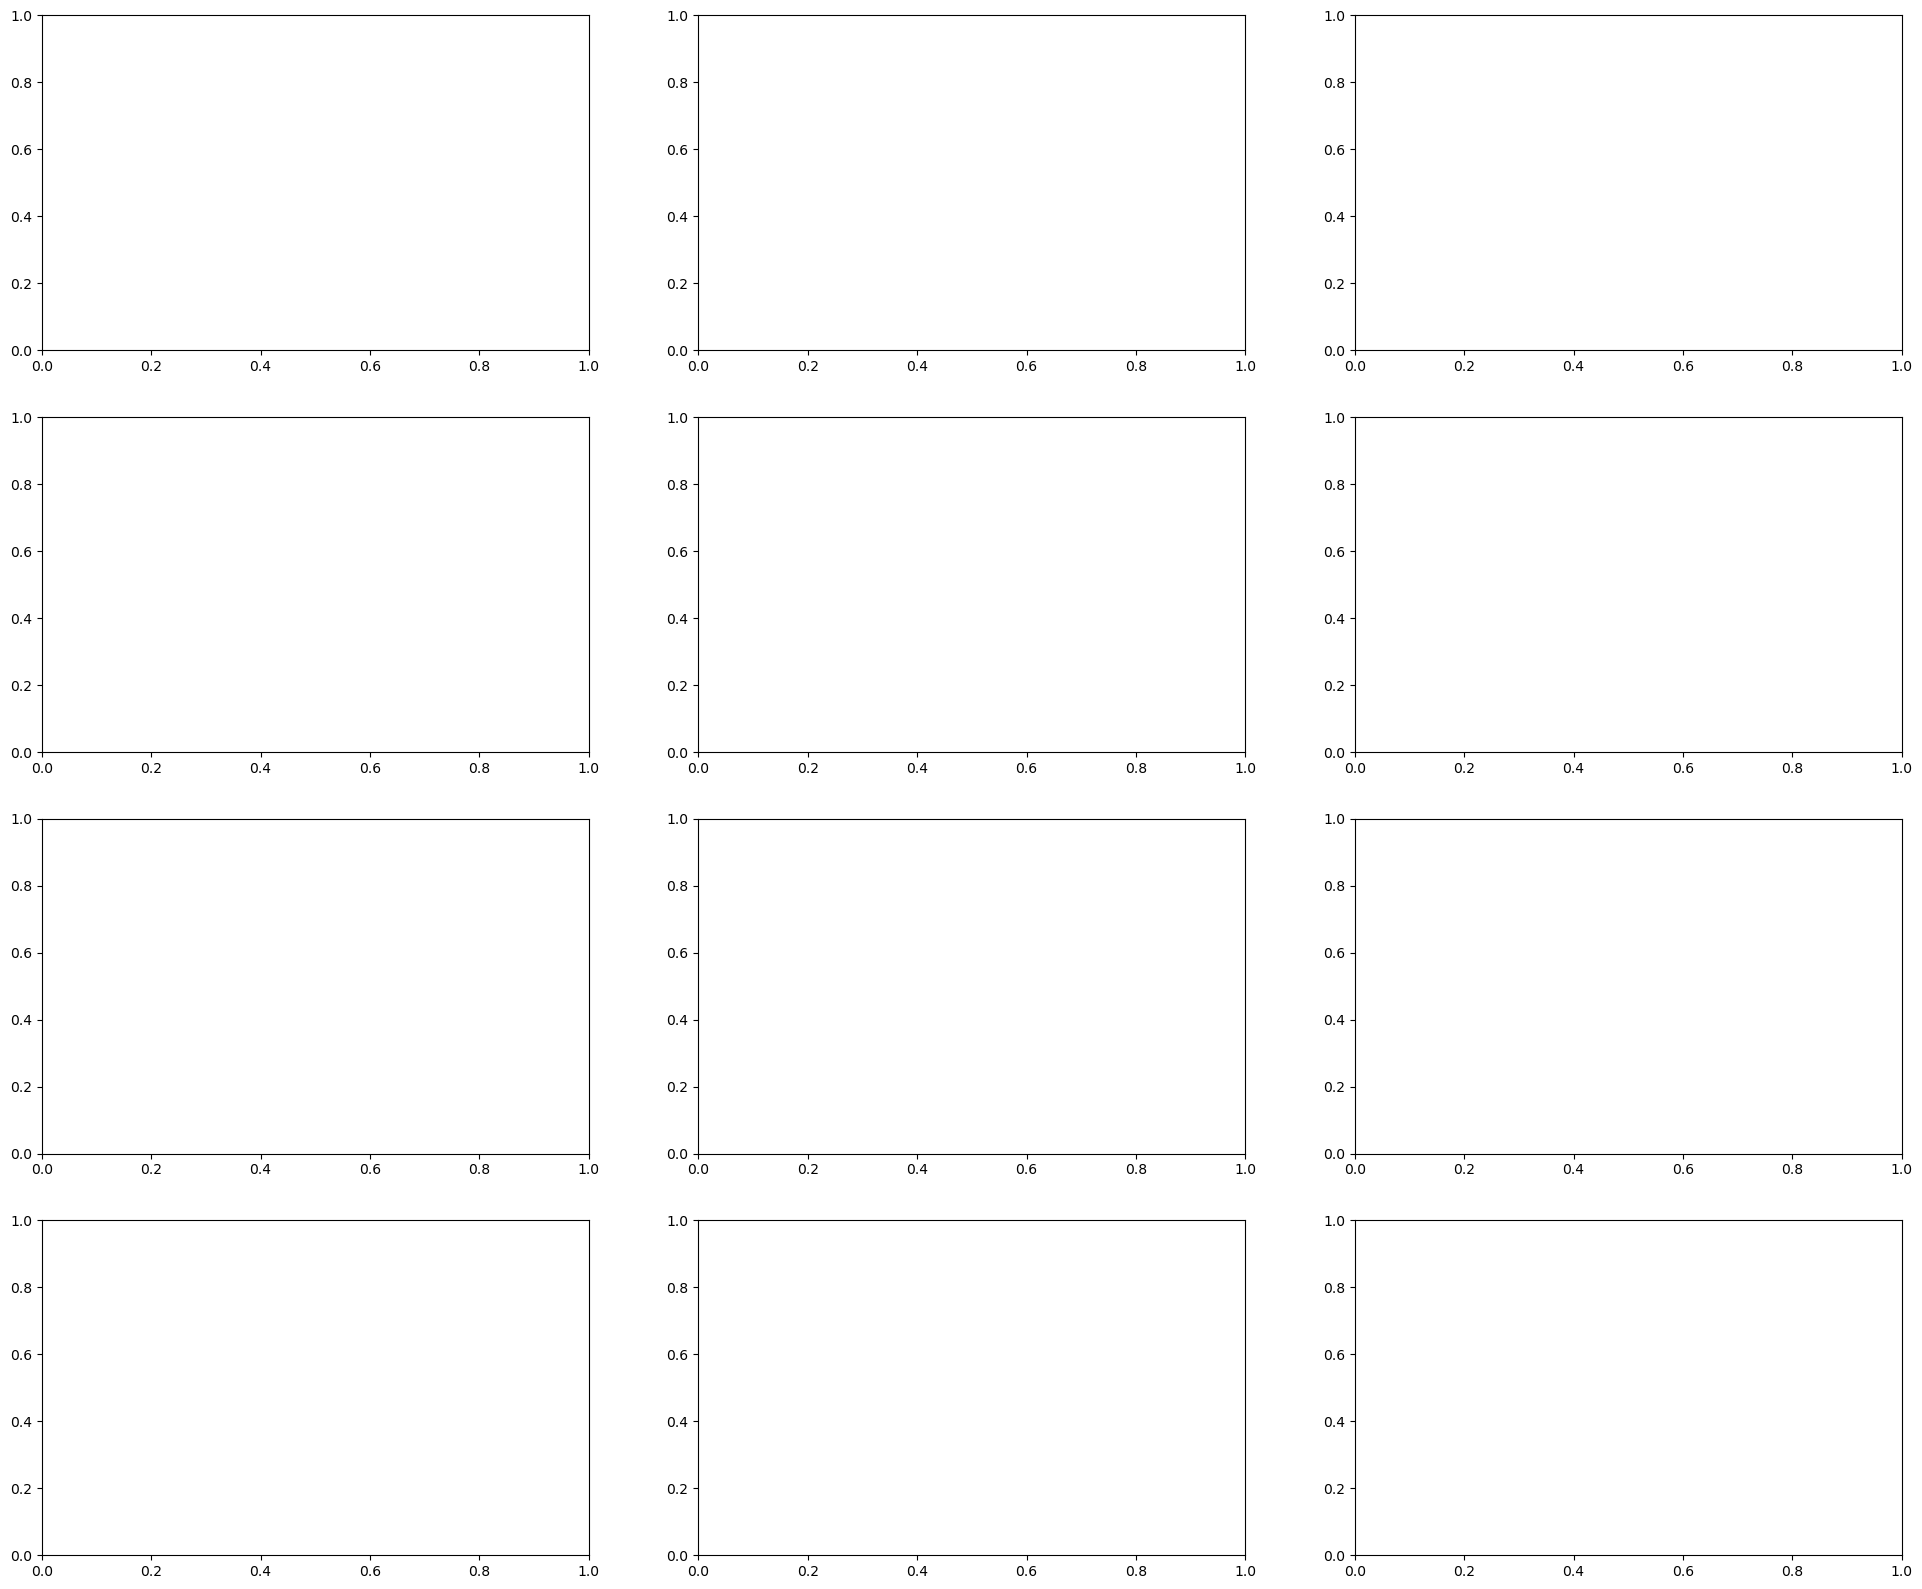

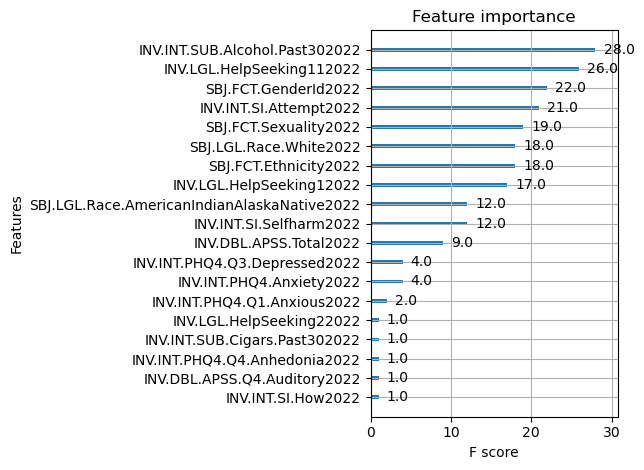

Model Name  2023 Accuracy  ROC AUC Score
4            XGBoost       0.967960       0.607068
2       RandomForest       0.967960       0.592365
10               LDA       0.962901       0.575785
5           LightGBM       0.967960       0.571422
8          NeuralNet       0.967960       0.571161
3   GradientBoosting       0.964587       0.564136
6           CatBoost       0.966273       0.559904
1           Logistic       0.966273       0.556937
11               QDA       0.959528       0.546728
7      SupportVector       0.966273       0.533028
9         NaiveBayes       0.264755       0.515052
0      MajorityClass       0.966273       0.500000

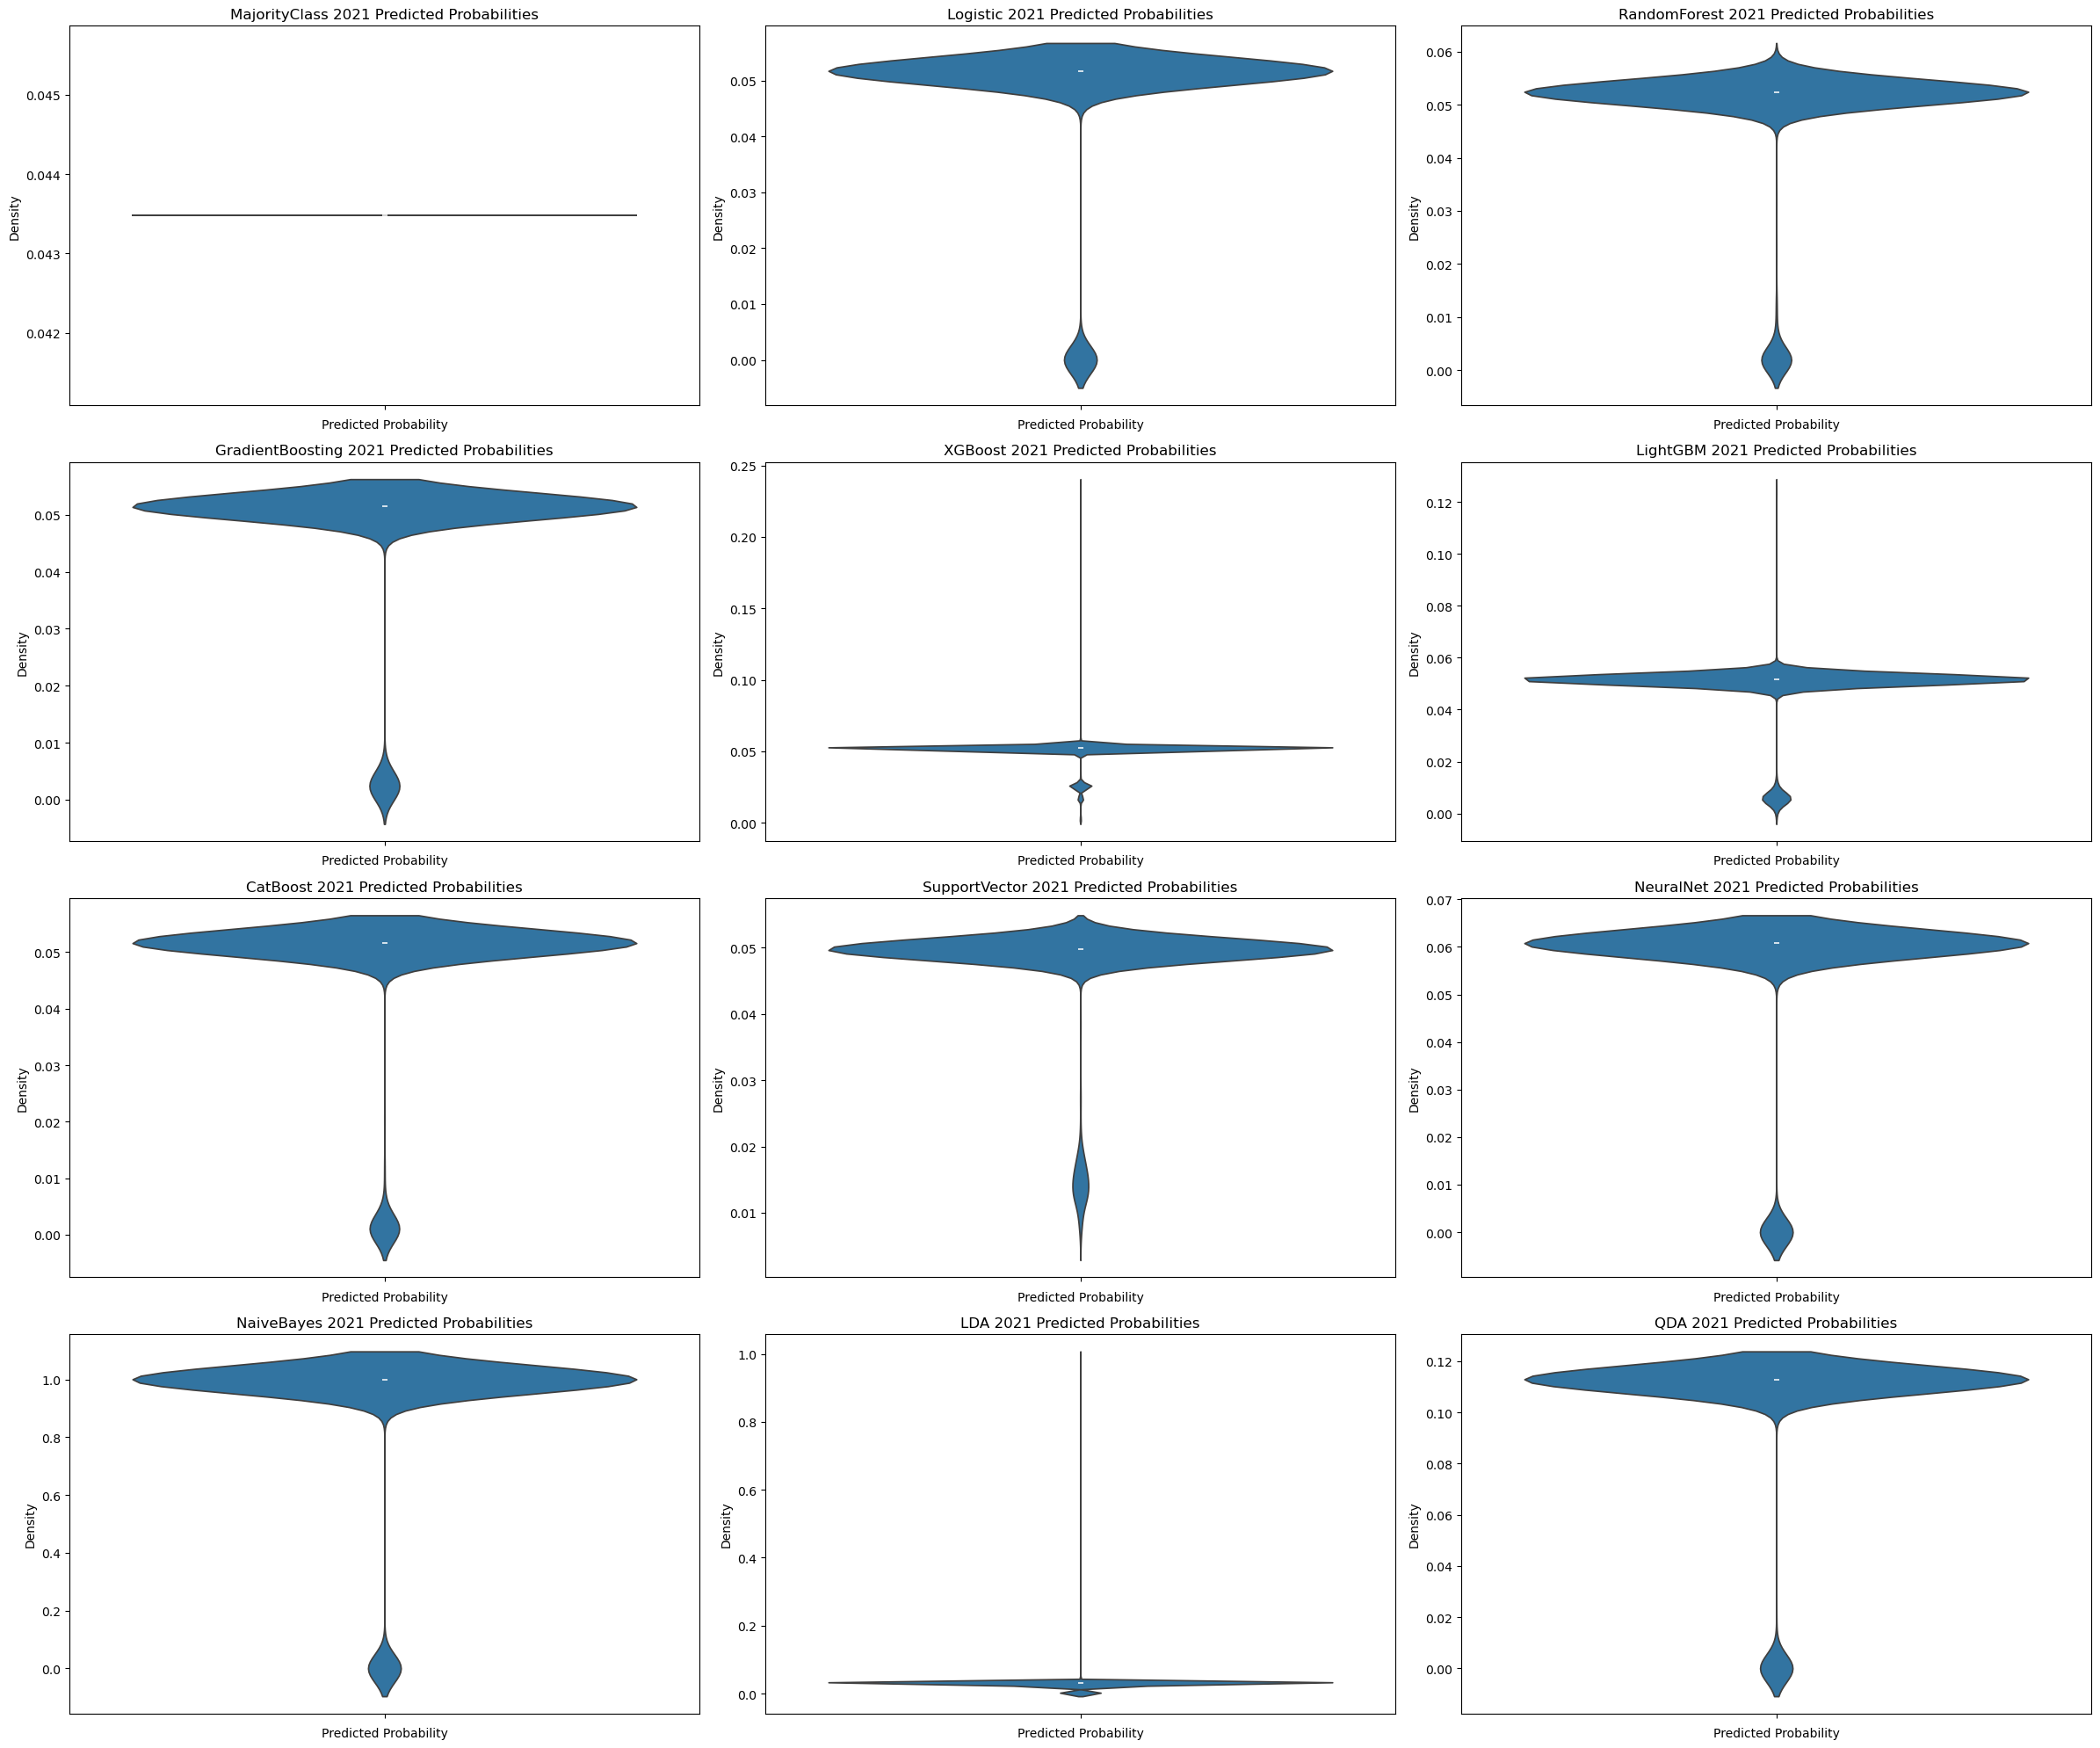

In [51]:
plot_metrics(models, "INV.INT.SI.Attempt2023", one_step_feature_cols)

#### **Key Takeaways**
- XGBoost performs the best in terms of ROC AUC score, 0.61
    - Still only considered "poor discrimination"
    - Random Forest is a close runner up with ROC AUC score of 0.59
- Basically all other models are no better than random guessing
    - Admittedly, they all do a least (very) slightly better than random guessing except for majority class
- Naive Bayes model does particularly poorly in terms of accuracy,
- Parametric vs. Non-Parametric models
    - Overall, seems like non-parametric models did the best
    - Majority class is a good baseline for ROC
    - Logistic, QDA, and Naive Bayes did pretty bad
    - Interestingly, LDA does pretty good (3rd overall) -- take a look at the decision boundary

__________

#### **How**


Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.8277027027027027
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       490
         1.0       0.00      0.00      0.00       102

    accuracy                           0.83       592
   macro avg       0.41      0.50      0.45       592
weighted avg       0.69      0.83      0.75       592

Predicted probabilities for 2021 Suicide Questions:
[0.14617659 0.14617659 0.14617659 ... 0.14617659 0.14617659 0.14617659]
Permutation Performance for MajorityClass
                                         Feature  Importance
0                         INV.INT.SI.Attempt2022         0.0
43                        SBJ.LGL.Race.White2022         0.0
31                INV.LGL.SUB.Smokeless.Life2022         0.0
32                    INV.LGL.SUB.Vapes.Life2022         0.0
33                

Feature  Coefficient  Abs_Coefficient
3                        INV.INT.SI.Thoughts2022     0.624288         0.624288
1                             INV.INT.SI.How2022     0.521210         0.521210
35                               SBJ.FCT.Sex2022    -0.424743         0.424743
32                    INV.LGL.SUB.Vapes.Life2022    -0.325358         0.325358
20                   INV.LGL.PHQ4.Depression2022    -0.319561         0.319561
44                      INV.LGL.HelpSeeking02022    -0.319460         0.319460
28                 INV.LGL.SUB.Cannabis.Life2022    -0.267717         0.267717
38                        SBJ.LGL.Race.Asian2022    -0.255966         0.255966
54                      INV.LGL.HelpSeeking62022     0.228929         0.228929
18                        INV.INT.PHQ4.Total2022     0.227508         0.227508
5                    INV.DBL.APSS.Q2.TVRadio2022    -0.212814         0.212814
27                  INV.LGL.SUB.Alcohol.Life2022    -0.211642         0.211642
26                  INV.INT.SUB.Vapes.Past302022     0.191748         0.191748
11                        INV.DBL.APSS.Total2022     0.183779         0.183779
23             INV.INT.SUB.Cigarettes.Past302022    -0.182022         0.182022
55                      INV.LGL.HelpSeeking72022     0.167126         0.167126
43                        SBJ.LGL.Race.White2022    -0.165836         0.165836
33                         SBJ.FCT.Ethnicity2022     0.164824         0.164824
9                     INV.DBL.APSS.Q6.Visual2022    -0.160639         0.160639
8                 INV.DBL.APSS.Q5.Controlled2022    -0.149980         0.149980
36                         SBJ.FCT.Sexuality2022     0.146344         0.146344
31                INV.LGL.SUB.Smokeless.Life2022    -0.143659         0.143659
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    -0.143635         0.143635
15                   INV.INT.PHQ4.Q2.Worried2022    -0.135936         0.135936
25              INV.INT.SUB.Smokeless.Past302022    -0.127664         0.127664
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    -0.127620         0.127620
57                      INV.LGL.HelpSeeking92022     0.127469         0.127469
10               INV.DBL.APSS.Q7.Grandiosity2022    -0.124279         0.124279
0                         INV.INT.SI.Attempt2022     0.123397         0.123397
40      SBJ.LGL.Race.HawaiianPacificIslander2022    -0.121275         0.121275
48                     INV.LGL.HelpSeeking122022    -0.121275         0.121275
2                        INV.INT.SI.Selfharm2022     0.121032         0.121032
7                   INV.DBL.APSS.Q4.Auditory2022    -0.119561         0.119561
53                      INV.LGL.HelpSeeking52022    -0.115969         0.115969
29               INV.LGL.SUB.Cigarettes.Life2022    -0.108552         0.108552
46                     INV.LGL.HelpSeeking102022    -0.106183         0.106183
17                 INV.INT.PHQ4.Q4.Anhedonia2022    -0.101819         0.101819
47                     INV.LGL.HelpSeeking112022     0.096821         0.096821
19                      INV.LGL.PHQ4.Anxiety2022    -0.094988         0.094988
34                          SBJ.FCT.GenderId2022     0.093981         0.093981
24                 INV.INT.SUB.Cigars.Past302022    -0.085639         0.085639
49                     INV.LGL.HelpSeeking132022     0.055904         0.055904
22               INV.INT.SUB.Cannabis.Past302022     0.051270         0.051270
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    -0.044620         0.044620
14                   INV.INT.PHQ4.Q1.Anxious2022    -0.044352         0.044352
13                   INV.INT.PHQ4.Depression2022     0.044135         0.044135
30                   INV.LGL.SUB.Cigars.Life2022    -0.035508         0.035508
56                      INV.LGL.HelpSeeking82022    -0.033284         0.033284
6                     INV.DBL.APSS.Q3.Spying2022    -0.022399         0.022399
21                INV.INT.SUB.Alcohol.Past302022     0.021835         0.021835
42          

Permutation Performance for Logistic
                                         Feature  Importance
18                        INV.INT.PHQ4.Total2022    0.025676
3                        INV.INT.SI.Thoughts2022    0.005912
1                             INV.INT.SI.How2022    0.005912
36                         SBJ.FCT.Sexuality2022    0.005068
26                  INV.INT.SUB.Vapes.Past302022    0.004730
35                               SBJ.FCT.Sex2022    0.004223
11                        INV.DBL.APSS.Total2022    0.003209
54                      INV.LGL.HelpSeeking62022    0.003041
28                 INV.LGL.SUB.Cannabis.Life2022    0.001858
15                   INV.INT.PHQ4.Q2.Worried2022    0.001858
43                        SBJ.LGL.Race.White2022    0.001689
33                         SBJ.FCT.Ethnicity2022    0.001689
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.001689
0                         INV.INT.SI.Attempt2022    0.001689
34                          SBJ.FCT.GenderId2022

Feature  Importance
1                             INV.INT.SI.How2022    0.060640
3                        INV.INT.SI.Thoughts2022    0.058665
36                         SBJ.FCT.Sexuality2022    0.049363
11                        INV.DBL.APSS.Total2022    0.041536
13                   INV.INT.PHQ4.Depression2022    0.037899
18                        INV.INT.PHQ4.Total2022    0.032031
34                          SBJ.FCT.GenderId2022    0.030417
12                      INV.INT.PHQ4.Anxiety2022    0.029979
6                     INV.DBL.APSS.Q3.Spying2022    0.028332
0                         INV.INT.SI.Attempt2022    0.027095
55                      INV.LGL.HelpSeeking72022    0.025984
16                 INV.INT.PHQ4.Q3.Depressed2022    0.024835
14                   INV.INT.PHQ4.Q1.Anxious2022    0.023662
15                   INV.INT.PHQ4.Q2.Worried2022    0.023076
47                     INV.LGL.HelpSeeking112022    0.021886
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.021060
7                   INV.DBL.APSS.Q4.Auditory2022    0.020646
4                INV.DBL.APSS.Q1.MindReading2022    0.020331
35                               SBJ.FCT.Sex2022    0.020016
33                         SBJ.FCT.Ethnicity2022    0.019435
21                INV.INT.SUB.Alcohol.Past302022    0.018996
57                      INV.LGL.HelpSeeking92022    0.018518
22               INV.INT.SUB.Cannabis.Past302022    0.018205
2                        INV.INT.SI.Selfharm2022    0.017703
54                      INV.LGL.HelpSeeking62022    0.016803
28                 INV.LGL.SUB.Cannabis.Life2022    0.015365
52                      INV.LGL.HelpSeeking42022    0.015296
51                      INV.LGL.HelpSeeking32022    0.014815
45                      INV.LGL.HelpSeeking12022    0.014772
49                     INV.LGL.HelpSeeking132022    0.014519
43                        SBJ.LGL.Race.White2022    0.013973
29               INV.LGL.SUB.Cigarettes.Life2022    0.012904
53                      INV.LGL.HelpSeeking52022    0.012793
42                     SBJ.LGL.Race.Multiple2022    0.012184
9                     INV.DBL.APSS.Q6.Visual2022    0.012146
23             INV.INT.SUB.Cigarettes.Past302022    0.011895
46                     INV.LGL.HelpSeeking102022    0.011597
50                      INV.LGL.HelpSeeking22022    0.011202
27                  INV.LGL.SUB.Alcohol.Life2022    0.010950
20                   INV.LGL.PHQ4.Depression2022    0.010434
32                    INV.LGL.SUB.Vapes.Life2022    0.010164
56                      INV.LGL.HelpSeeking82022    0.008746
44                      INV.LGL.HelpSeeking02022    0.008333
19                      INV.LGL.PHQ4.Anxiety2022    0.008060
8                 INV.DBL.APSS.Q5.Controlled2022    0.007812
10               INV.DBL.APSS.Q7.Grandiosity2022    0.007503
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    0.007438
26                  INV.INT.SUB.Vapes.Past302022    0.007418
38                        SBJ.LGL.Race.Asian2022    0.006346
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    0.005137
48                     INV.LGL.HelpSeeking122022    0.004642
30                   INV.LGL.SUB.Cigars.Life2022    0.004443
5                    INV.DBL.APSS.Q2.TVRadio2022    0.004195
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    0.002583
24                 INV.INT.SUB.Cigars.Past302022    0.002356
25              INV.INT.SUB.Smokeless.Past302022    0.001454
40      SBJ.LGL.Race.HawaiianPacificIslander2022    0.001078
31                INV.LGL.SUB.Smokeless.Life2022    0.000335

Permutation Performance for RandomForest
                                         Feature  Importance
57                      INV.LGL.HelpSeeking92022    0.001689
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.001689
47                     INV.LGL.HelpSeeking112022    0.001689
26                  INV.INT.SUB.Vapes.Past302022    0.001689
18                        INV.INT.PHQ4.Total2022    0.001689
55                      INV.LGL.HelpSeeking72022    0.001520
19                      INV.LGL.PHQ4.Anxiety2022    0.001520
0                         INV.INT.SI.Attempt2022    0.001520
44                      INV.LGL.HelpSeeking02022    0.000169
27                  INV.LGL.SUB.Alcohol.Life2022    0.000000
31                INV.LGL.SUB.Smokeless.Life2022    0.000000
32                    INV.LGL.SUB.Vapes.Life2022    0.000000
9                     INV.DBL.APSS.Q6.Visual2022    0.000000
34                          SBJ.FCT.GenderId2022    0.000000
40      SBJ.LGL.Race.HawaiianPacificIslander

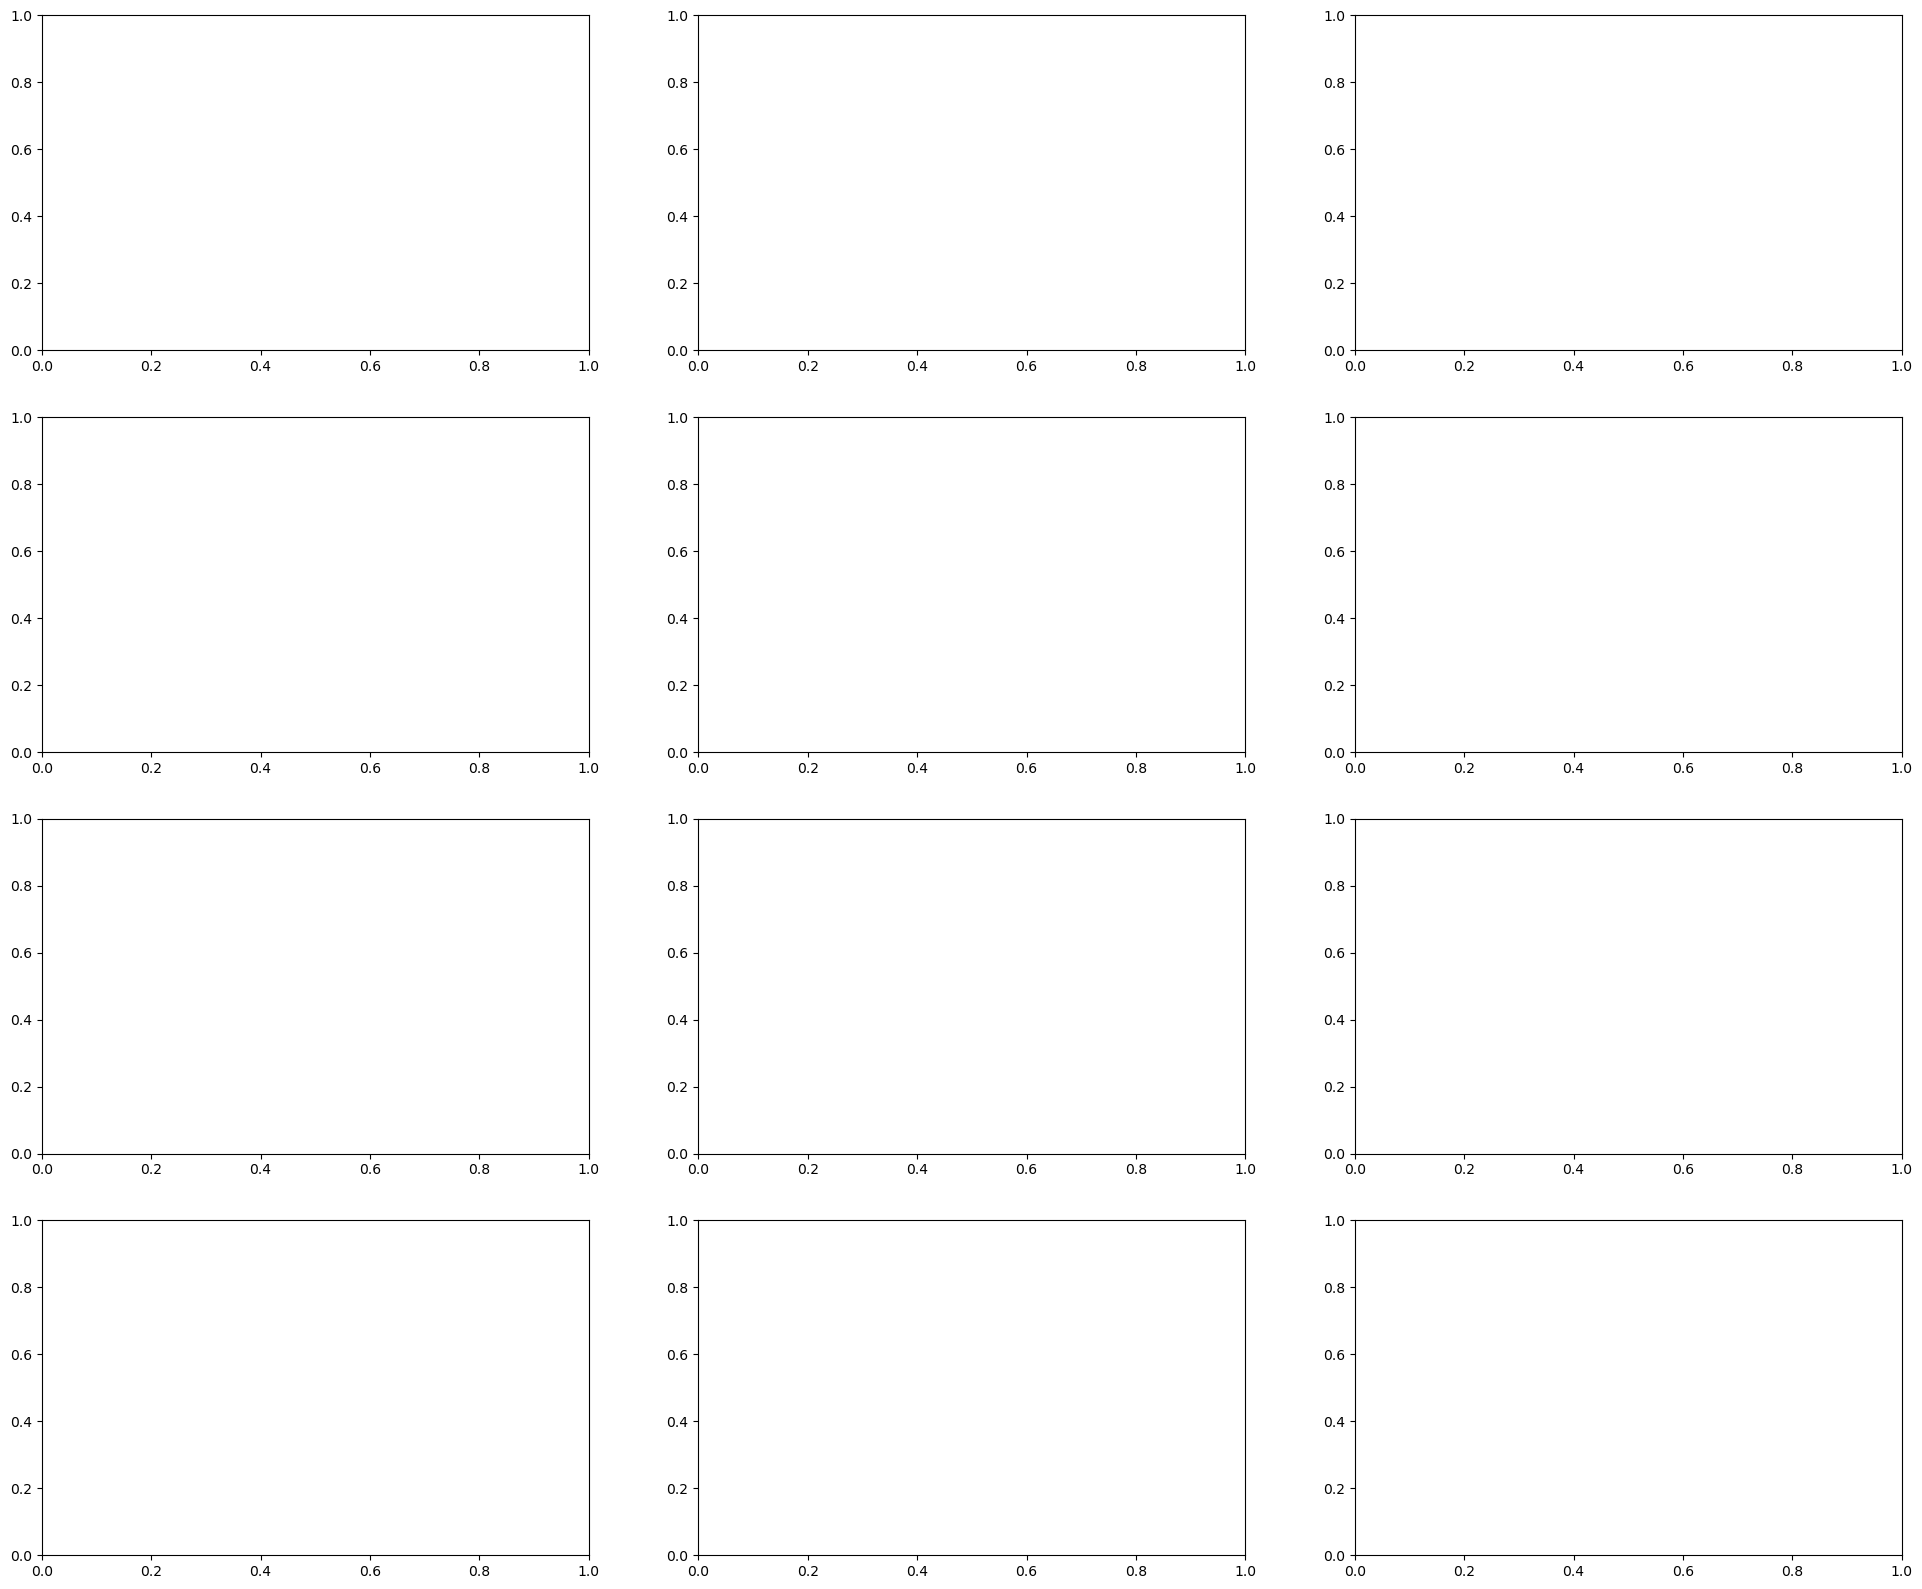

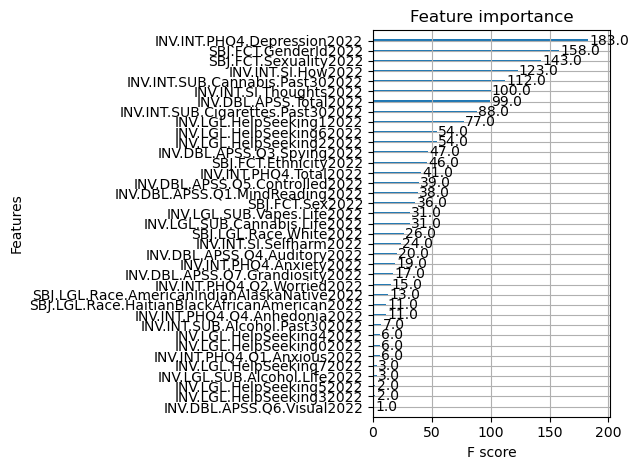

Model Name  2023 Accuracy  ROC AUC Score
4            XGBoost       0.824324       0.611084
2       RandomForest       0.829392       0.609674
10               LDA       0.832770       0.602931
7      SupportVector       0.827703       0.601751
5           LightGBM       0.827703       0.597279
11               QDA       0.834459       0.586945
1           Logistic       0.834459       0.586224
3   GradientBoosting       0.829392       0.582033
6           CatBoost       0.832770       0.576581
8          NeuralNet       0.827703       0.564036
0      MajorityClass       0.827703       0.500000
9         NaiveBayes       0.327703       0.497949

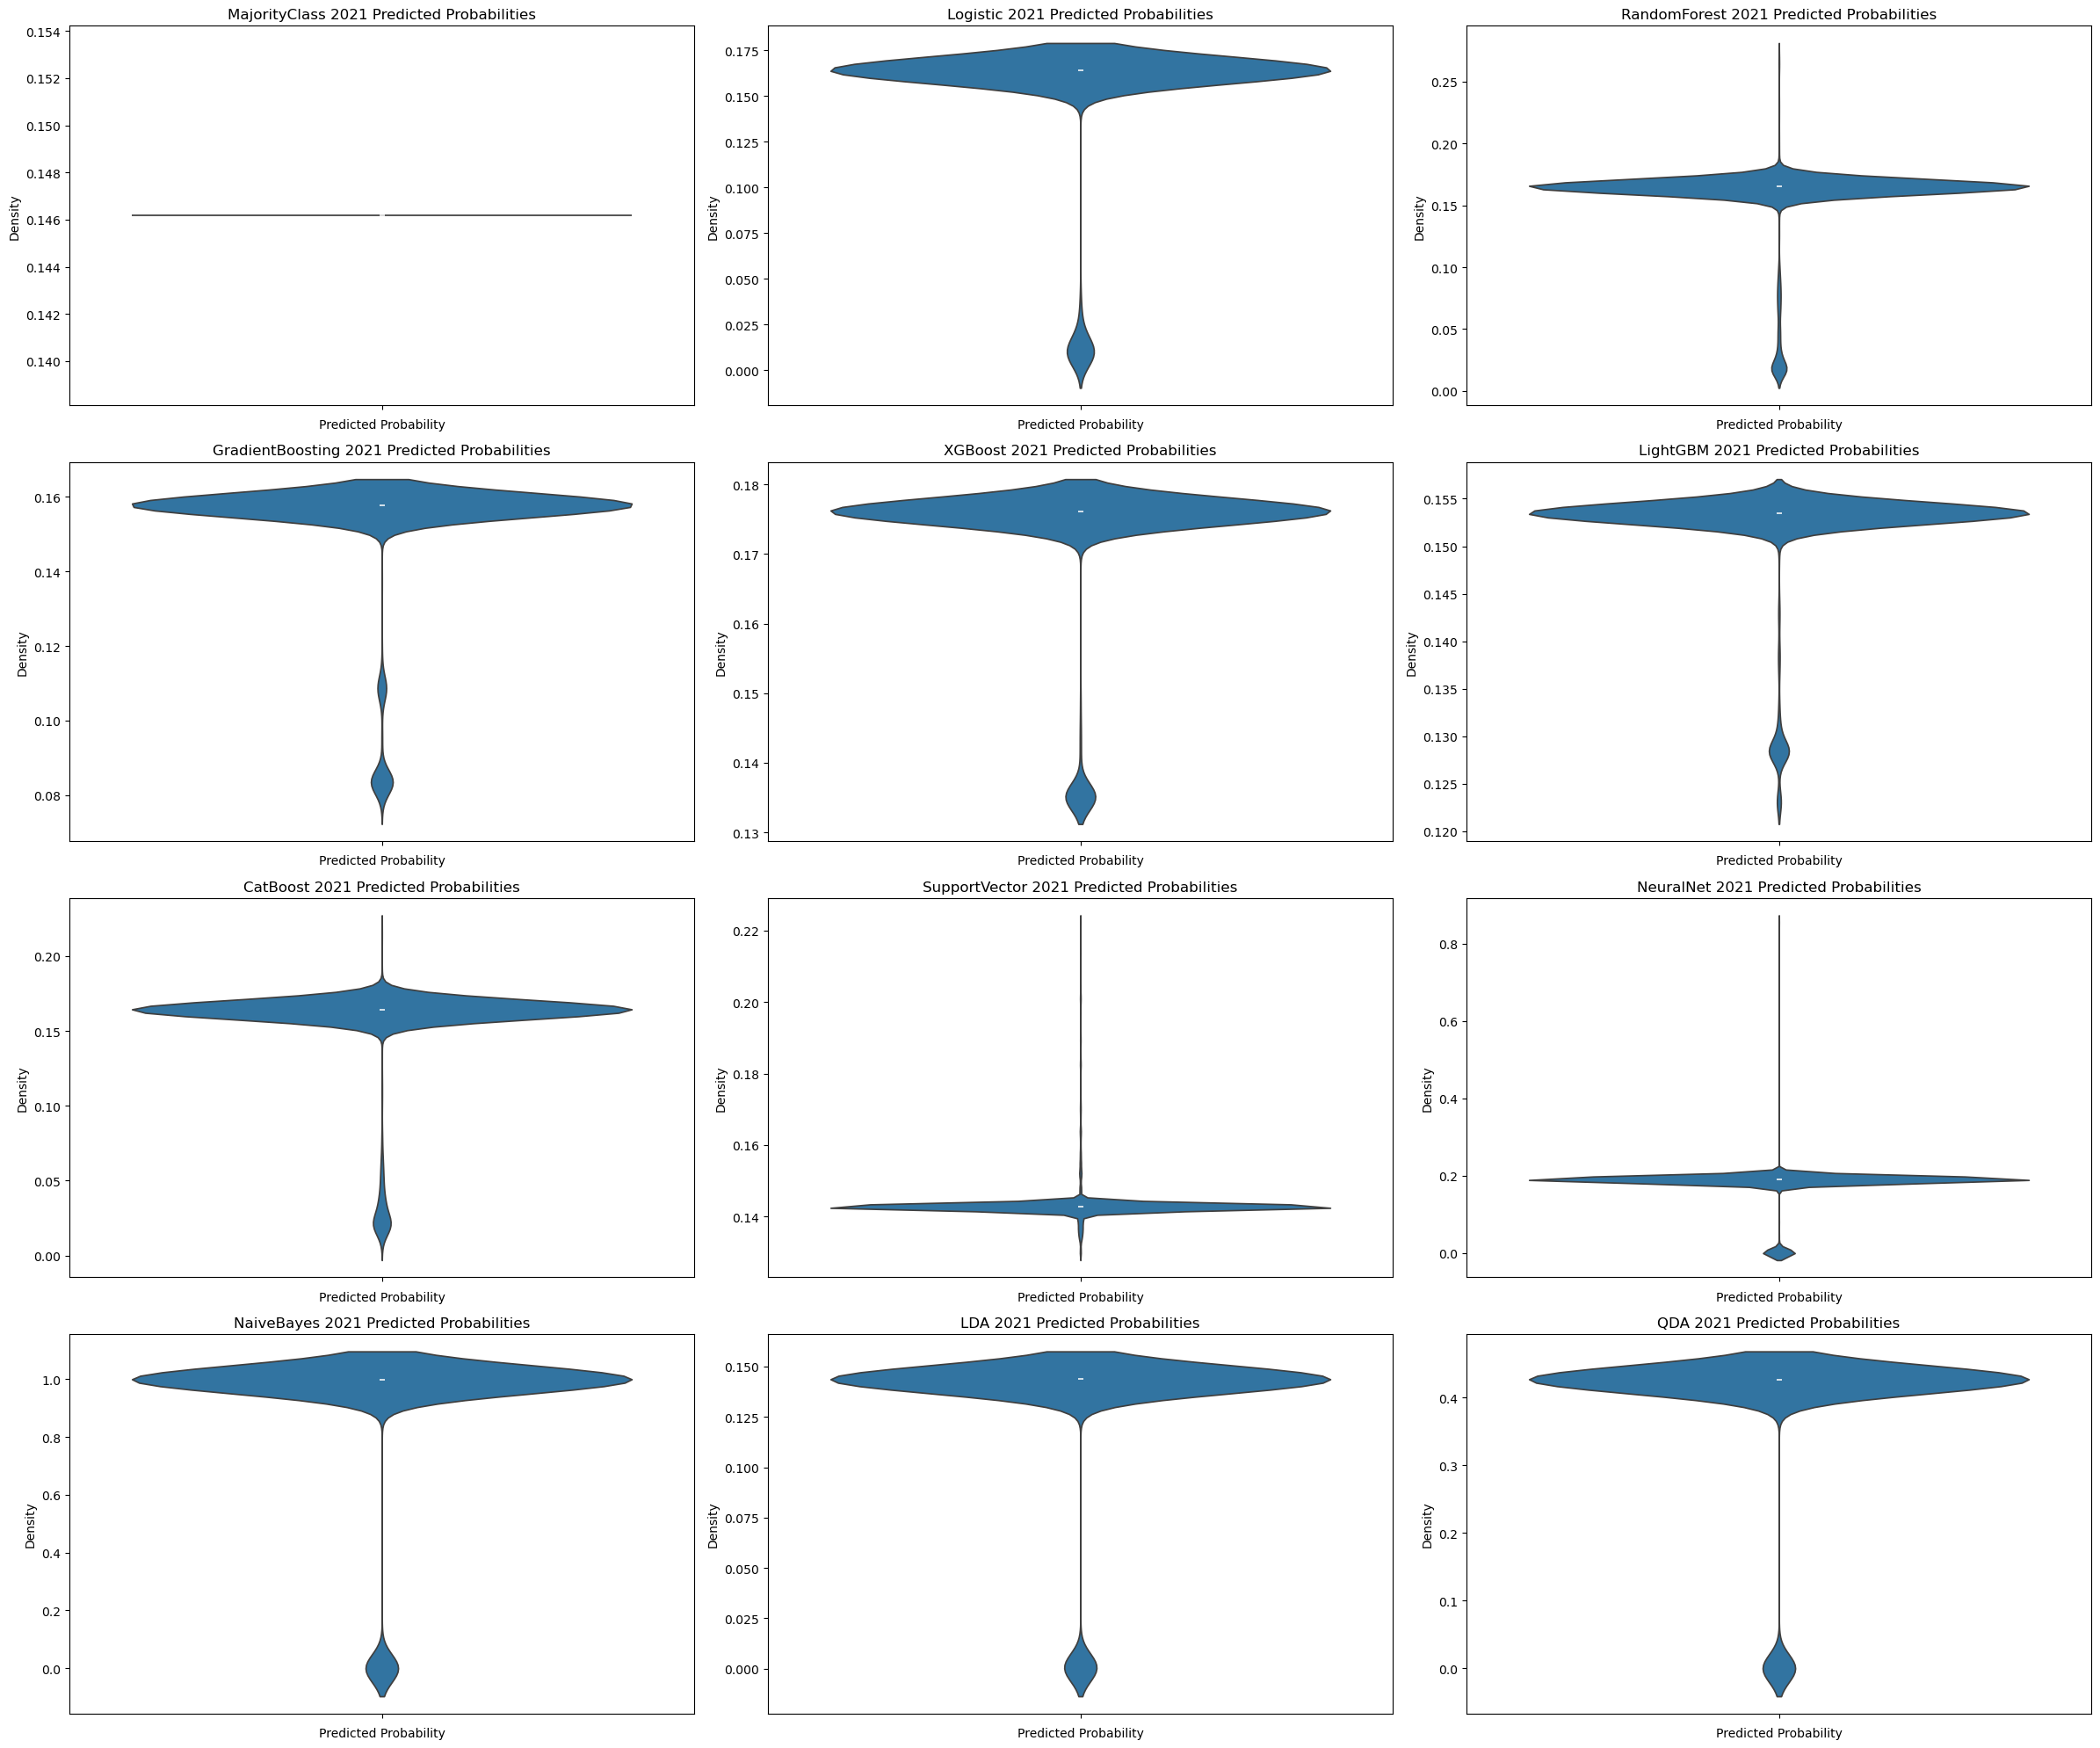

In [52]:
plot_metrics(models, "INV.INT.SI.How2023", one_step_feature_cols)

Notes:
- Again, XGBoost and Random Forest do the best
- LDA follows closely in 3rd
- Interested to see the linear boundary

________

#### **Self Harm**


Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.8934010152284264
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       528
         1.0       0.00      0.00      0.00        63

    accuracy                           0.89       591
   macro avg       0.45      0.50      0.47       591
weighted avg       0.80      0.89      0.84       591

Predicted probabilities for 2021 Suicide Questions:
[0.10584251 0.10584251 0.10584251 ... 0.10584251 0.10584251 0.10584251]
Permutation Performance for MajorityClass
                                         Feature  Importance
0                         INV.INT.SI.Attempt2022         0.0
43                        SBJ.LGL.Race.White2022         0.0
31                INV.LGL.SUB.Smokeless.Life2022         0.0
32                    INV.LGL.SUB.Vapes.Life2022         0.0
33                

Feature  Coefficient  Abs_Coefficient
2                        INV.INT.SI.Selfharm2022     0.723499         0.723499
44                      INV.LGL.HelpSeeking02022    -0.339774         0.339774
35                               SBJ.FCT.Sex2022    -0.318915         0.318915
38                        SBJ.LGL.Race.Asian2022    -0.307851         0.307851
1                             INV.INT.SI.How2022     0.306165         0.306165
45                      INV.LGL.HelpSeeking12022    -0.304645         0.304645
23             INV.INT.SUB.Cigarettes.Past302022    -0.290625         0.290625
22               INV.INT.SUB.Cannabis.Past302022    -0.277990         0.277990
3                        INV.INT.SI.Thoughts2022     0.242700         0.242700
18                        INV.INT.PHQ4.Total2022     0.233270         0.233270
4                INV.DBL.APSS.Q1.MindReading2022    -0.226360         0.226360
54                      INV.LGL.HelpSeeking62022     0.217974         0.217974
17                 INV.INT.PHQ4.Q4.Anhedonia2022    -0.217934         0.217934
43                        SBJ.LGL.Race.White2022    -0.206023         0.206023
51                      INV.LGL.HelpSeeking32022     0.203678         0.203678
52                      INV.LGL.HelpSeeking42022     0.190815         0.190815
30                   INV.LGL.SUB.Cigars.Life2022    -0.184354         0.184354
20                   INV.LGL.PHQ4.Depression2022    -0.176874         0.176874
32                    INV.LGL.SUB.Vapes.Life2022    -0.170040         0.170040
33                         SBJ.FCT.Ethnicity2022     0.166213         0.166213
24                 INV.INT.SUB.Cigars.Past302022    -0.163950         0.163950
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    -0.161520         0.161520
34                          SBJ.FCT.GenderId2022     0.159988         0.159988
10               INV.DBL.APSS.Q7.Grandiosity2022    -0.153780         0.153780
16                 INV.INT.PHQ4.Q3.Depressed2022     0.151912         0.151912
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    -0.146150         0.146150
48                     INV.LGL.HelpSeeking122022    -0.132198         0.132198
40      SBJ.LGL.Race.HawaiianPacificIslander2022    -0.132198         0.132198
5                    INV.DBL.APSS.Q2.TVRadio2022    -0.126799         0.126799
11                        INV.DBL.APSS.Total2022     0.125142         0.125142
57                      INV.LGL.HelpSeeking92022     0.104662         0.104662
8                 INV.DBL.APSS.Q5.Controlled2022    -0.103079         0.103079
56                      INV.LGL.HelpSeeking82022    -0.101274         0.101274
55                      INV.LGL.HelpSeeking72022     0.099921         0.099921
46                     INV.LGL.HelpSeeking102022    -0.099686         0.099686
31                INV.LGL.SUB.Smokeless.Life2022    -0.099081         0.099081
29               INV.LGL.SUB.Cigarettes.Life2022    -0.094385         0.094385
15                   INV.INT.PHQ4.Q2.Worried2022    -0.087216         0.087216
27                  INV.LGL.SUB.Alcohol.Life2022     0.087133         0.087133
49                     INV.LGL.HelpSeeking132022    -0.086930         0.086930
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    -0.081758         0.081758
0                         INV.INT.SI.Attempt2022     0.078708         0.078708
13                   INV.INT.PHQ4.Depression2022     0.077071         0.077071
14                   INV.INT.PHQ4.Q1.Anxious2022    -0.073873         0.073873
19                      INV.LGL.PHQ4.Anxiety2022    -0.071617         0.071617
36                         SBJ.FCT.Sexuality2022     0.065607         0.065607
53                      INV.LGL.HelpSeeking52022     0.065465         0.065465
26                  INV.INT.SUB.Vapes.Past302022     0.056933         0.056933
9                     INV.DBL.APSS.Q6.Visual2022    -0.056779         0.056779
21                INV.INT.SUB.Alcohol.Past302022     0.054952         0.054952
7           

Permutation Performance for Logistic
                                         Feature  Importance
18                        INV.INT.PHQ4.Total2022    0.014552
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.000169
0                         INV.INT.SI.Attempt2022    0.000000
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    0.000000
25              INV.INT.SUB.Smokeless.Past302022    0.000000
26                  INV.INT.SUB.Vapes.Past302022    0.000000
27                  INV.LGL.SUB.Alcohol.Life2022    0.000000
28                 INV.LGL.SUB.Cannabis.Life2022    0.000000
30                   INV.LGL.SUB.Cigars.Life2022    0.000000
31                INV.LGL.SUB.Smokeless.Life2022    0.000000
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    0.000000
40      SBJ.LGL.Race.HawaiianPacificIslander2022    0.000000
23             INV.INT.SUB.Cigarettes.Past302022    0.000000
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    0.000000
42                     SBJ.LGL.Race.Multiple2022

Feature  Importance
2                        INV.INT.SI.Selfharm2022    0.090024
34                          SBJ.FCT.GenderId2022    0.052773
18                        INV.INT.PHQ4.Total2022    0.048981
13                   INV.INT.PHQ4.Depression2022    0.046438
11                        INV.DBL.APSS.Total2022    0.044494
36                         SBJ.FCT.Sexuality2022    0.038256
1                             INV.INT.SI.How2022    0.036268
16                 INV.INT.PHQ4.Q3.Depressed2022    0.031631
15                   INV.INT.PHQ4.Q2.Worried2022    0.028654
3                        INV.INT.SI.Thoughts2022    0.027643
14                   INV.INT.PHQ4.Q1.Anxious2022    0.025157
0                         INV.INT.SI.Attempt2022    0.023967
12                      INV.INT.PHQ4.Anxiety2022    0.023088
54                      INV.LGL.HelpSeeking62022    0.021907
6                     INV.DBL.APSS.Q3.Spying2022    0.021612
21                INV.INT.SUB.Alcohol.Past302022    0.021043
57                      INV.LGL.HelpSeeking92022    0.020190
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.019942
45                      INV.LGL.HelpSeeking12022    0.019341
35                               SBJ.FCT.Sex2022    0.018891
7                   INV.DBL.APSS.Q4.Auditory2022    0.018491
4                INV.DBL.APSS.Q1.MindReading2022    0.017526
53                      INV.LGL.HelpSeeking52022    0.015964
51                      INV.LGL.HelpSeeking32022    0.015921
55                      INV.LGL.HelpSeeking72022    0.015777
27                  INV.LGL.SUB.Alcohol.Life2022    0.014876
22               INV.INT.SUB.Cannabis.Past302022    0.013644
28                 INV.LGL.SUB.Cannabis.Life2022    0.013614
50                      INV.LGL.HelpSeeking22022    0.013511
52                      INV.LGL.HelpSeeking42022    0.013435
33                         SBJ.FCT.Ethnicity2022    0.013108
9                     INV.DBL.APSS.Q6.Visual2022    0.011650
20                   INV.LGL.PHQ4.Depression2022    0.011583
43                        SBJ.LGL.Race.White2022    0.011526
42                     SBJ.LGL.Race.Multiple2022    0.009761
29               INV.LGL.SUB.Cigarettes.Life2022    0.009650
8                 INV.DBL.APSS.Q5.Controlled2022    0.009599
23             INV.INT.SUB.Cigarettes.Past302022    0.008624
47                     INV.LGL.HelpSeeking112022    0.008423
38                        SBJ.LGL.Race.Asian2022    0.007976
32                    INV.LGL.SUB.Vapes.Life2022    0.007860
19                      INV.LGL.PHQ4.Anxiety2022    0.007803
10               INV.DBL.APSS.Q7.Grandiosity2022    0.007585
49                     INV.LGL.HelpSeeking132022    0.007560
26                  INV.INT.SUB.Vapes.Past302022    0.007554
46                     INV.LGL.HelpSeeking102022    0.006278
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    0.006216
25              INV.INT.SUB.Smokeless.Past302022    0.005204
44                      INV.LGL.HelpSeeking02022    0.005137
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    0.004811
5                    INV.DBL.APSS.Q2.TVRadio2022    0.004791
56                      INV.LGL.HelpSeeking82022    0.004574
30                   INV.LGL.SUB.Cigars.Life2022    0.002322
40      SBJ.LGL.Race.HawaiianPacificIslander2022    0.002041
24                 INV.INT.SUB.Cigars.Past302022    0.002021
48                     INV.LGL.HelpSeeking122022    0.001688
31                INV.LGL.SUB.Smokeless.Life2022    0.001067
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    0.000525

Permutation Performance for RandomForest
                                         Feature  Importance
53                      INV.LGL.HelpSeeking52022    0.003215
2                        INV.INT.SI.Selfharm2022    0.002030
18                        INV.INT.PHQ4.Total2022    0.001692
19                      INV.LGL.PHQ4.Anxiety2022    0.001692
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.001692
9                     INV.DBL.APSS.Q6.Visual2022    0.001692
47                     INV.LGL.HelpSeeking112022    0.001692
12                      INV.INT.PHQ4.Anxiety2022    0.001692
13                   INV.INT.PHQ4.Depression2022    0.001692
43                        SBJ.LGL.Race.White2022    0.001523
35                               SBJ.FCT.Sex2022    0.001523
52                      INV.LGL.HelpSeeking42022    0.001523
51                      INV.LGL.HelpSeeking32022    0.001523
14                   INV.INT.PHQ4.Q1.Anxious2022    0.001523
16                 INV.INT.PHQ4.Q3.Depressed

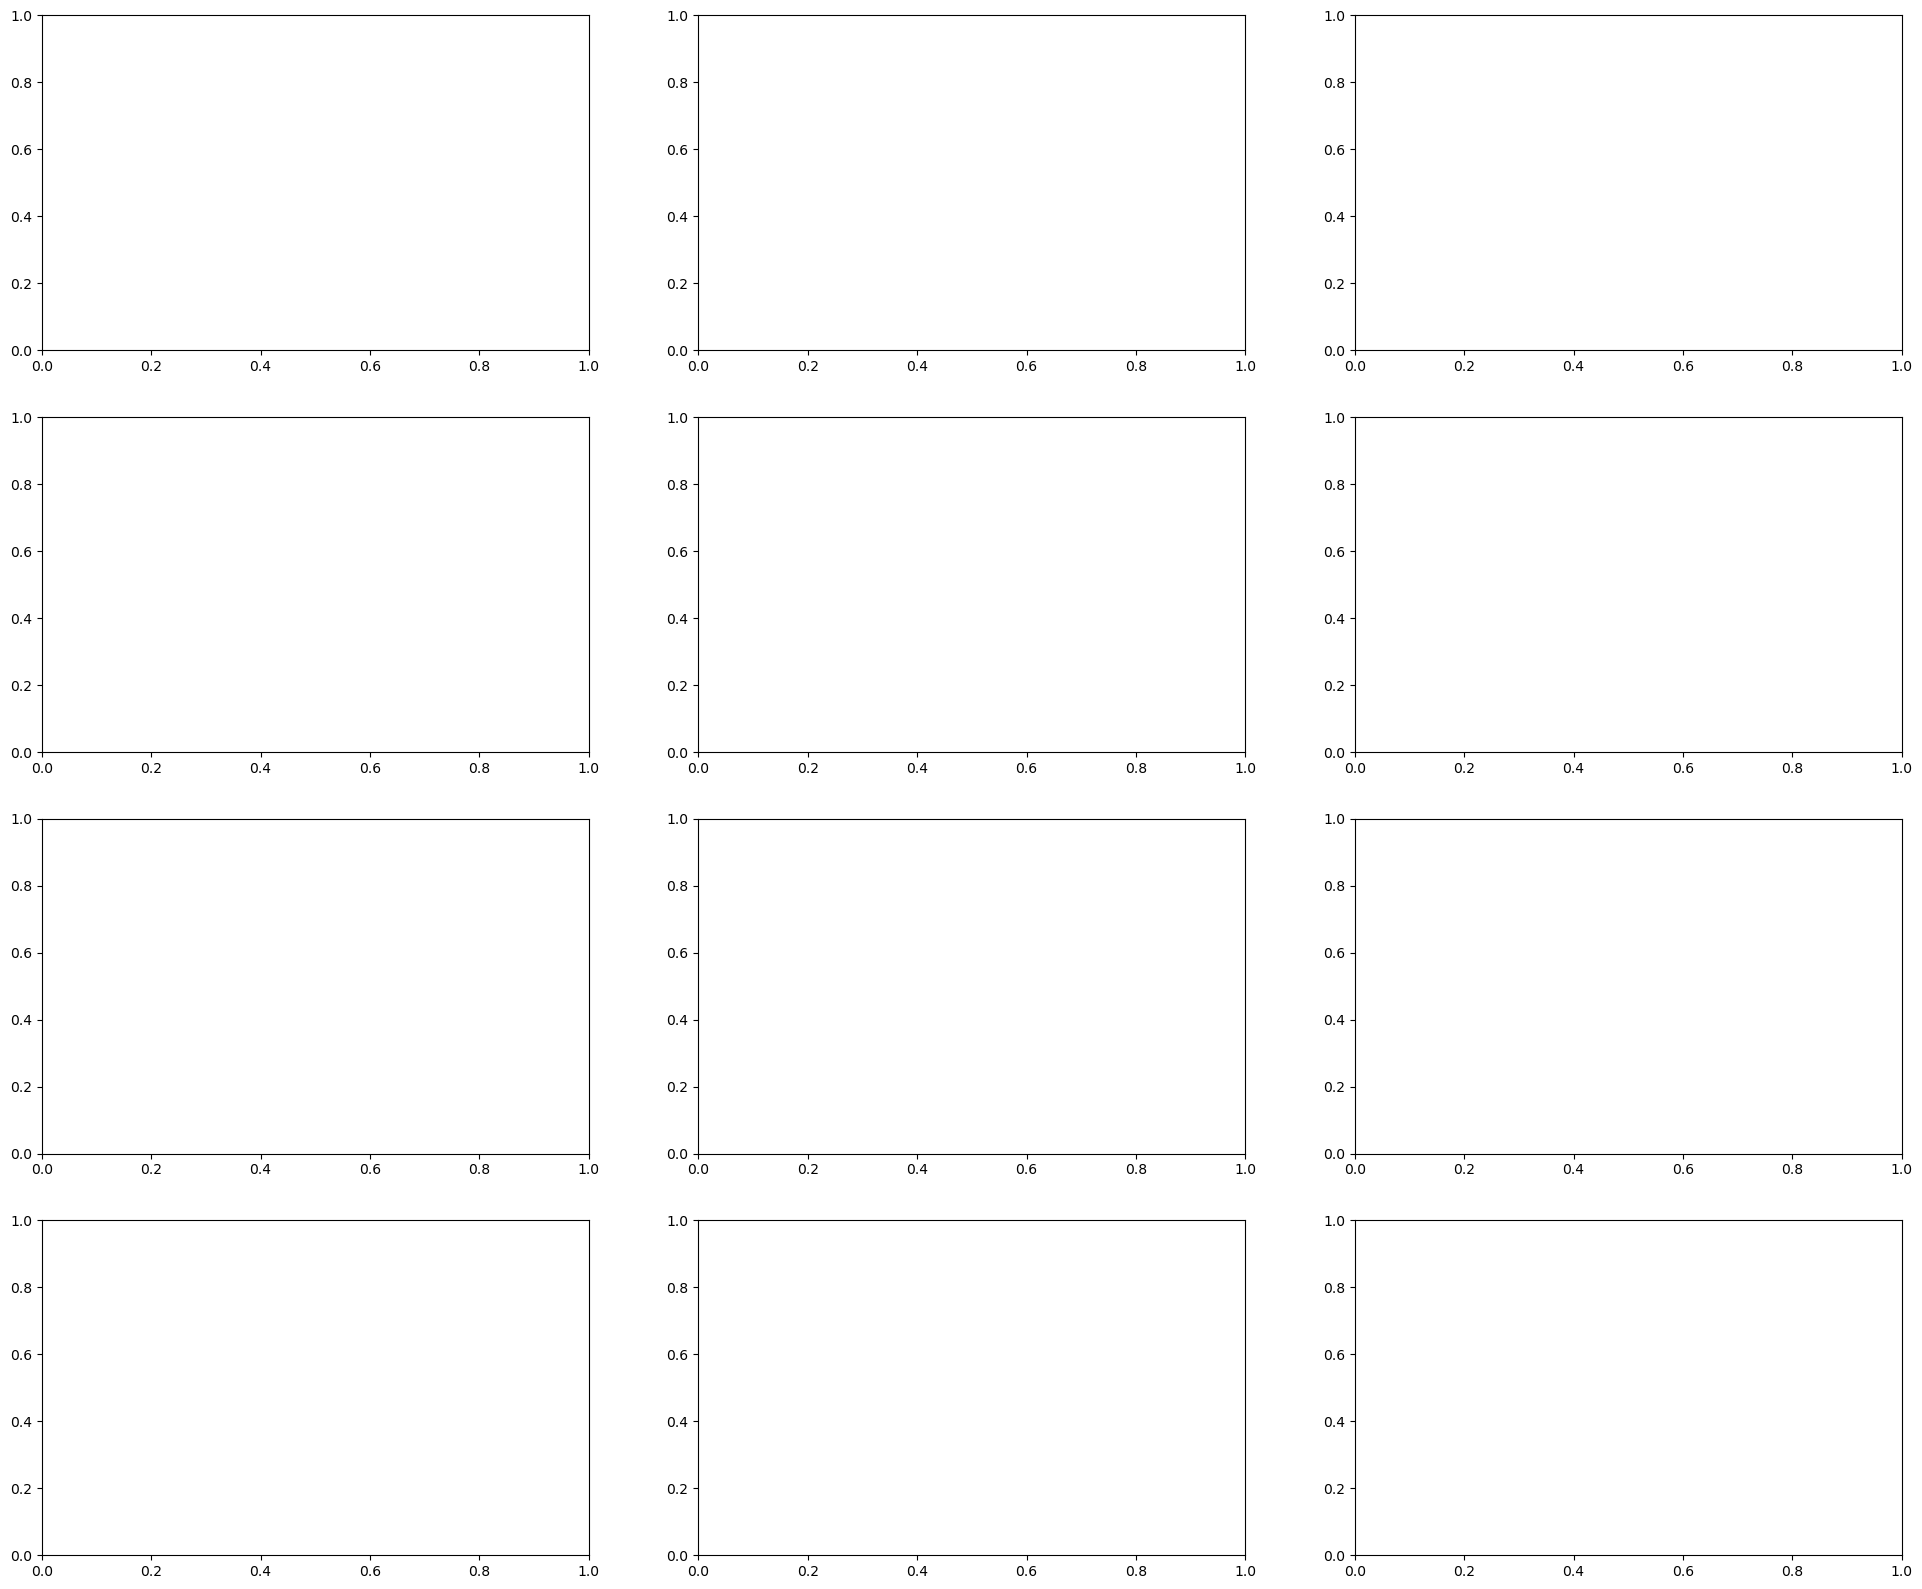

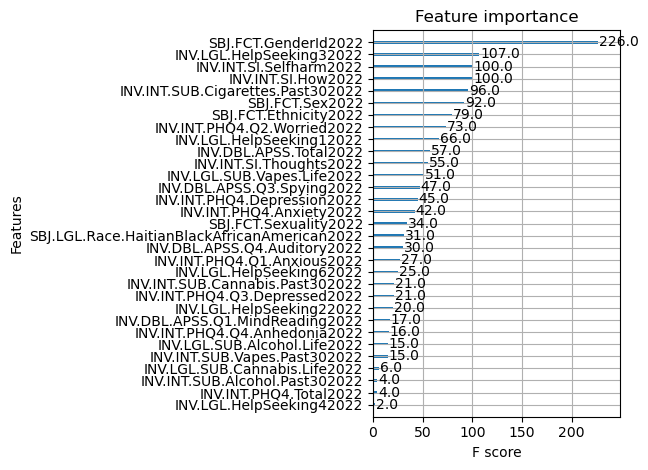

Model Name  2023 Accuracy  ROC AUC Score
7      SupportVector       0.895093       0.589752
8          NeuralNet       0.886633       0.587196
6           CatBoost       0.895093       0.574360
1           Logistic       0.890017       0.571323
2       RandomForest       0.896785       0.568347
10               LDA       0.883249       0.567626
4            XGBoost       0.893401       0.563898
3   GradientBoosting       0.891709       0.556503
5           LightGBM       0.891709       0.550520
9         NaiveBayes       0.839255       0.534497
11               QDA       0.869712       0.528123
0      MajorityClass       0.893401       0.500000

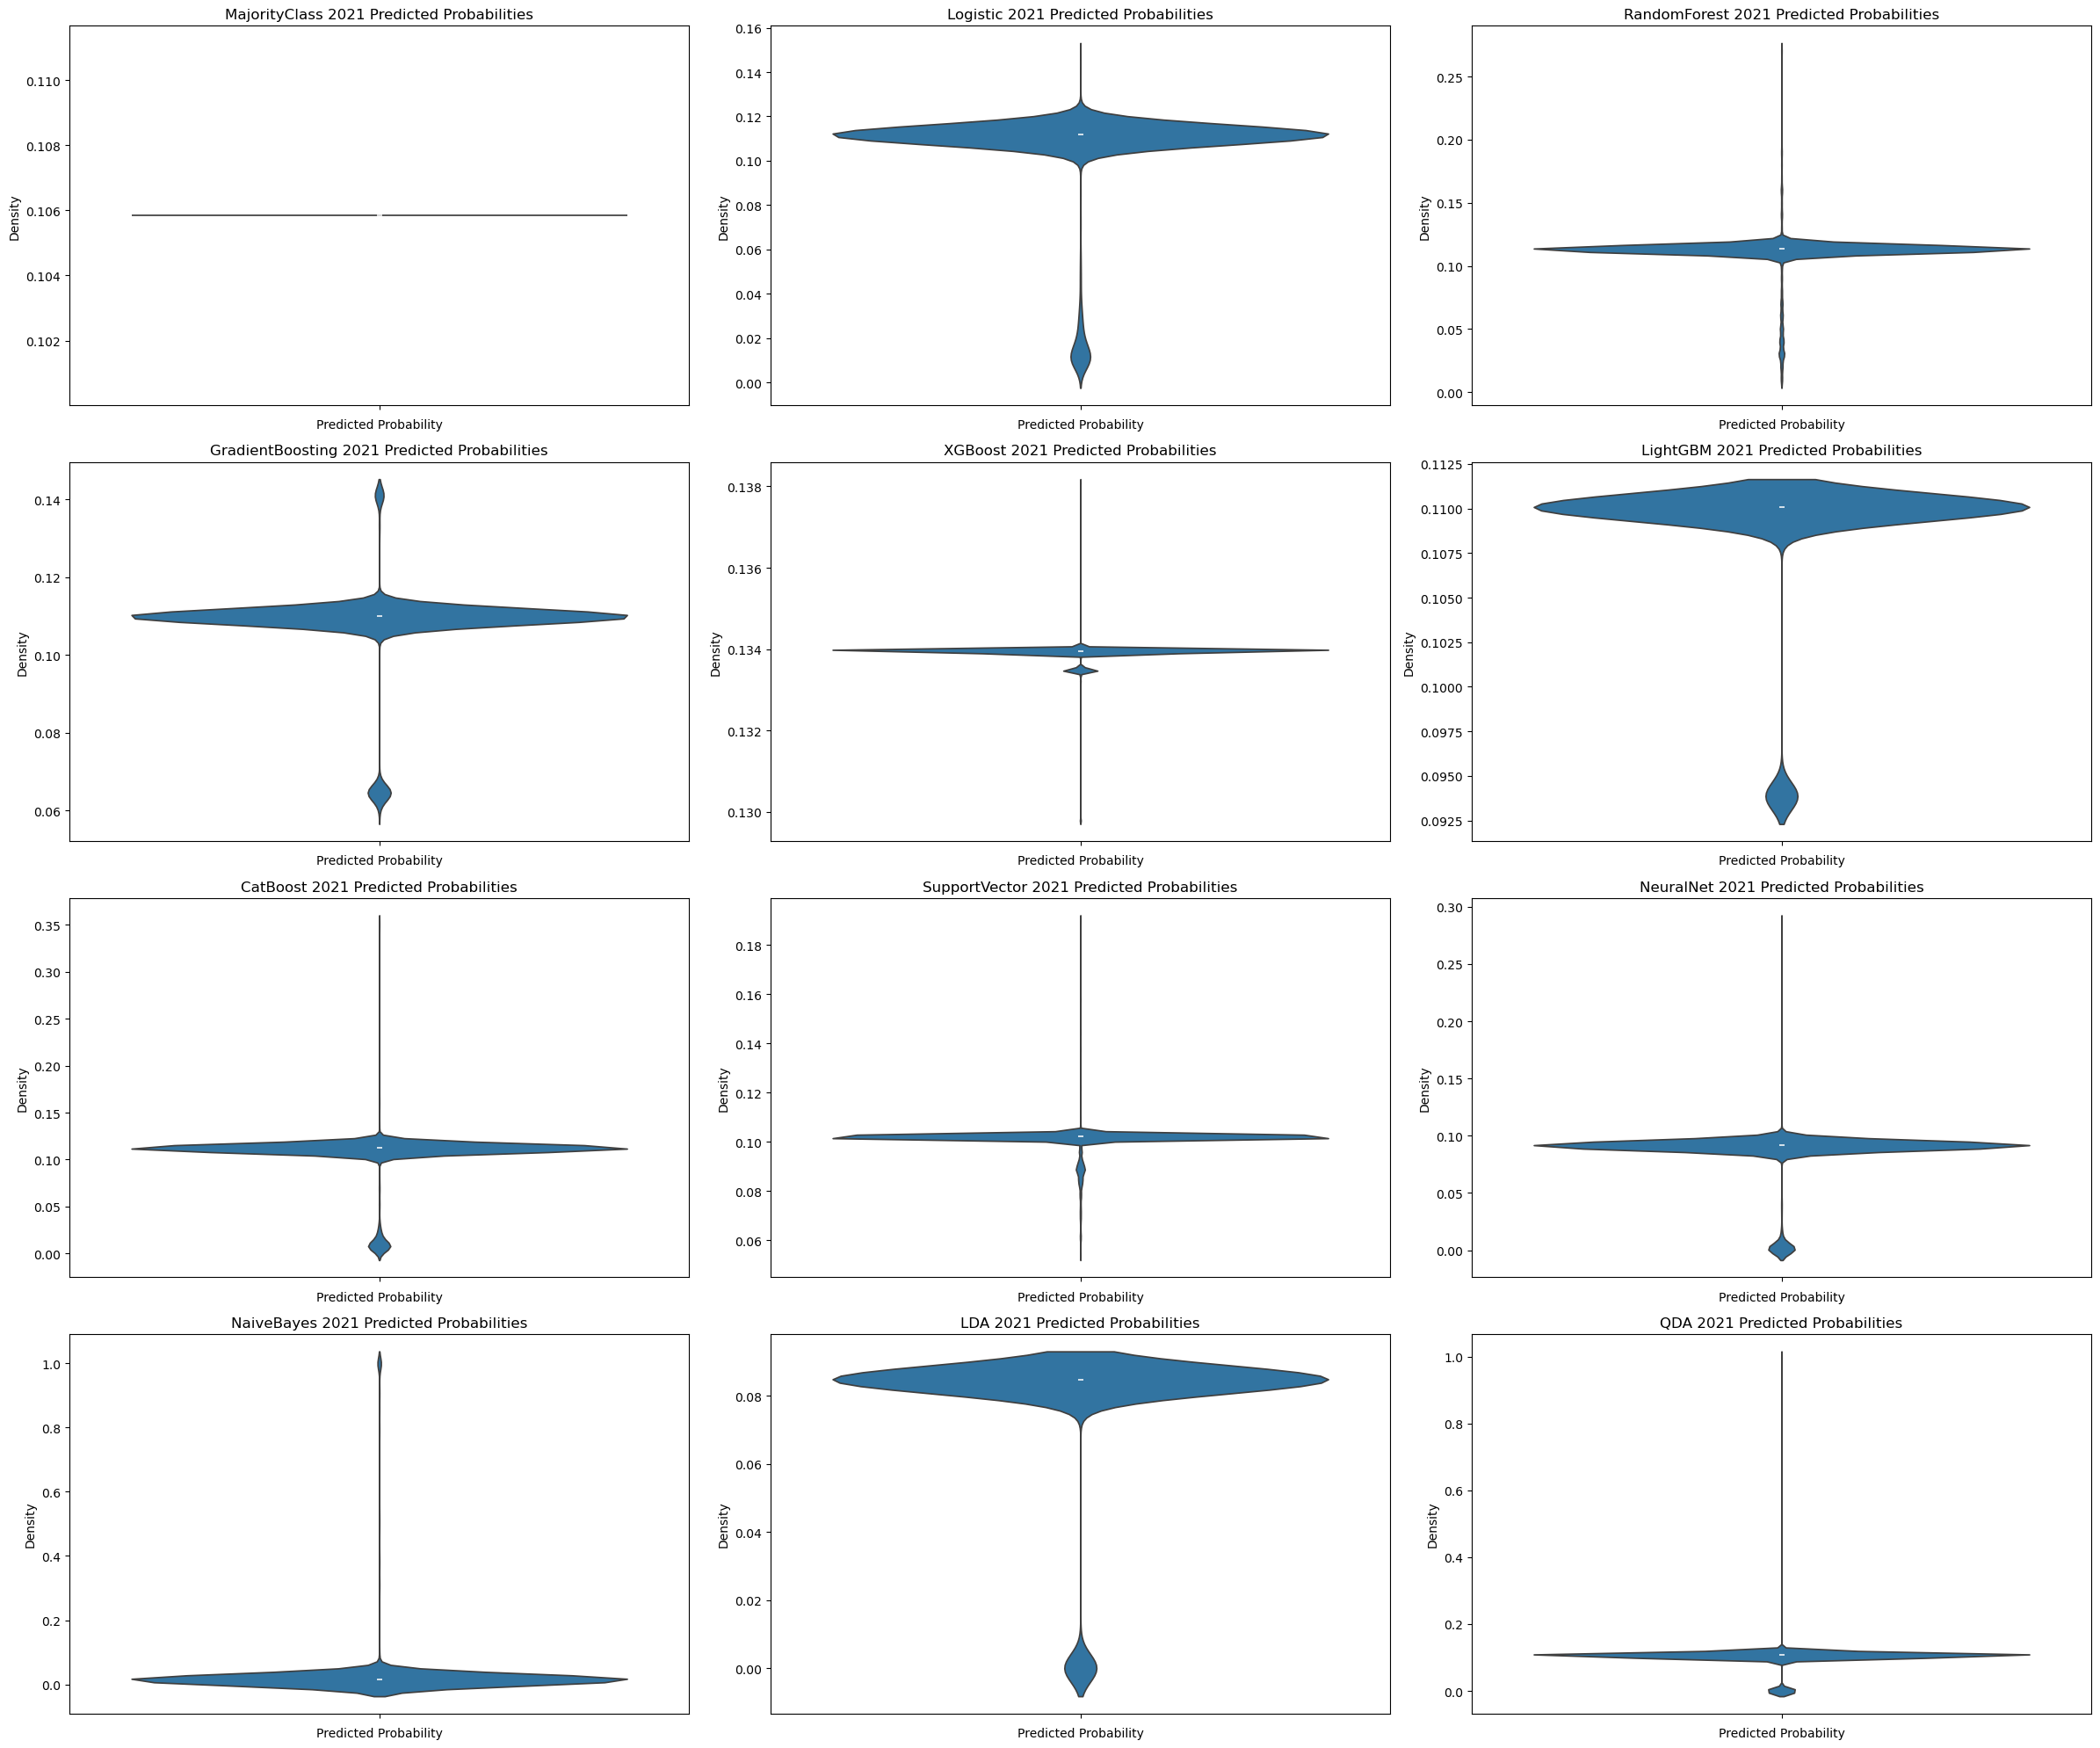

In [53]:
plot_metrics(models, "INV.INT.SI.Selfharm2023", one_step_feature_cols)

Notes:
- Not as good at predicting self harm (sub 0.6 ROC for all models)
- Pattern is different
    - Support Vector and Neural Net perform better

_______

#### **Thoughts**


Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.7959527824620574
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       472
         1.0       0.00      0.00      0.00       121

    accuracy                           0.80       593
   macro avg       0.40      0.50      0.44       593
weighted avg       0.63      0.80      0.71       593

Predicted probabilities for 2021 Suicide Questions:
[0.17820946 0.17820946 0.17820946 ... 0.17820946 0.17820946 0.17820946]
Permutation Performance for MajorityClass
                                         Feature  Importance
0                         INV.INT.SI.Attempt2022         0.0
43                        SBJ.LGL.Race.White2022         0.0
31                INV.LGL.SUB.Smokeless.Life2022         0.0
32                    INV.LGL.SUB.Vapes.Life2022         0.0
33                

Feature  Coefficient  Abs_Coefficient
3                        INV.INT.SI.Thoughts2022     0.603108         0.603108
1                             INV.INT.SI.How2022     0.397318         0.397318
44                      INV.LGL.HelpSeeking02022    -0.371623         0.371623
43                        SBJ.LGL.Race.White2022    -0.370878         0.370878
35                               SBJ.FCT.Sex2022    -0.346680         0.346680
20                   INV.LGL.PHQ4.Depression2022    -0.340065         0.340065
28                 INV.LGL.SUB.Cannabis.Life2022    -0.298475         0.298475
32                    INV.LGL.SUB.Vapes.Life2022    -0.283365         0.283365
29               INV.LGL.SUB.Cigarettes.Life2022    -0.224459         0.224459
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    -0.210331         0.210331
54                      INV.LGL.HelpSeeking62022     0.208750         0.208750
0                         INV.INT.SI.Attempt2022     0.205743         0.205743
14                   INV.INT.PHQ4.Q1.Anxious2022     0.205251         0.205251
5                    INV.DBL.APSS.Q2.TVRadio2022    -0.181790         0.181790
38                        SBJ.LGL.Race.Asian2022    -0.181683         0.181683
13                   INV.INT.PHQ4.Depression2022     0.181168         0.181168
55                      INV.LGL.HelpSeeking72022     0.170534         0.170534
2                        INV.INT.SI.Selfharm2022     0.161767         0.161767
26                  INV.INT.SUB.Vapes.Past302022     0.149485         0.149485
18                        INV.INT.PHQ4.Total2022     0.141139         0.141139
33                         SBJ.FCT.Ethnicity2022     0.139491         0.139491
19                      INV.LGL.PHQ4.Anxiety2022    -0.139355         0.139355
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    -0.139322         0.139322
34                          SBJ.FCT.GenderId2022     0.129202         0.129202
56                      INV.LGL.HelpSeeking82022    -0.128748         0.128748
4                INV.DBL.APSS.Q1.MindReading2022    -0.127688         0.127688
42                     SBJ.LGL.Race.Multiple2022     0.127357         0.127357
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    -0.125797         0.125797
40      SBJ.LGL.Race.HawaiianPacificIslander2022    -0.118992         0.118992
48                     INV.LGL.HelpSeeking122022    -0.118992         0.118992
36                         SBJ.FCT.Sexuality2022     0.116313         0.116313
11                        INV.DBL.APSS.Total2022     0.113669         0.113669
15                   INV.INT.PHQ4.Q2.Worried2022    -0.104246         0.104246
8                 INV.DBL.APSS.Q5.Controlled2022    -0.100649         0.100649
22               INV.INT.SUB.Cannabis.Past302022    -0.099880         0.099880
23             INV.INT.SUB.Cigarettes.Past302022    -0.097036         0.097036
50                      INV.LGL.HelpSeeking22022    -0.093438         0.093438
49                     INV.LGL.HelpSeeking132022    -0.090501         0.090501
21                INV.INT.SUB.Alcohol.Past302022    -0.082334         0.082334
53                      INV.LGL.HelpSeeking52022    -0.078660         0.078660
31                INV.LGL.SUB.Smokeless.Life2022    -0.072766         0.072766
10               INV.DBL.APSS.Q7.Grandiosity2022    -0.071893         0.071893
46                     INV.LGL.HelpSeeking102022    -0.058768         0.058768
25              INV.INT.SUB.Smokeless.Past302022    -0.058397         0.058397
7                   INV.DBL.APSS.Q4.Auditory2022    -0.057588         0.057588
16                 INV.INT.PHQ4.Q3.Depressed2022     0.057438         0.057438
27                  INV.LGL.SUB.Alcohol.Life2022    -0.047574         0.047574
51                      INV.LGL.HelpSeeking32022     0.046739         0.046739
24                 INV.INT.SUB.Cigars.Past302022    -0.044827         0.044827
6                     INV.DBL.APSS.Q3.Spying2022     0.043701         0.043701
9           

Permutation Performance for Logistic
                                         Feature    Importance
18                        INV.INT.PHQ4.Total2022  1.028668e-02
34                          SBJ.FCT.GenderId2022  4.384486e-03
36                         SBJ.FCT.Sexuality2022  3.372681e-03
14                   INV.INT.PHQ4.Q1.Anxious2022  3.035413e-03
16                 INV.INT.PHQ4.Q3.Depressed2022  2.529511e-03
13                   INV.INT.PHQ4.Depression2022  2.529511e-03
26                  INV.INT.SUB.Vapes.Past302022  2.529511e-03
54                      INV.LGL.HelpSeeking62022  2.529511e-03
3                        INV.INT.SI.Thoughts2022  2.360877e-03
55                      INV.LGL.HelpSeeking72022  2.192243e-03
1                             INV.INT.SI.How2022  2.192243e-03
0                         INV.INT.SI.Attempt2022  2.192243e-03
2                        INV.INT.SI.Selfharm2022  2.023609e-03
42                     SBJ.LGL.Race.Multiple2022  1.011804e-03
11                

Feature  Importance
3                        INV.INT.SI.Thoughts2022    0.066769
18                        INV.INT.PHQ4.Total2022    0.051296
13                   INV.INT.PHQ4.Depression2022    0.049440
1                             INV.INT.SI.How2022    0.044865
36                         SBJ.FCT.Sexuality2022    0.044800
34                          SBJ.FCT.GenderId2022    0.041030
16                 INV.INT.PHQ4.Q3.Depressed2022    0.038497
11                        INV.DBL.APSS.Total2022    0.035235
12                      INV.INT.PHQ4.Anxiety2022    0.034784
15                   INV.INT.PHQ4.Q2.Worried2022    0.028234
0                         INV.INT.SI.Attempt2022    0.027991
17                 INV.INT.PHQ4.Q4.Anhedonia2022    0.027147
14                   INV.INT.PHQ4.Q1.Anxious2022    0.024899
2                        INV.INT.SI.Selfharm2022    0.024745
43                        SBJ.LGL.Race.White2022    0.024335
6                     INV.DBL.APSS.Q3.Spying2022    0.023453
45                      INV.LGL.HelpSeeking12022    0.019835
55                      INV.LGL.HelpSeeking72022    0.018497
51                      INV.LGL.HelpSeeking32022    0.017208
7                   INV.DBL.APSS.Q4.Auditory2022    0.016942
54                      INV.LGL.HelpSeeking62022    0.016913
33                         SBJ.FCT.Ethnicity2022    0.015769
9                     INV.DBL.APSS.Q6.Visual2022    0.015755
50                      INV.LGL.HelpSeeking22022    0.015674
53                      INV.LGL.HelpSeeking52022    0.014743
42                     SBJ.LGL.Race.Multiple2022    0.014689
4                INV.DBL.APSS.Q1.MindReading2022    0.014076
27                  INV.LGL.SUB.Alcohol.Life2022    0.013726
35                               SBJ.FCT.Sex2022    0.013579
52                      INV.LGL.HelpSeeking42022    0.012827
8                 INV.DBL.APSS.Q5.Controlled2022    0.012790
44                      INV.LGL.HelpSeeking02022    0.012338
19                      INV.LGL.PHQ4.Anxiety2022    0.011187
21                INV.INT.SUB.Alcohol.Past302022    0.011001
28                 INV.LGL.SUB.Cannabis.Life2022    0.010653
29               INV.LGL.SUB.Cigarettes.Life2022    0.009952
38                        SBJ.LGL.Race.Asian2022    0.009711
32                    INV.LGL.SUB.Vapes.Life2022    0.009632
46                     INV.LGL.HelpSeeking102022    0.009586
22               INV.INT.SUB.Cannabis.Past302022    0.009548
20                   INV.LGL.PHQ4.Depression2022    0.008856
10               INV.DBL.APSS.Q7.Grandiosity2022    0.008058
47                     INV.LGL.HelpSeeking112022    0.007601
56                      INV.LGL.HelpSeeking82022    0.006922
57                      INV.LGL.HelpSeeking92022    0.006903
49                     INV.LGL.HelpSeeking132022    0.006484
26                  INV.INT.SUB.Vapes.Past302022    0.006101
23             INV.INT.SUB.Cigarettes.Past302022    0.005928
39  SBJ.LGL.Race.HaitianBlackAfricanAmerican2022    0.005318
5                    INV.DBL.APSS.Q2.TVRadio2022    0.005084
37   SBJ.LGL.Race.AmericanIndianAlaskaNative2022    0.003822
41    SBJ.LGL.Race.MiddleEasternNorthAfrican2022    0.003620
48                     INV.LGL.HelpSeeking122022    0.003461
40      SBJ.LGL.Race.HawaiianPacificIslander2022    0.002911
30                   INV.LGL.SUB.Cigars.Life2022    0.002847
24                 INV.INT.SUB.Cigars.Past302022    0.001083
31                INV.LGL.SUB.Smokeless.Life2022    0.000569
25              INV.INT.SUB.Smokeless.Past302022    0.000282

Permutation Performance for RandomForest
                                         Feature  Importance
0                         INV.INT.SI.Attempt2022    0.003035
57                      INV.LGL.HelpSeeking92022    0.003035
35                               SBJ.FCT.Sex2022    0.001855
13                   INV.INT.PHQ4.Depression2022    0.001855
18                        INV.INT.PHQ4.Total2022    0.001686
51                      INV.LGL.HelpSeeking32022    0.001518
28                 INV.LGL.SUB.Cannabis.Life2022    0.001349
7                   INV.DBL.APSS.Q4.Auditory2022    0.001349
8                 INV.DBL.APSS.Q5.Controlled2022    0.001349
43                        SBJ.LGL.Race.White2022    0.001349
47                     INV.LGL.HelpSeeking112022    0.001349
12                      INV.INT.PHQ4.Anxiety2022    0.001180
54                      INV.LGL.HelpSeeking62022    0.001012
15                   INV.INT.PHQ4.Q2.Worried2022    0.001012
42                     SBJ.LGL.Race.Multiple

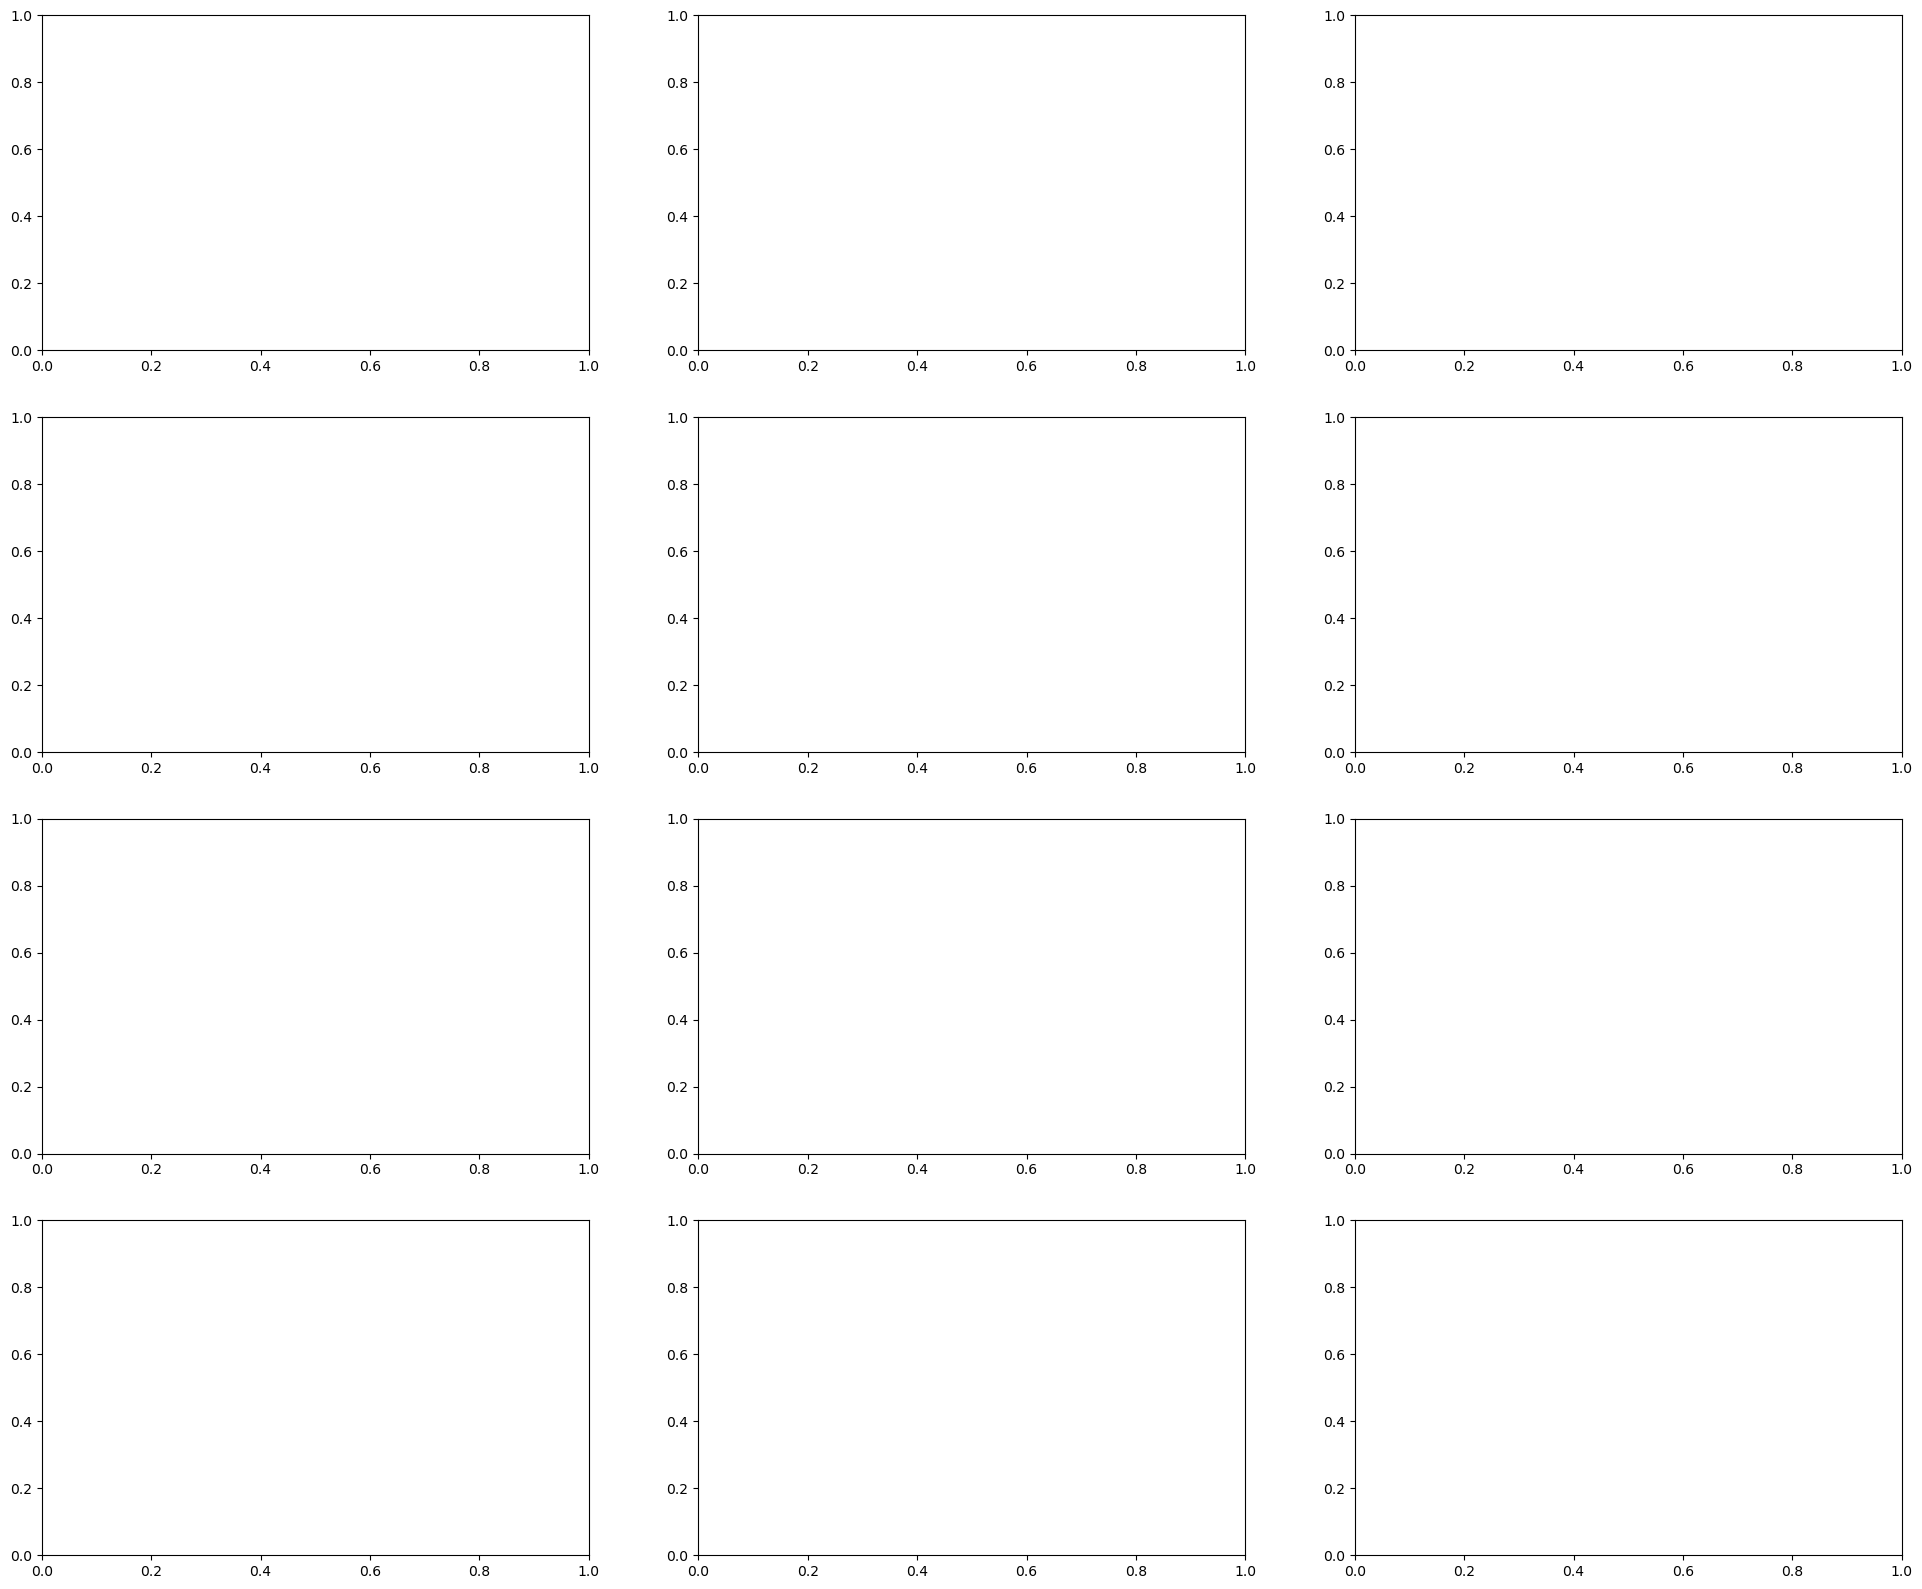

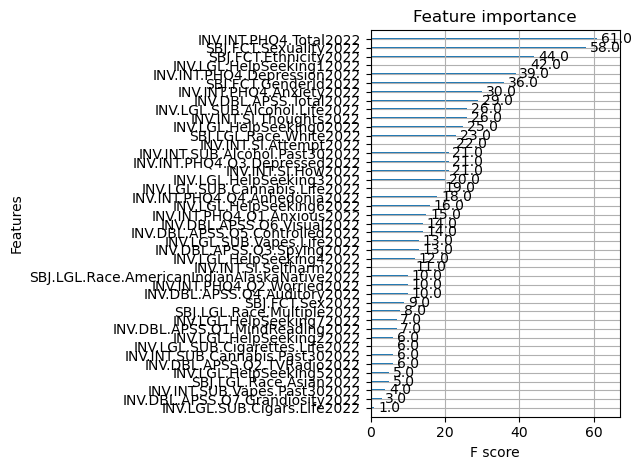

Model Name  2023 Accuracy  ROC AUC Score
10               LDA       0.792580       0.589981
5           LightGBM       0.797639       0.589106
2       RandomForest       0.795953       0.586322
4            XGBoost       0.789207       0.580246
3   GradientBoosting       0.795953       0.579414
6           CatBoost       0.795953       0.571369
1           Logistic       0.801012       0.571053
7      SupportVector       0.792580       0.562018
11               QDA       0.777403       0.552633
9         NaiveBayes       0.359191       0.549254
8          NeuralNet       0.790894       0.538783
0      MajorityClass       0.795953       0.500000

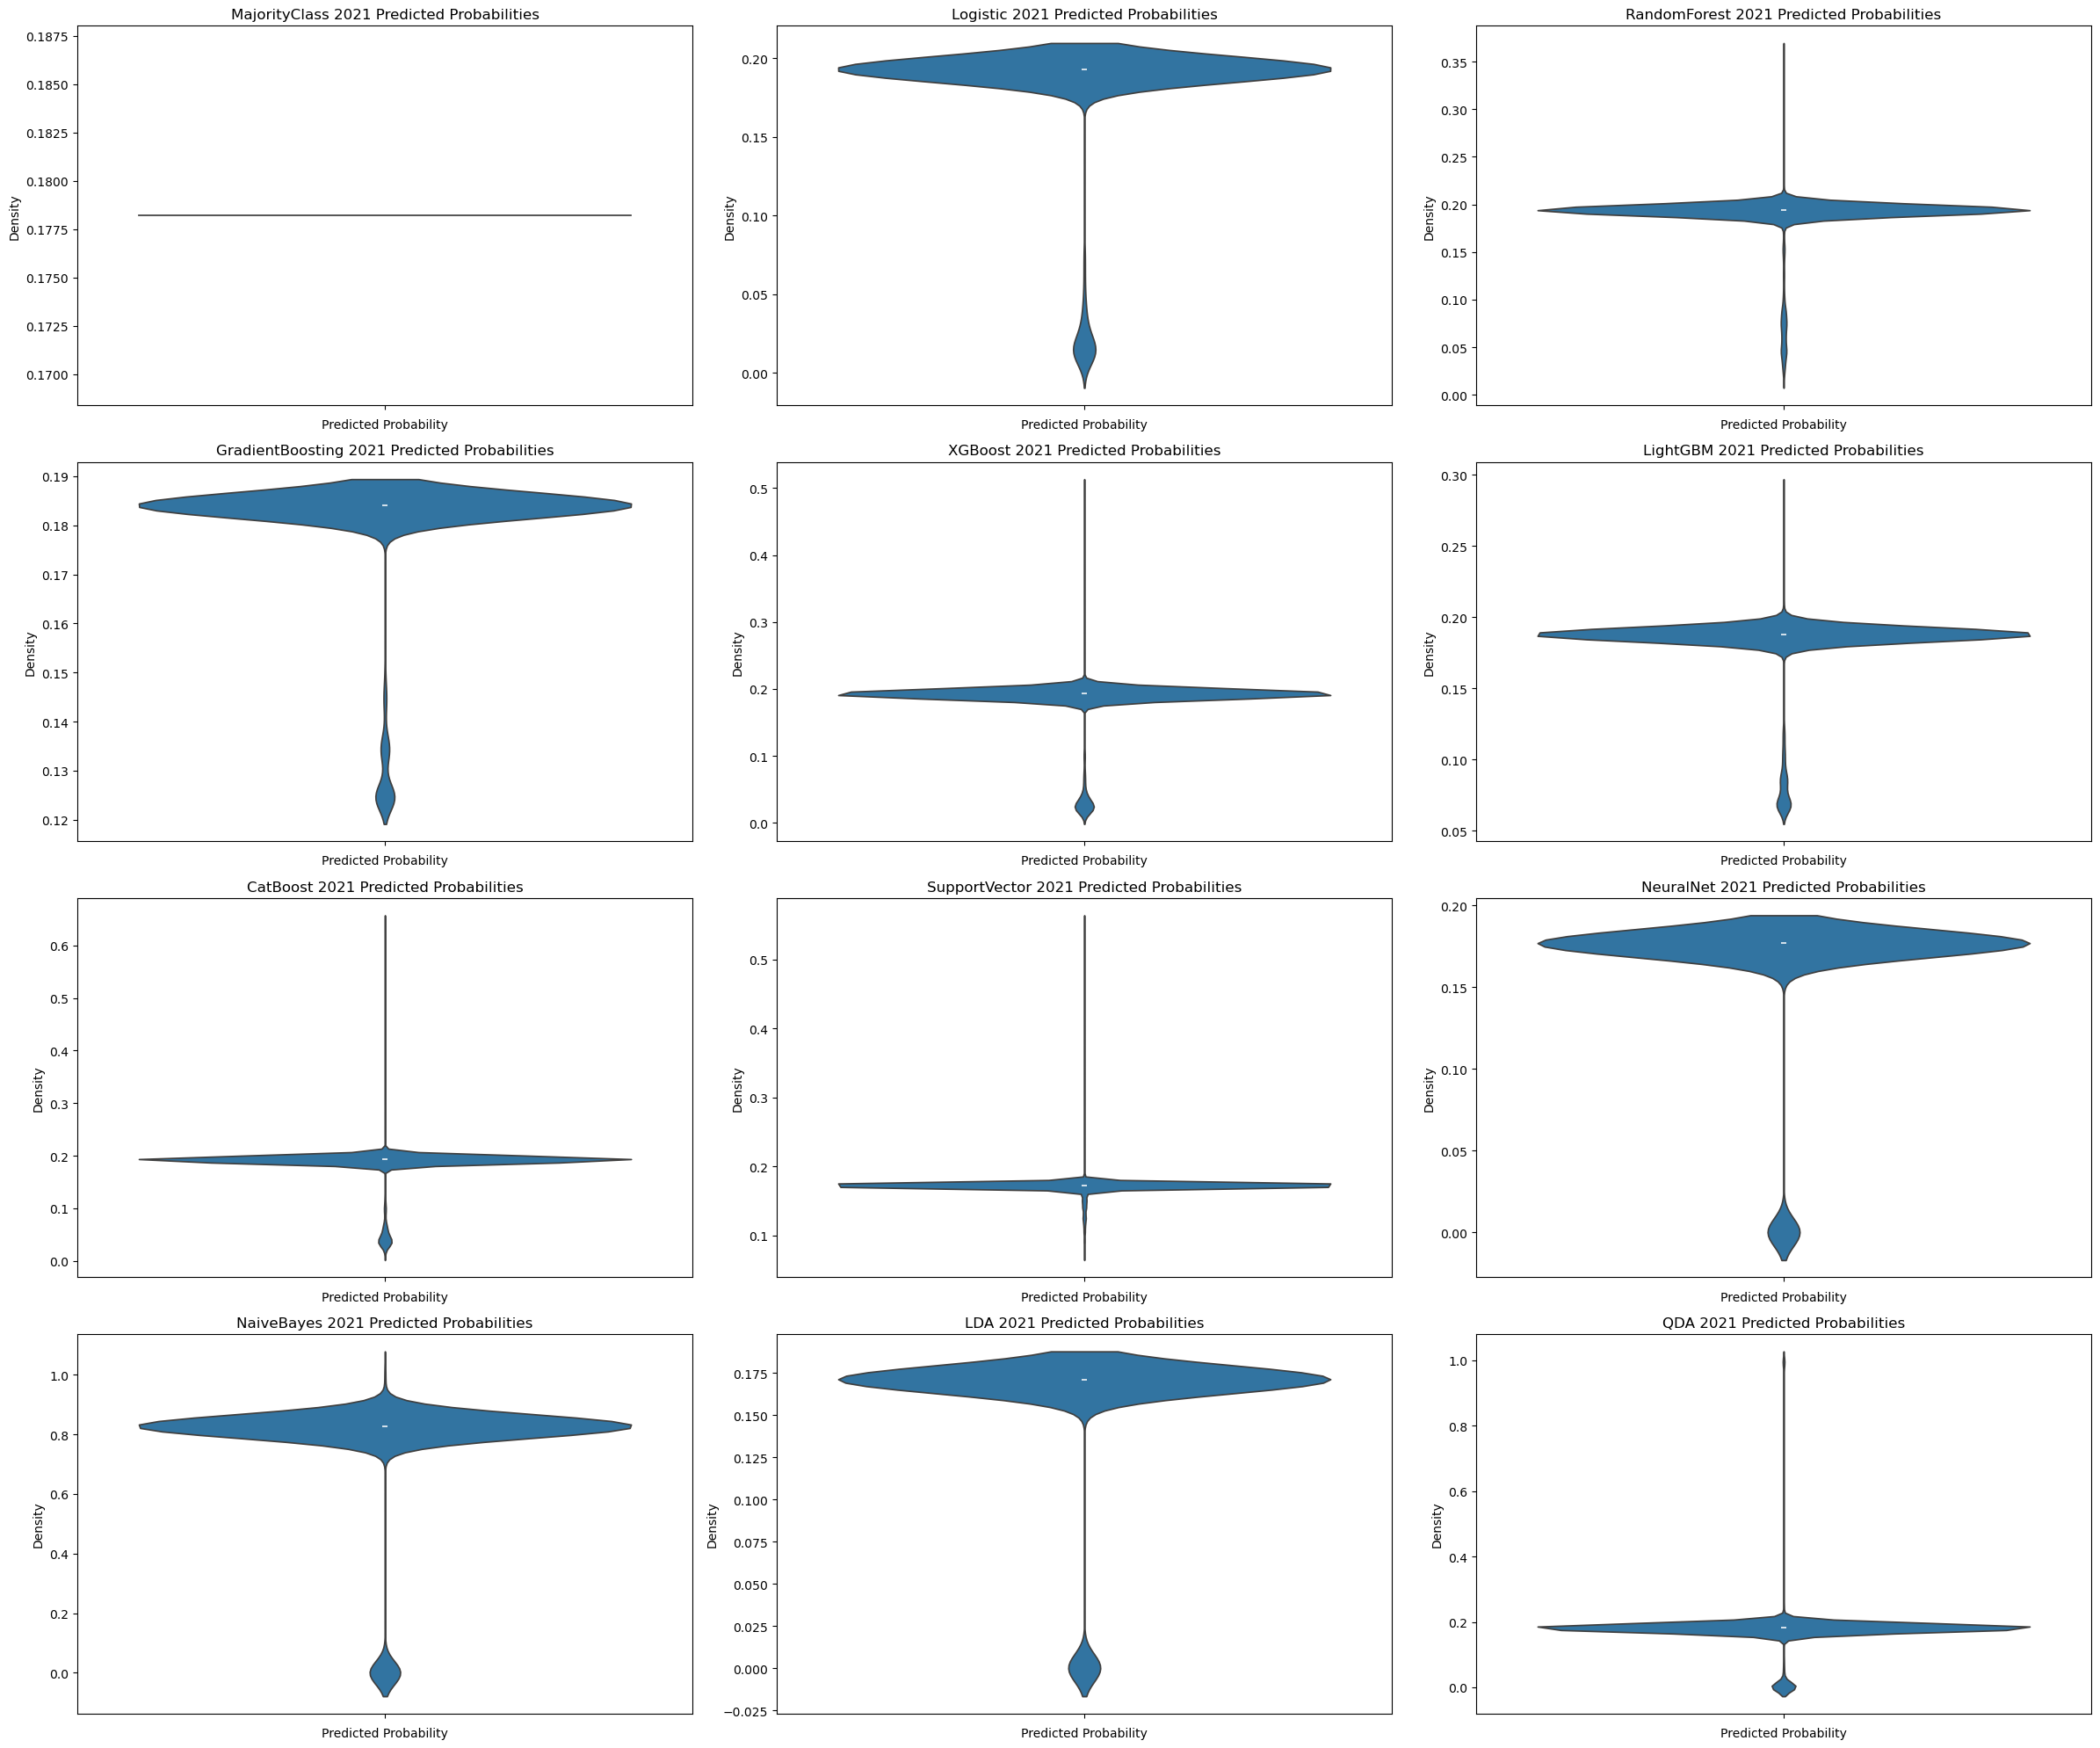

In [54]:
plot_metrics(models, "INV.INT.SI.Thoughts2023", one_step_feature_cols)

<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>

## **Ablation Tests**

In [182]:
categories = [suicide, psychotic, phq4, substance, identity, help]

Omitting ['INV.INT.SI.Attempt', 'INV.INT.SI.How', 'INV.INT.SI.Selfharm', 'INV.INT.SI.Thoughts']

Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Predicted probabilities for 2021 Suicide Questions:
[0.04347826 0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]

Tuning Logistic...
Best Hyperparameters: {'C': 1}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 2023 Predictions: 0.55021815008726
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0    

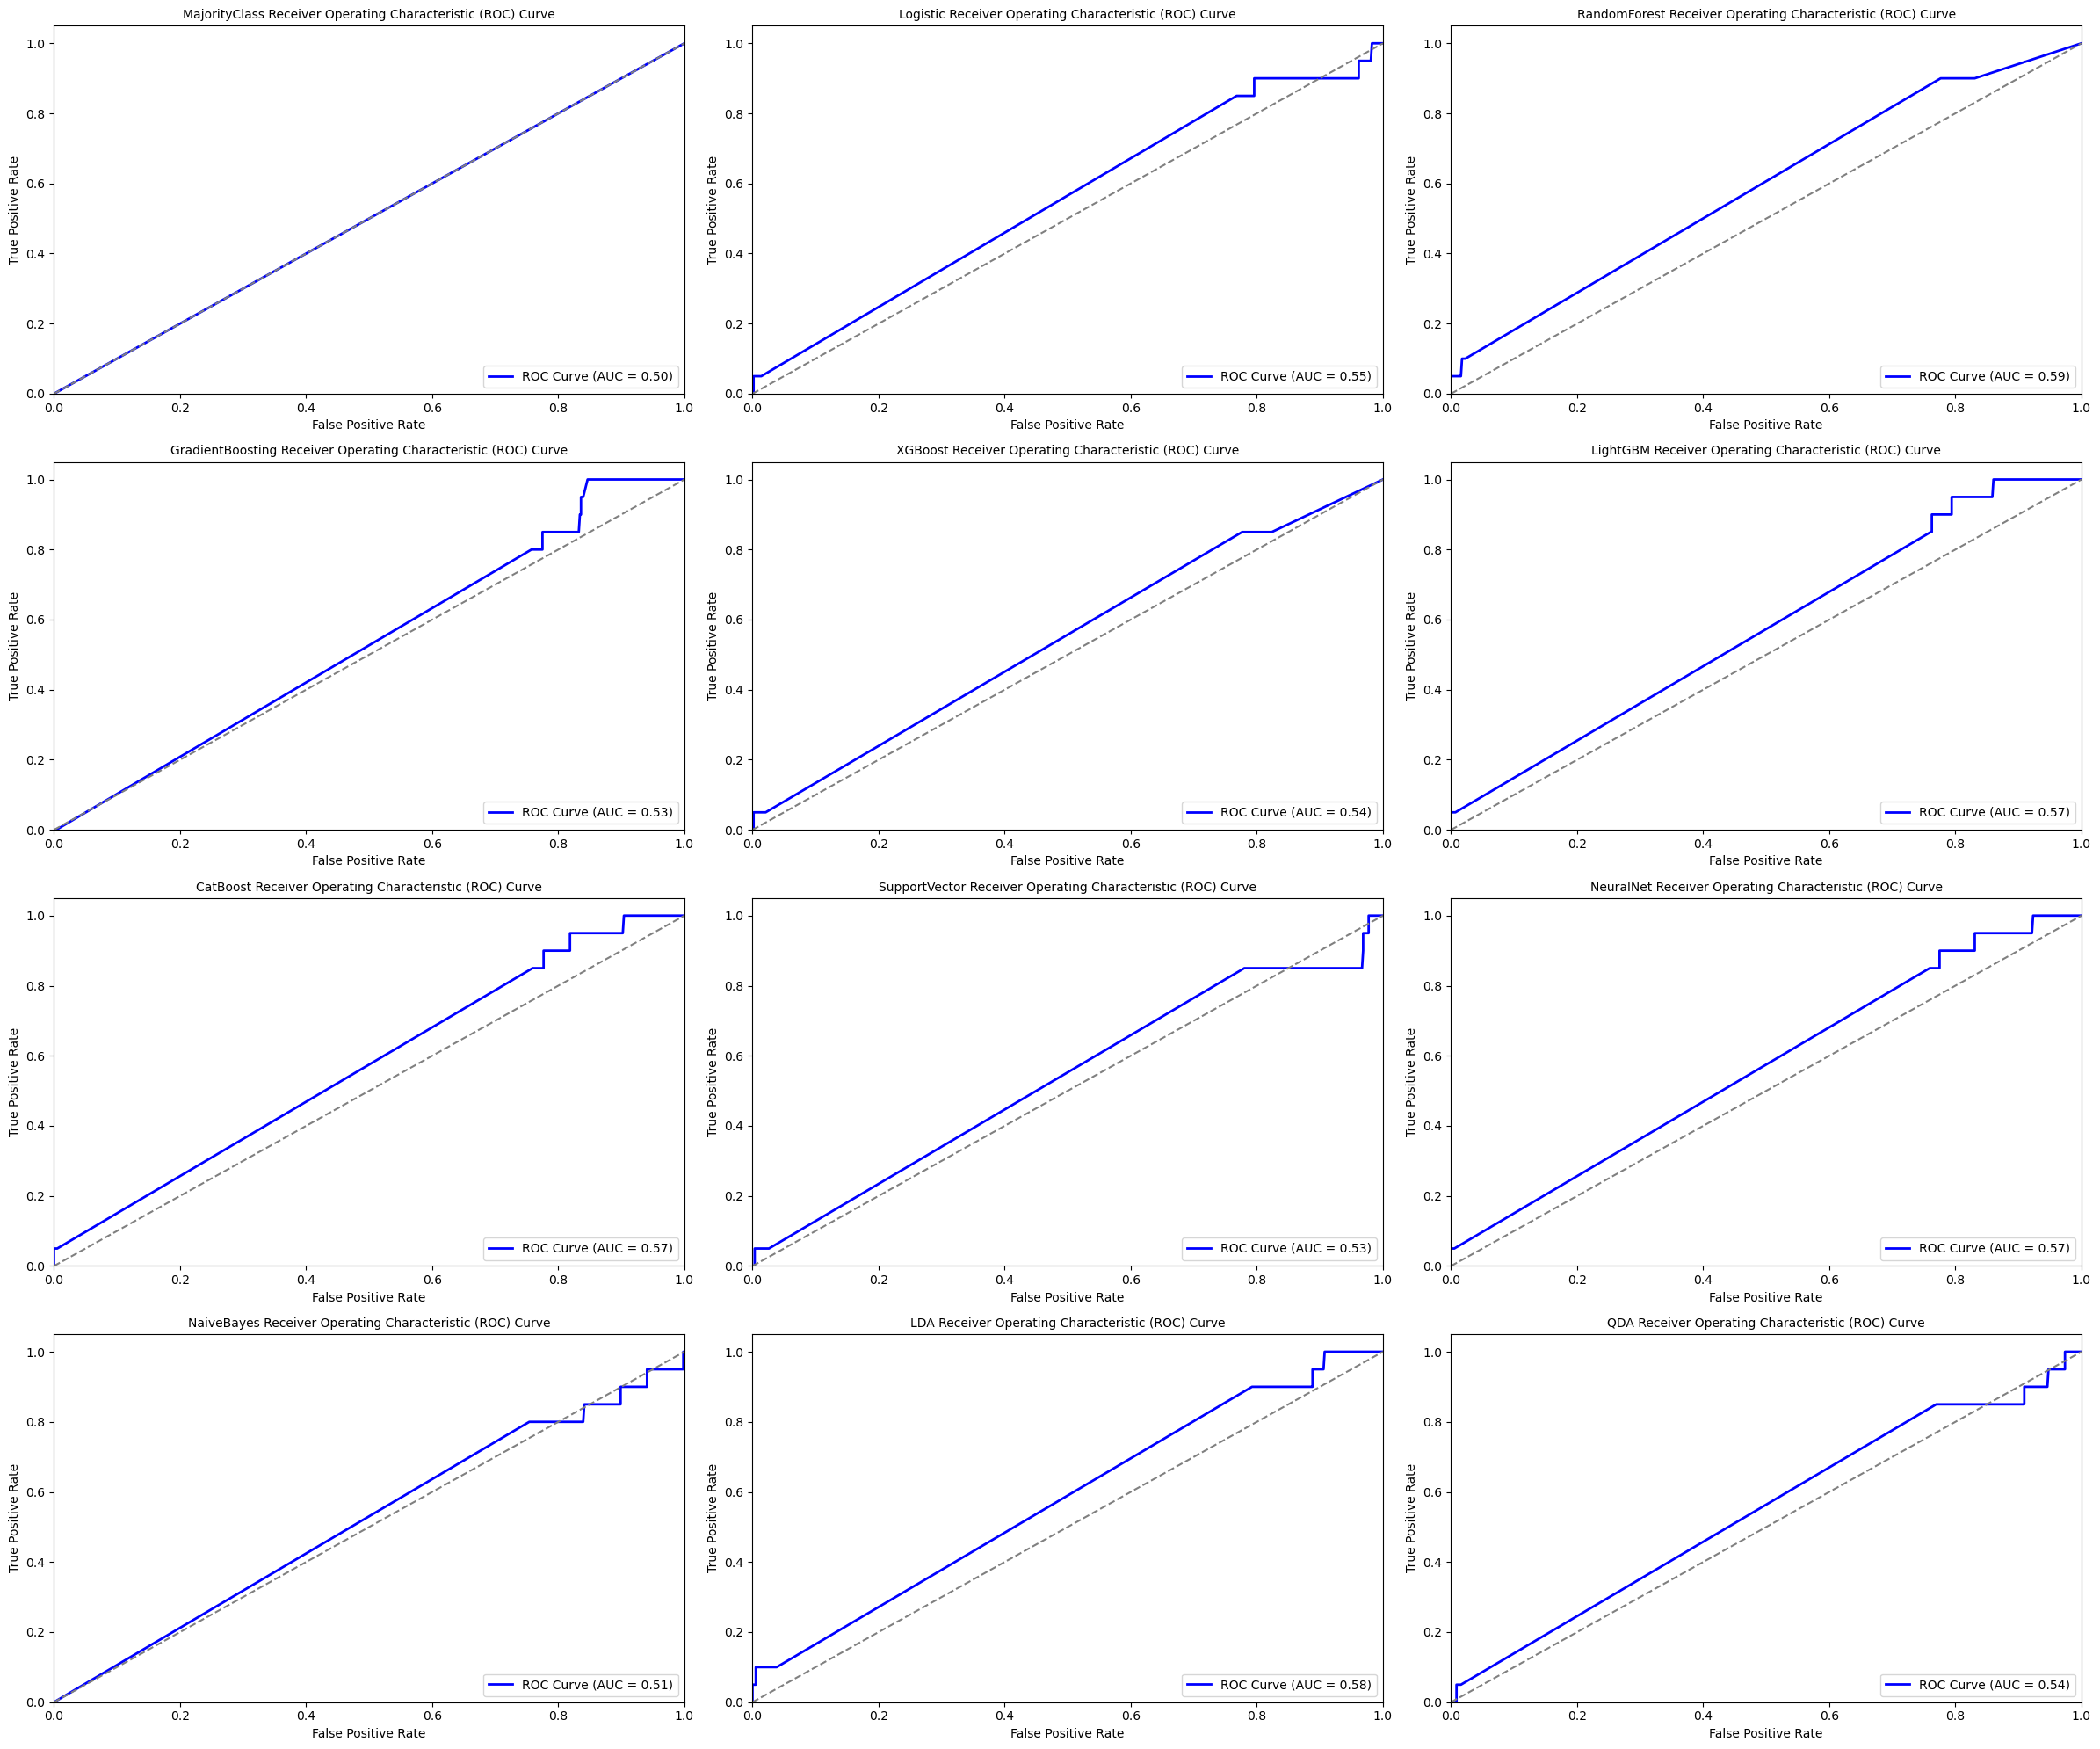

Model Name  2023 Accuracy  ROC AUC Score
2       RandomForest       0.967960       0.587914
10               LDA       0.962901       0.577705
5           LightGBM       0.966273       0.572033
6           CatBoost       0.967960       0.569328
8          NeuralNet       0.967960       0.567845
1           Logistic       0.966273       0.550218
4            XGBoost       0.966273       0.544110
11               QDA       0.959528       0.543935
7      SupportVector       0.966273       0.531632
3   GradientBoosting       0.964587       0.531283
9         NaiveBayes       0.264755       0.514529
0      MajorityClass       0.966273       0.500000

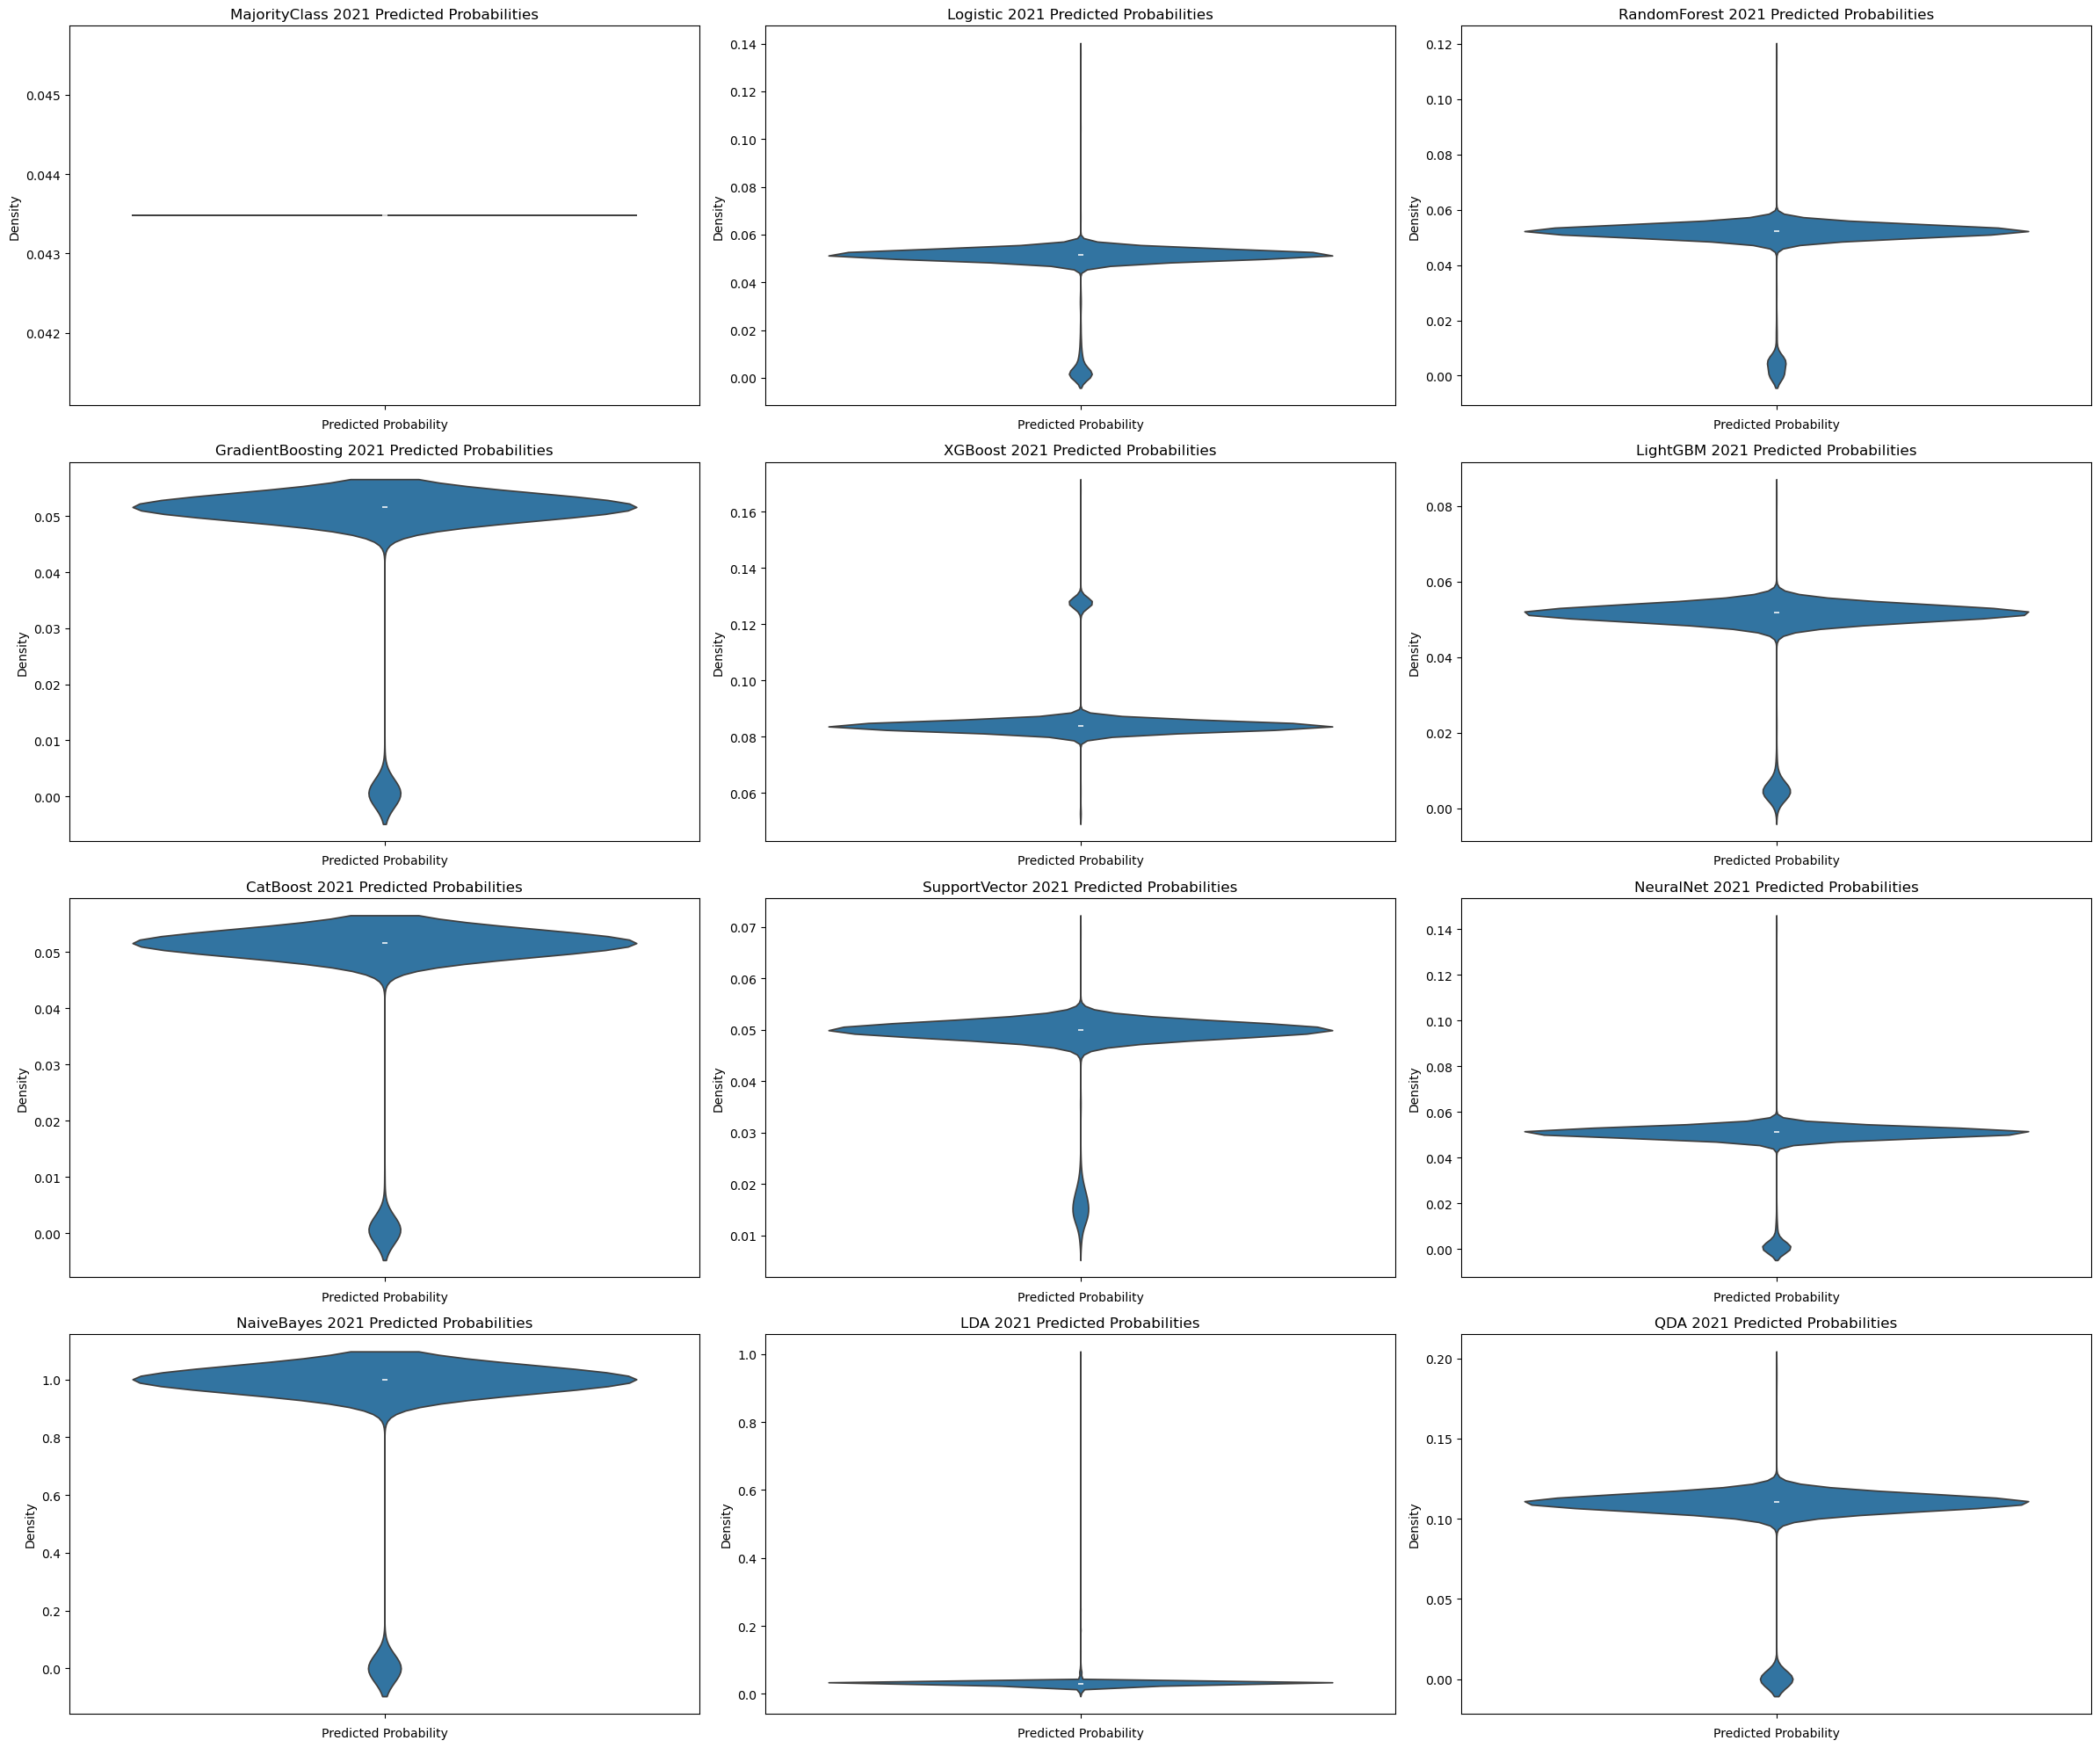

Omitting ['INV.DBL.APSS.Q1.MindReading', 'INV.DBL.APSS.Q2.TVRadio', 'INV.DBL.APSS.Q3.Spying', 'INV.DBL.APSS.Q4.Auditory', 'INV.DBL.APSS.Q5.Controlled', 'INV.DBL.APSS.Q6.Visual', 'INV.DBL.APSS.Q7.Grandiosity', 'INV.DBL.APSS.Total']

Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Predicted probabilities for 2021 Suicide Questions:
[0.04347826 0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]

Tuning Logistic...
Best Hyperparameters: {'C': 10}
Accuracy for 2023 Predictions: 0.9679595278246206
ROC AUC Score for 2023 Predictio

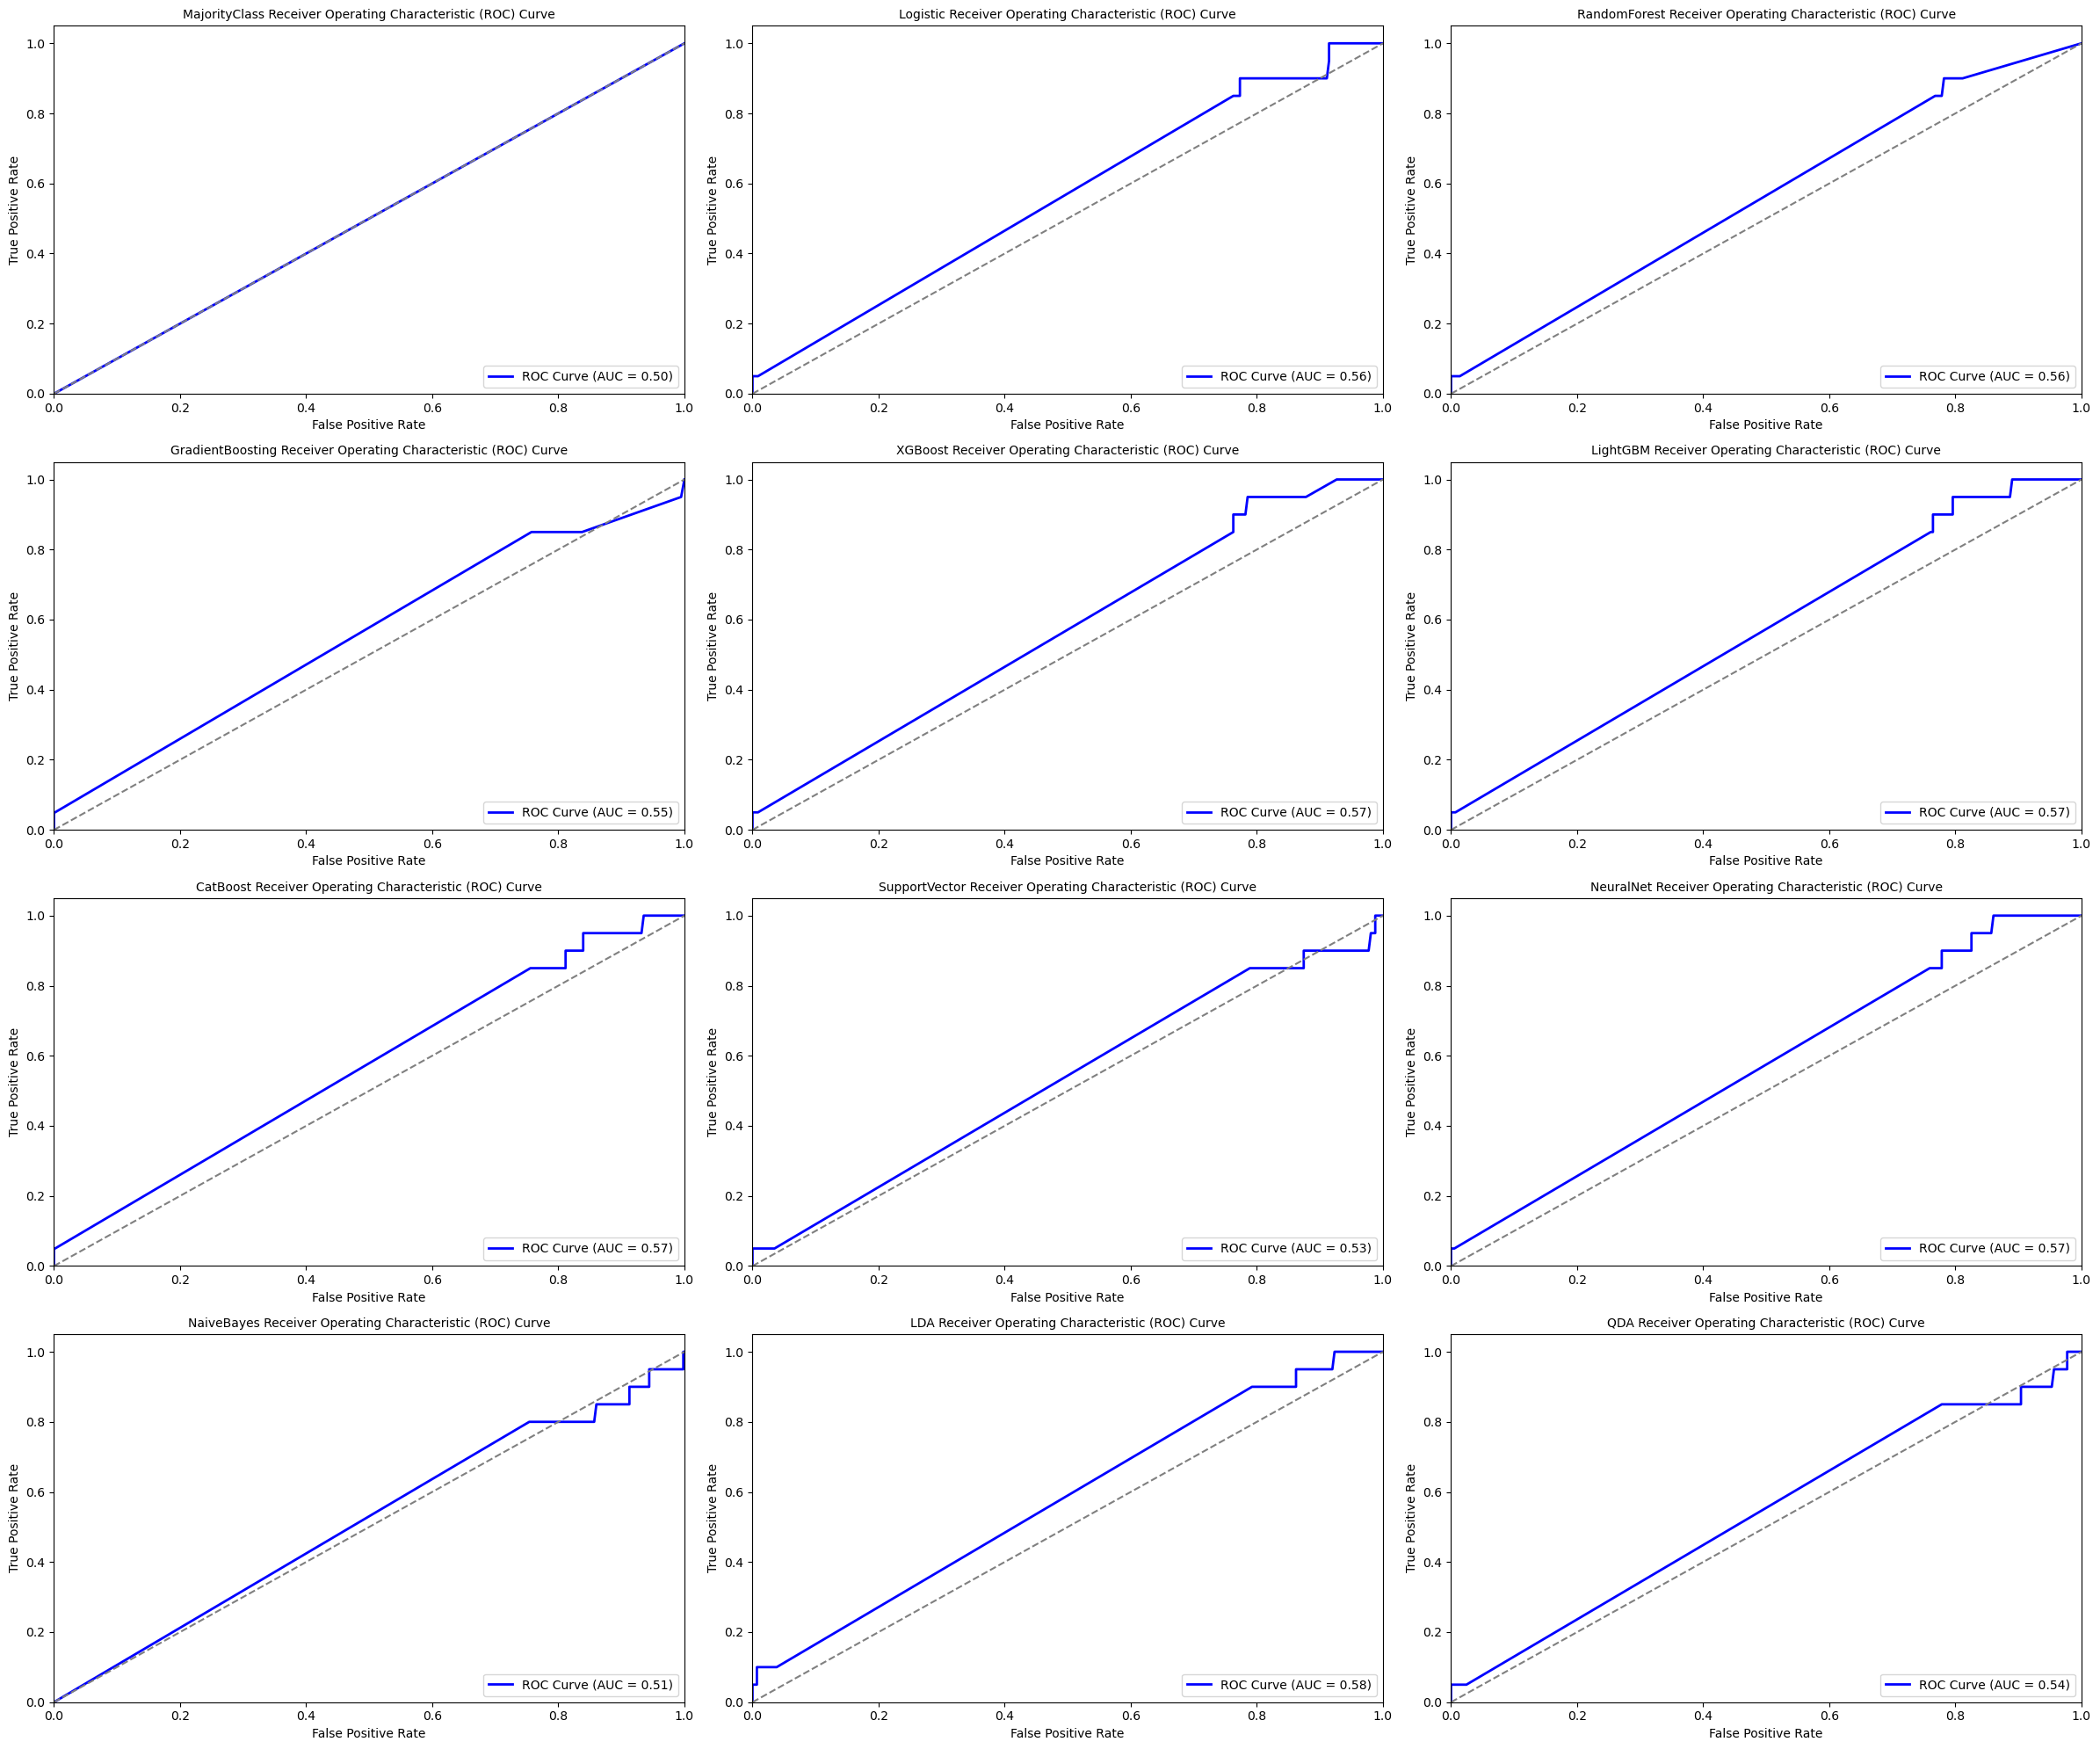

Model Name  2023 Accuracy  ROC AUC Score
10               LDA       0.962901       0.578185
8          NeuralNet       0.967960       0.571117
5           LightGBM       0.967960       0.570419
4            XGBoost       0.967960       0.569023
6           CatBoost       0.967960       0.567801
1           Logistic       0.967960       0.561431
2       RandomForest       0.967960       0.557679
3   GradientBoosting       0.967960       0.554843
11               QDA       0.954469       0.537086
7      SupportVector       0.966273       0.528447
9         NaiveBayes       0.264755       0.512740
0      MajorityClass       0.966273       0.500000

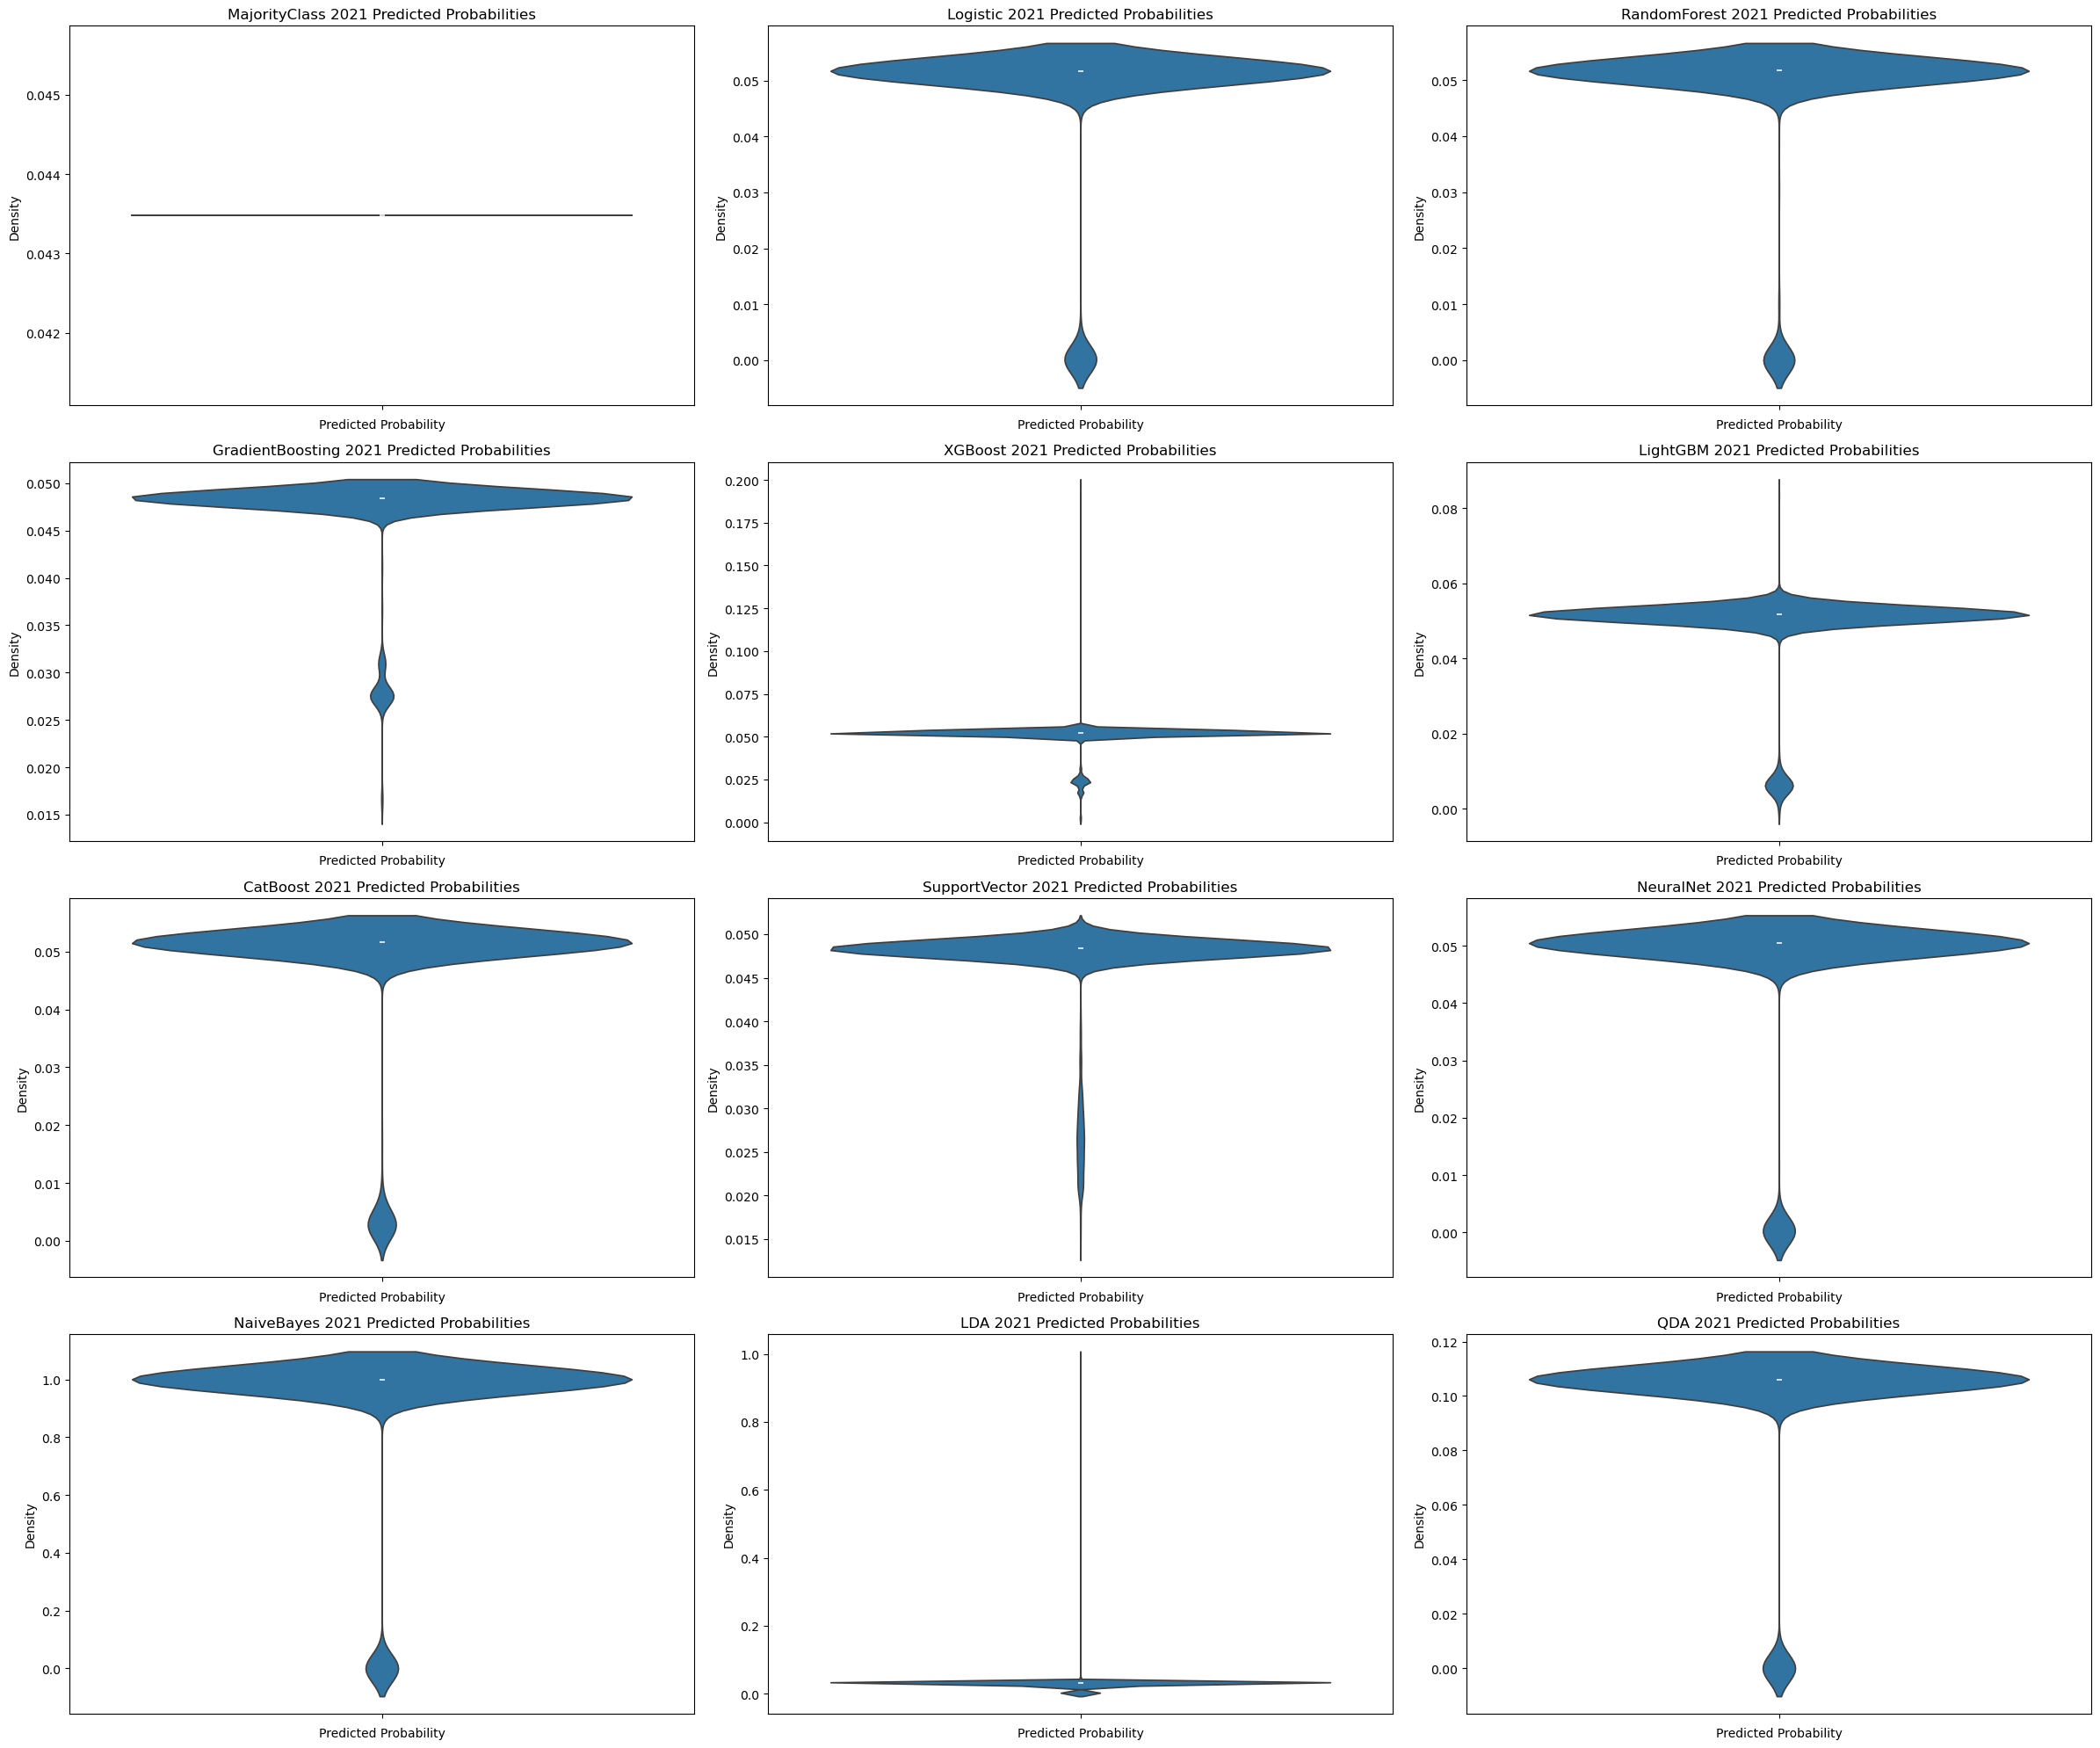

Omitting ['INV.INT.PHQ4.Anxiety', 'INV.INT.PHQ4.Depression', 'INV.INT.PHQ4.Q1.Anxious', 'INV.INT.PHQ4.Q2.Worried', 'INV.INT.PHQ4.Q3.Depressed', 'INV.INT.PHQ4.Q4.Anhedonia', 'INV.INT.PHQ4.Total', 'INV.LGL.PHQ4.Anxiety', 'INV.LGL.PHQ4.Depression']

Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Predicted probabilities for 2021 Suicide Questions:
[0.04347826 0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]

Tuning Logistic...
Best Hyperparameters: {'C': 1}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 

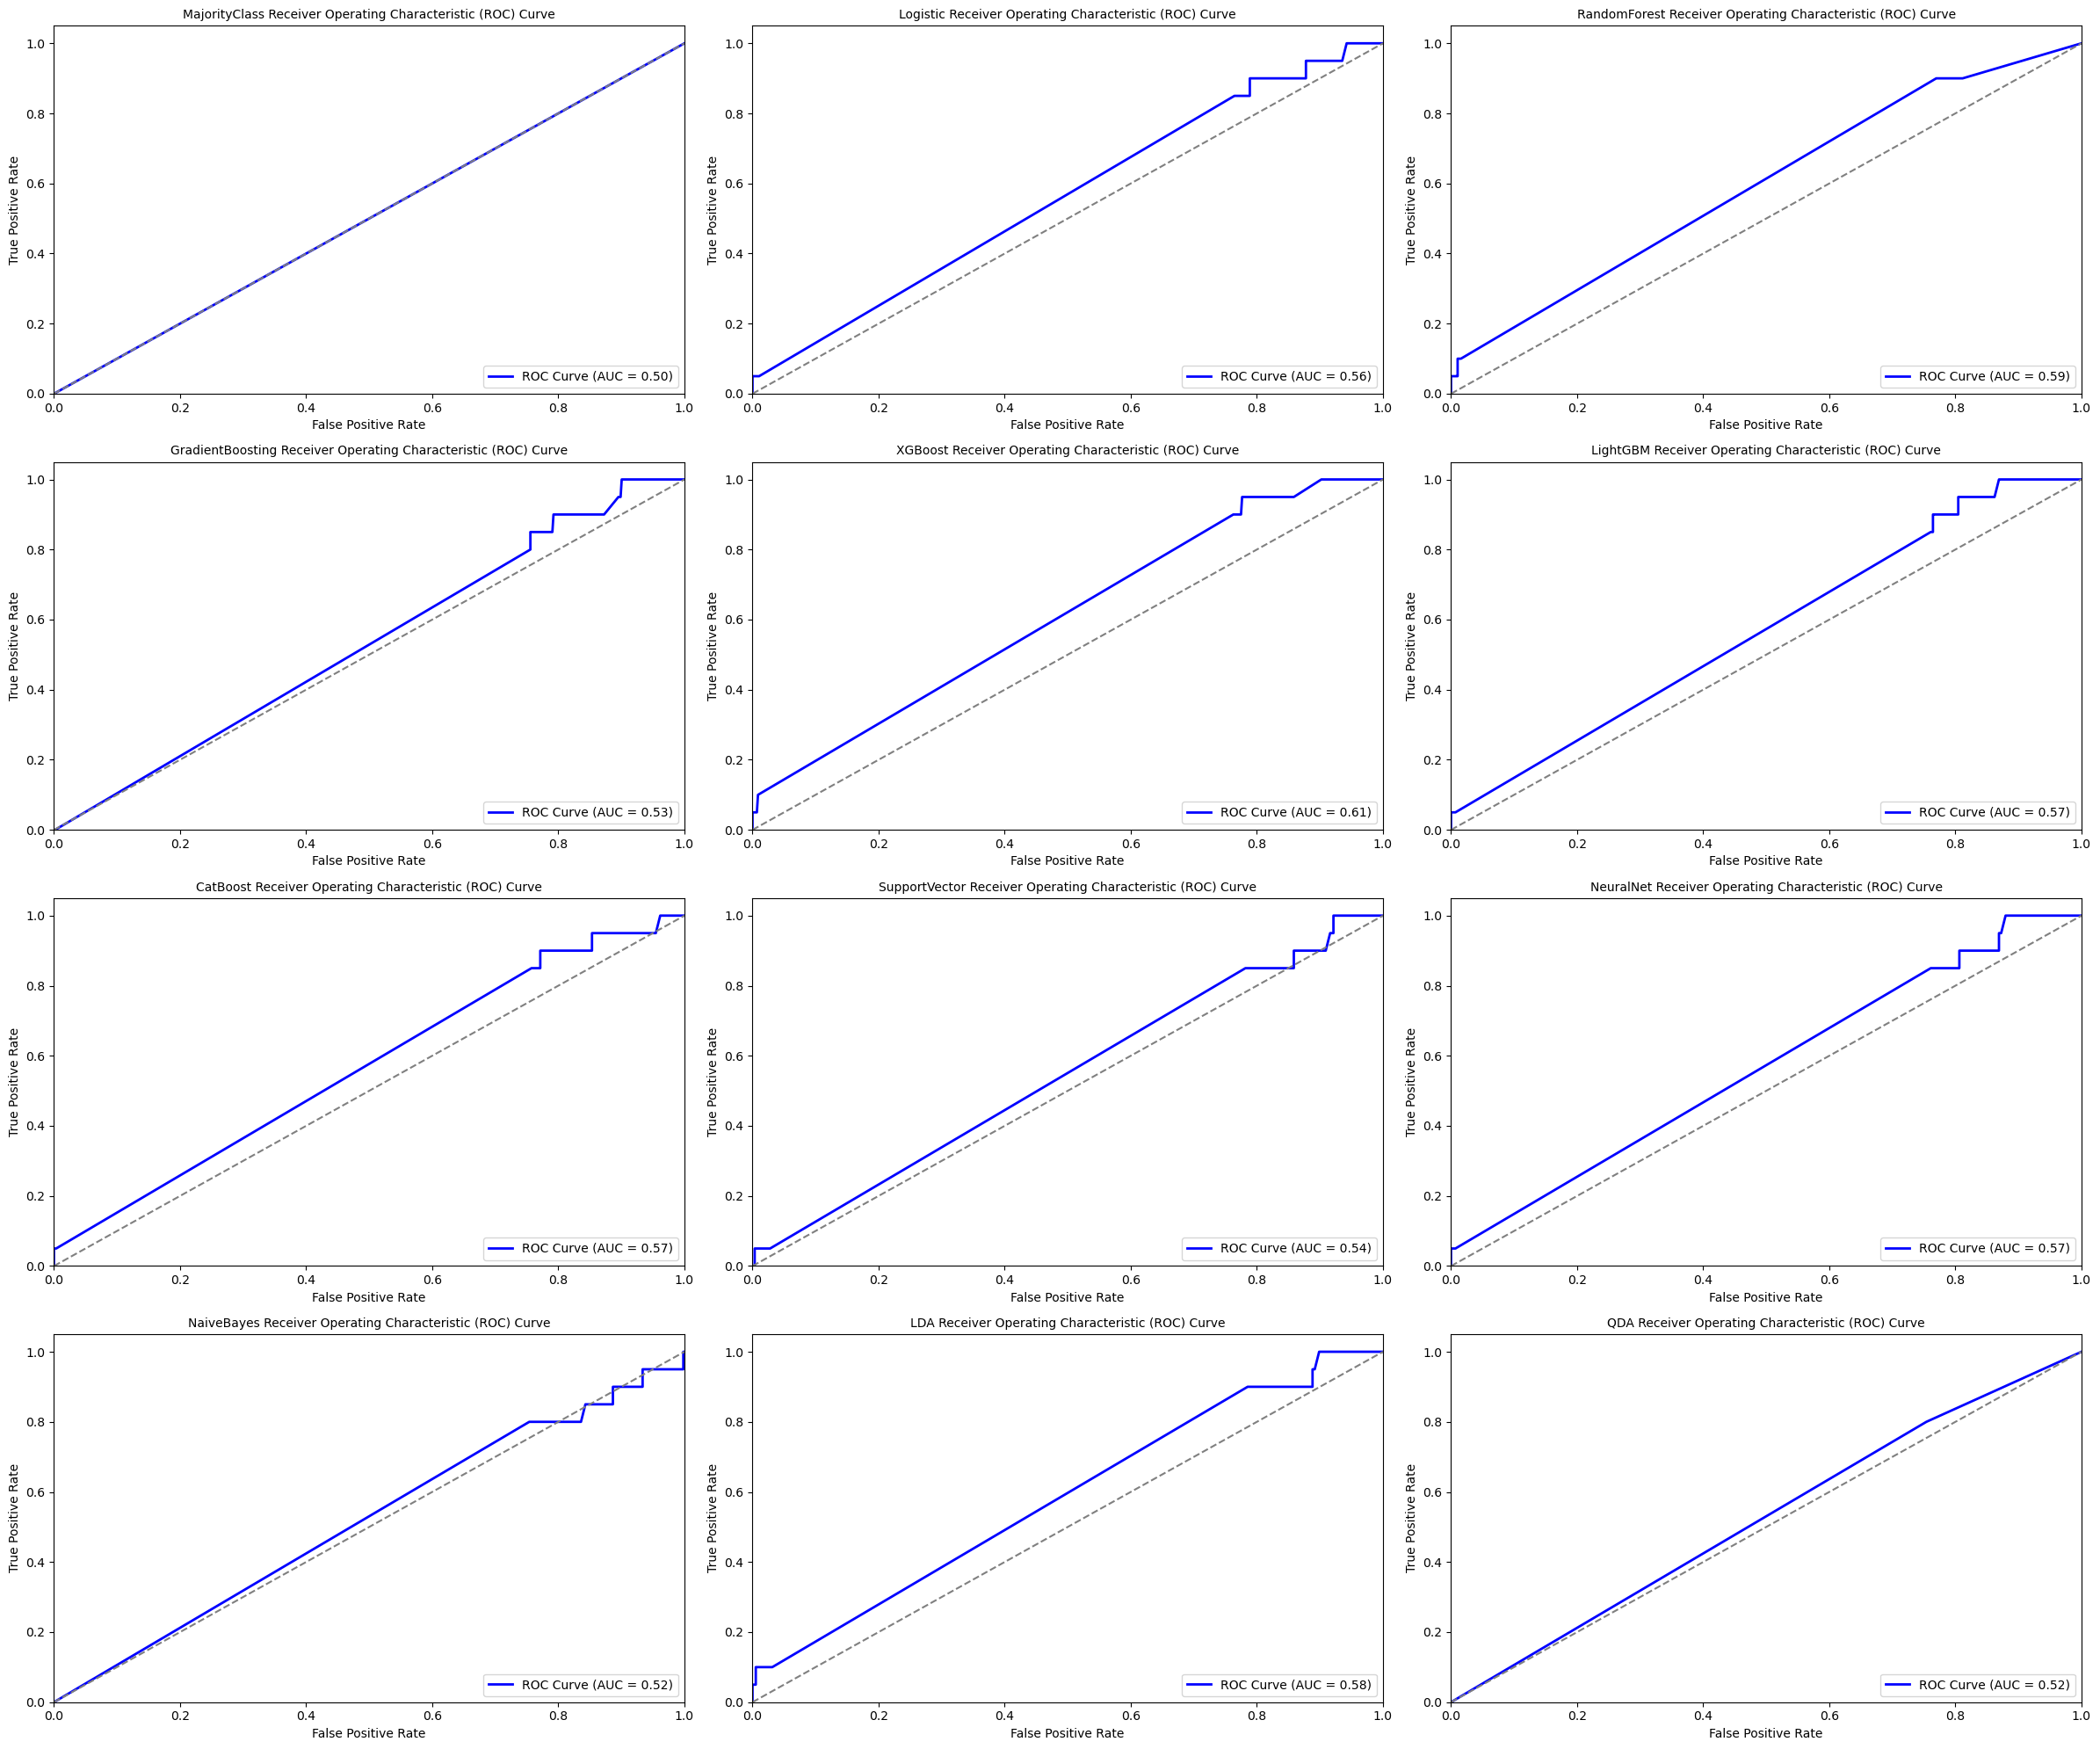

Model Name  2023 Accuracy  ROC AUC Score
4            XGBoost       0.967960       0.608246
2       RandomForest       0.967960       0.594764
10               LDA       0.962901       0.583857
5           LightGBM       0.967960       0.571117
6           CatBoost       0.967960       0.566492
8          NeuralNet       0.967960       0.565271
1           Logistic       0.966273       0.559773
7      SupportVector       0.966273       0.541274
3   GradientBoosting       0.964587       0.530497
11               QDA       0.264755       0.523037
9         NaiveBayes       0.264755       0.515532
0      MajorityClass       0.966273       0.500000

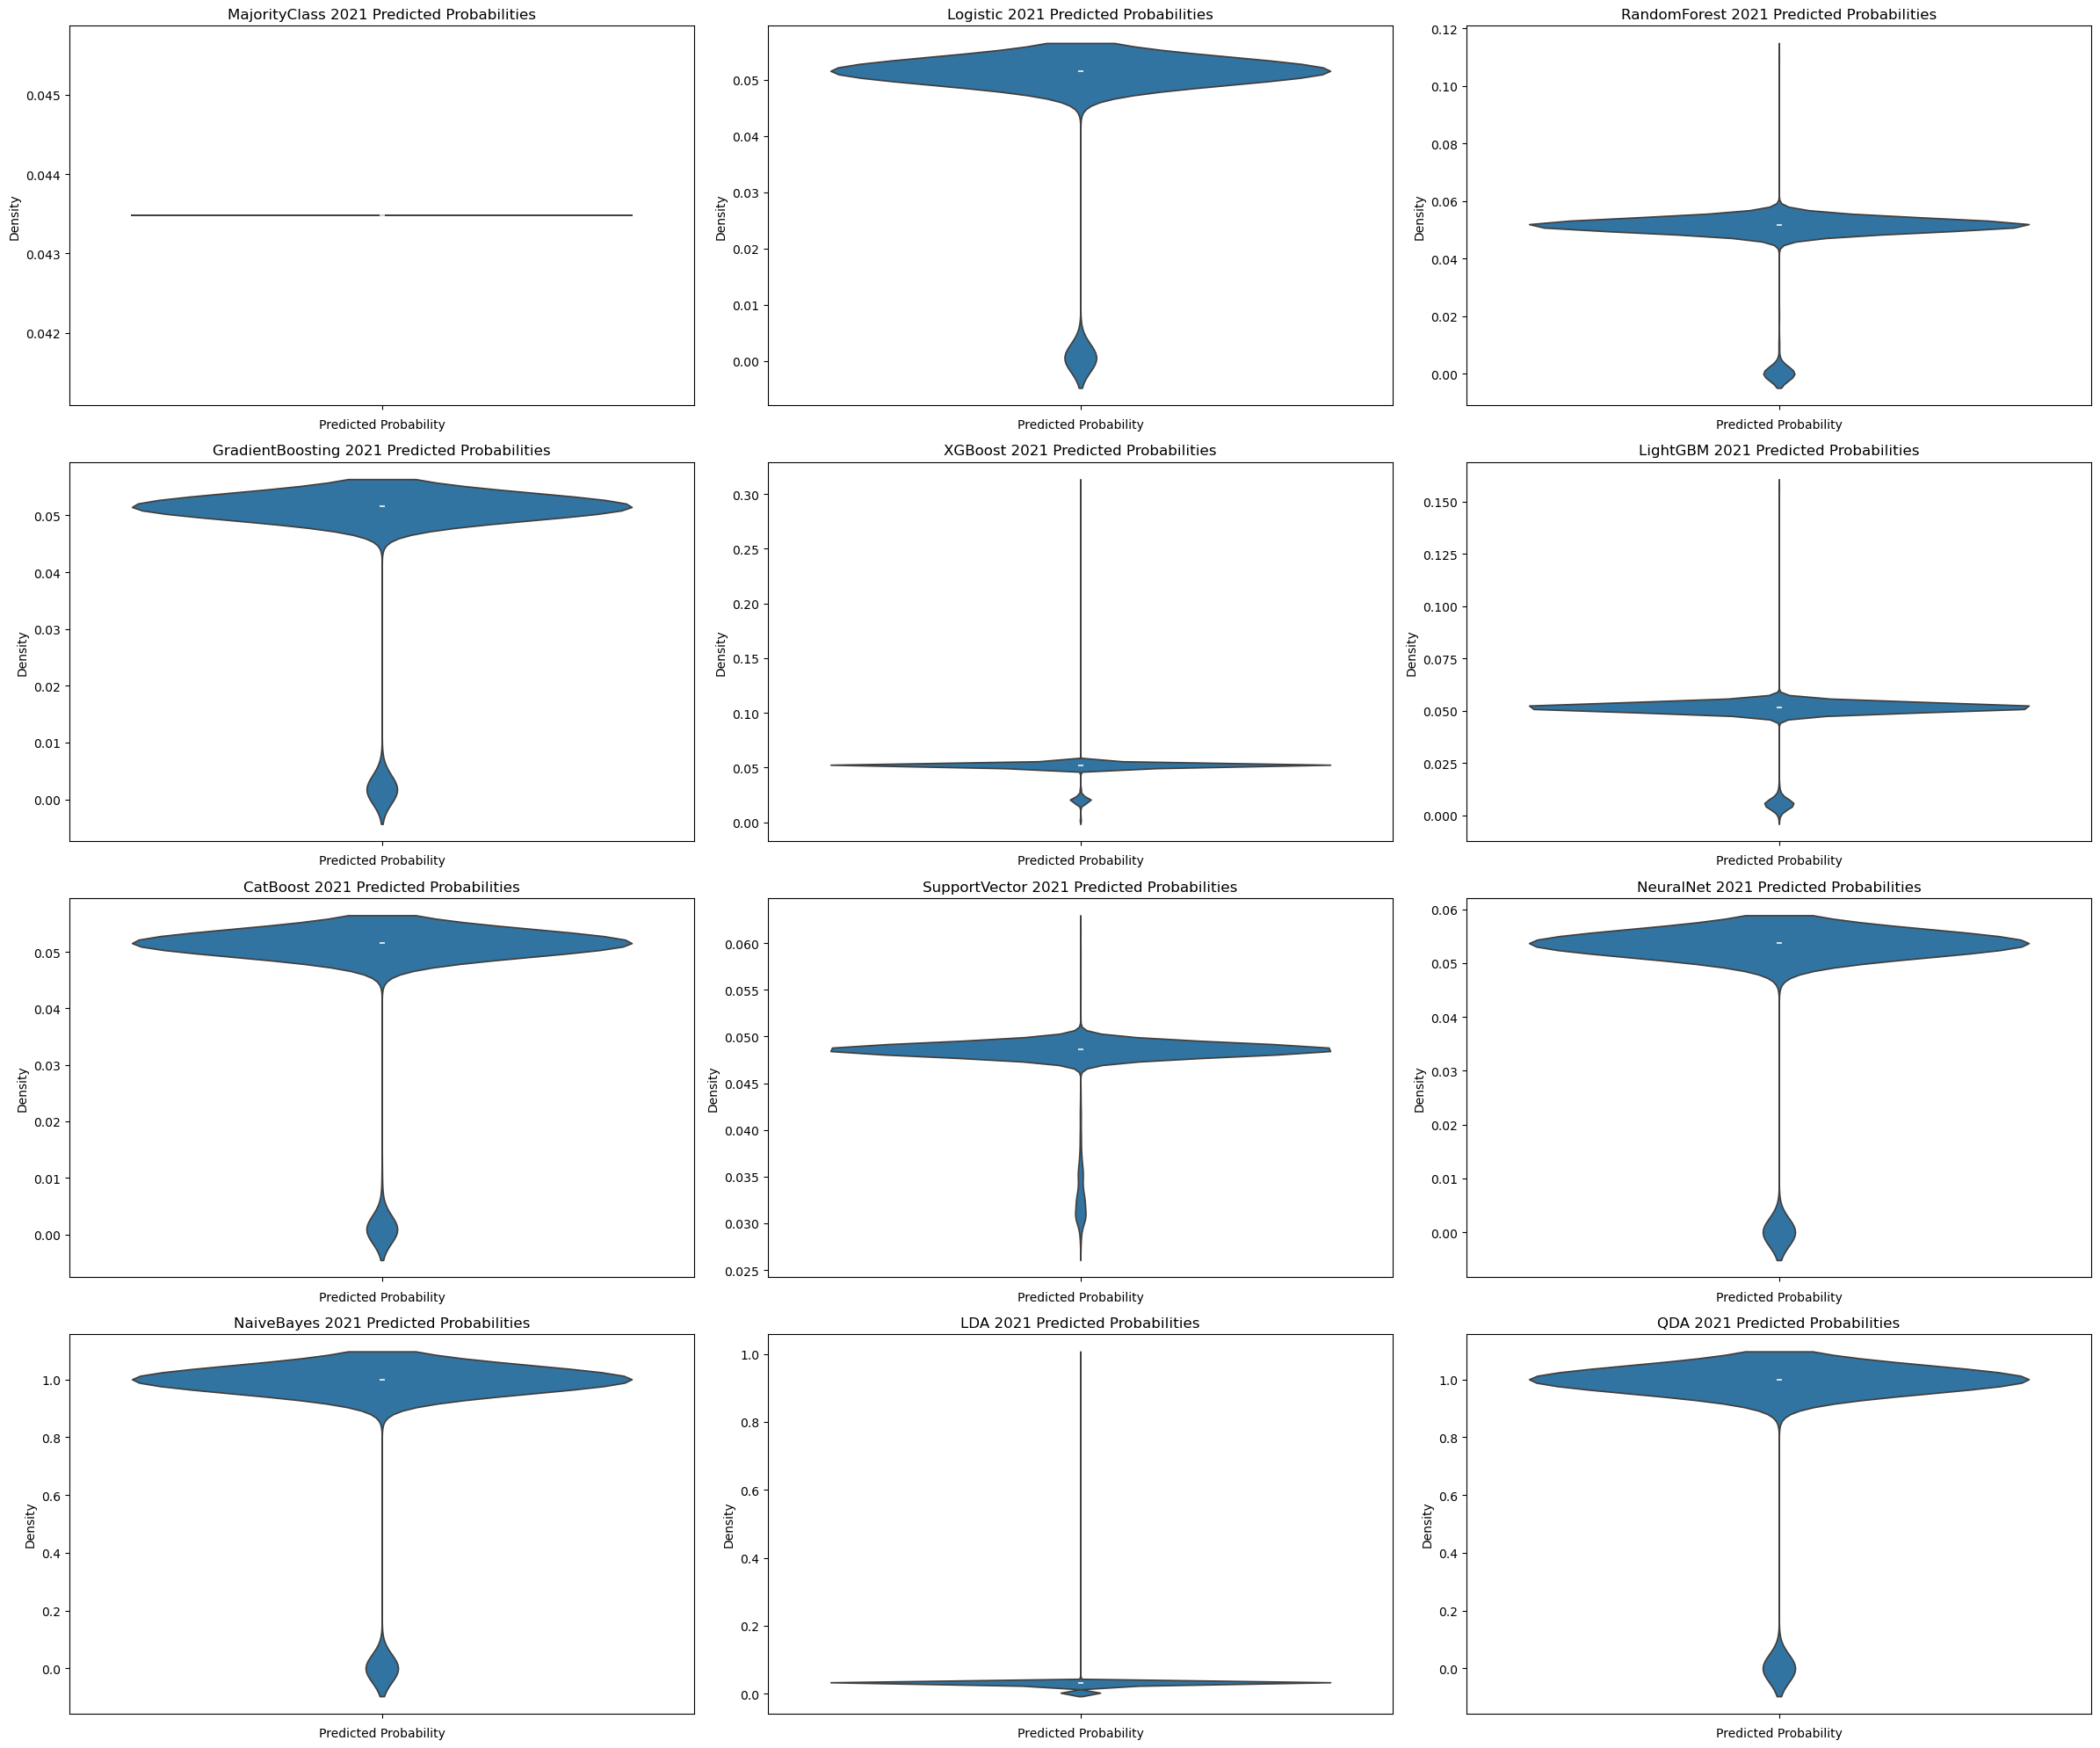

Omitting ['INV.INT.SUB.Alcohol.Past30', 'INV.INT.SUB.Cannabis.Past30', 'INV.INT.SUB.Cigarettes.Past30', 'INV.INT.SUB.Cigars.Past30', 'INV.INT.SUB.Smokeless.Past30', 'INV.INT.SUB.Vapes.Past30', 'INV.LGL.SUB.Alcohol.Life', 'INV.LGL.SUB.Cannabis.Life', 'INV.LGL.SUB.Cigarettes.Life', 'INV.LGL.SUB.Cigars.Life', 'INV.LGL.SUB.Smokeless.Life', 'INV.LGL.SUB.Vapes.Life']

Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Predicted probabilities for 2021 Suicide Questions:
[0.04347826 0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]



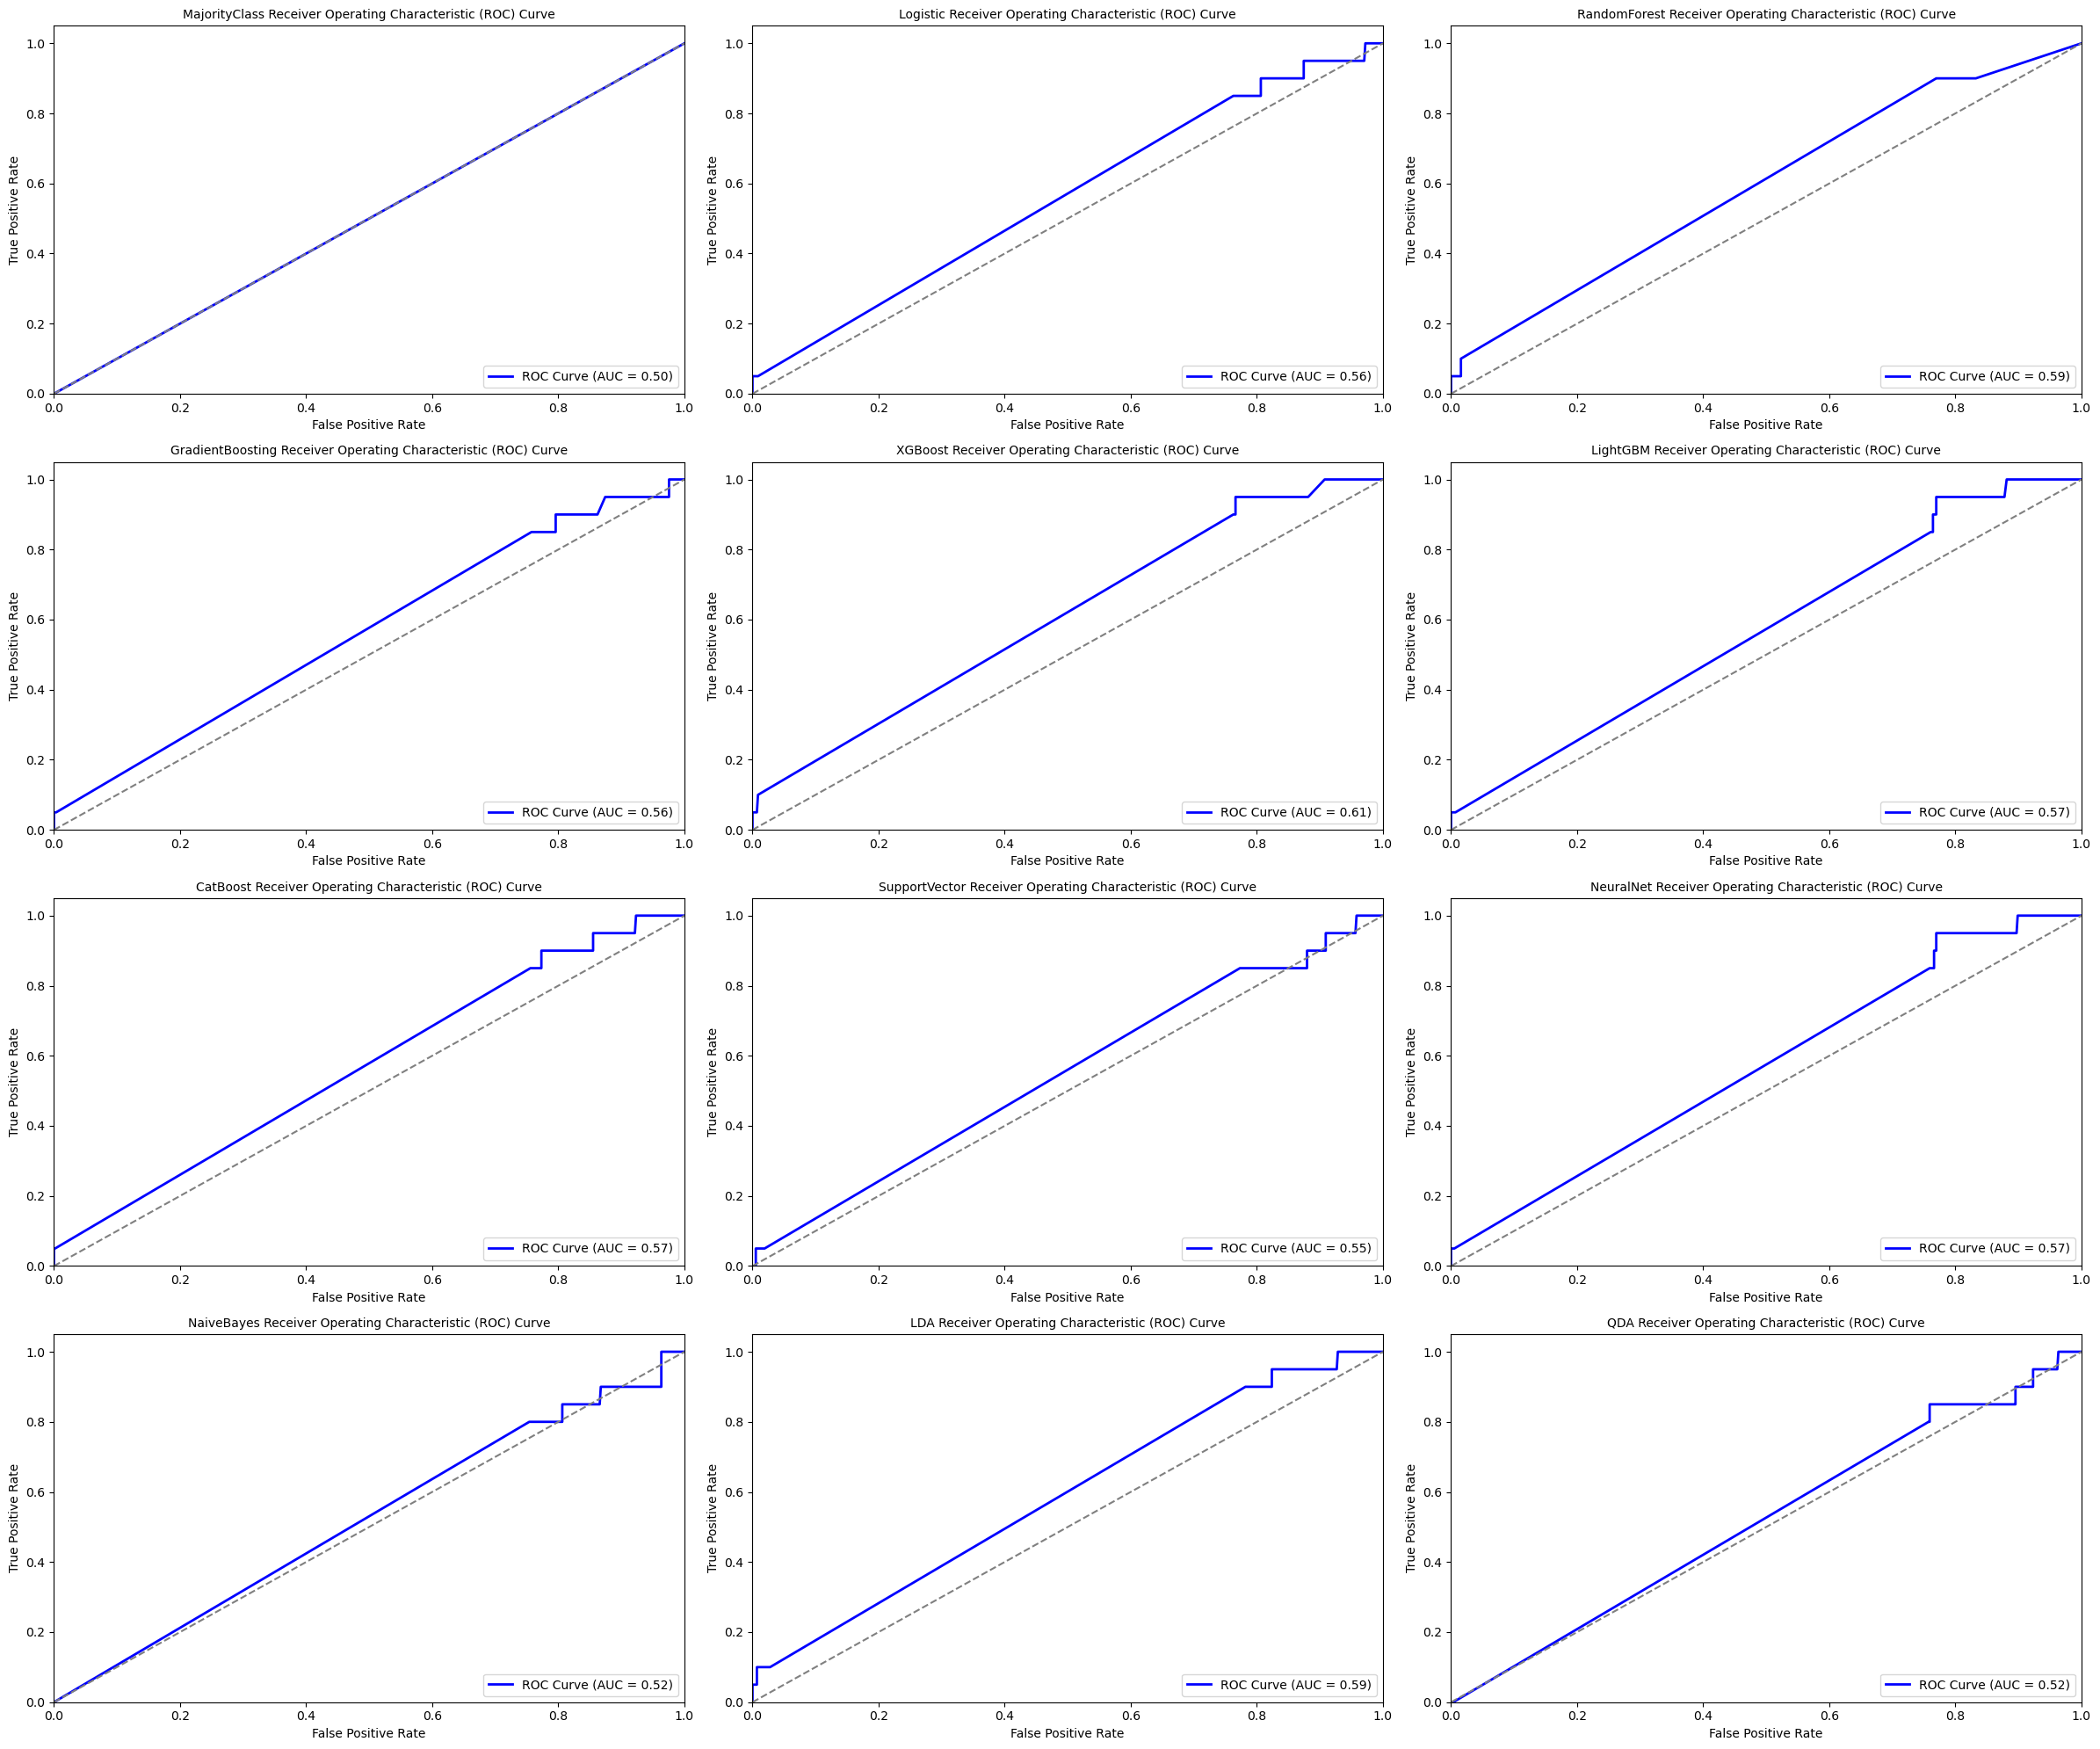

Model Name  2023 Accuracy  ROC AUC Score
4            XGBoost       0.967960       0.608028
2       RandomForest       0.967960       0.593455
10               LDA       0.962901       0.588176
8          NeuralNet       0.967960       0.572557
5           LightGBM       0.967960       0.572164
6           CatBoost       0.967960       0.569503
3   GradientBoosting       0.966273       0.563656
1           Logistic       0.966273       0.558857
7      SupportVector       0.966273       0.545506
11               QDA       0.261383       0.518630
9         NaiveBayes       0.264755       0.518455
0      MajorityClass       0.966273       0.500000

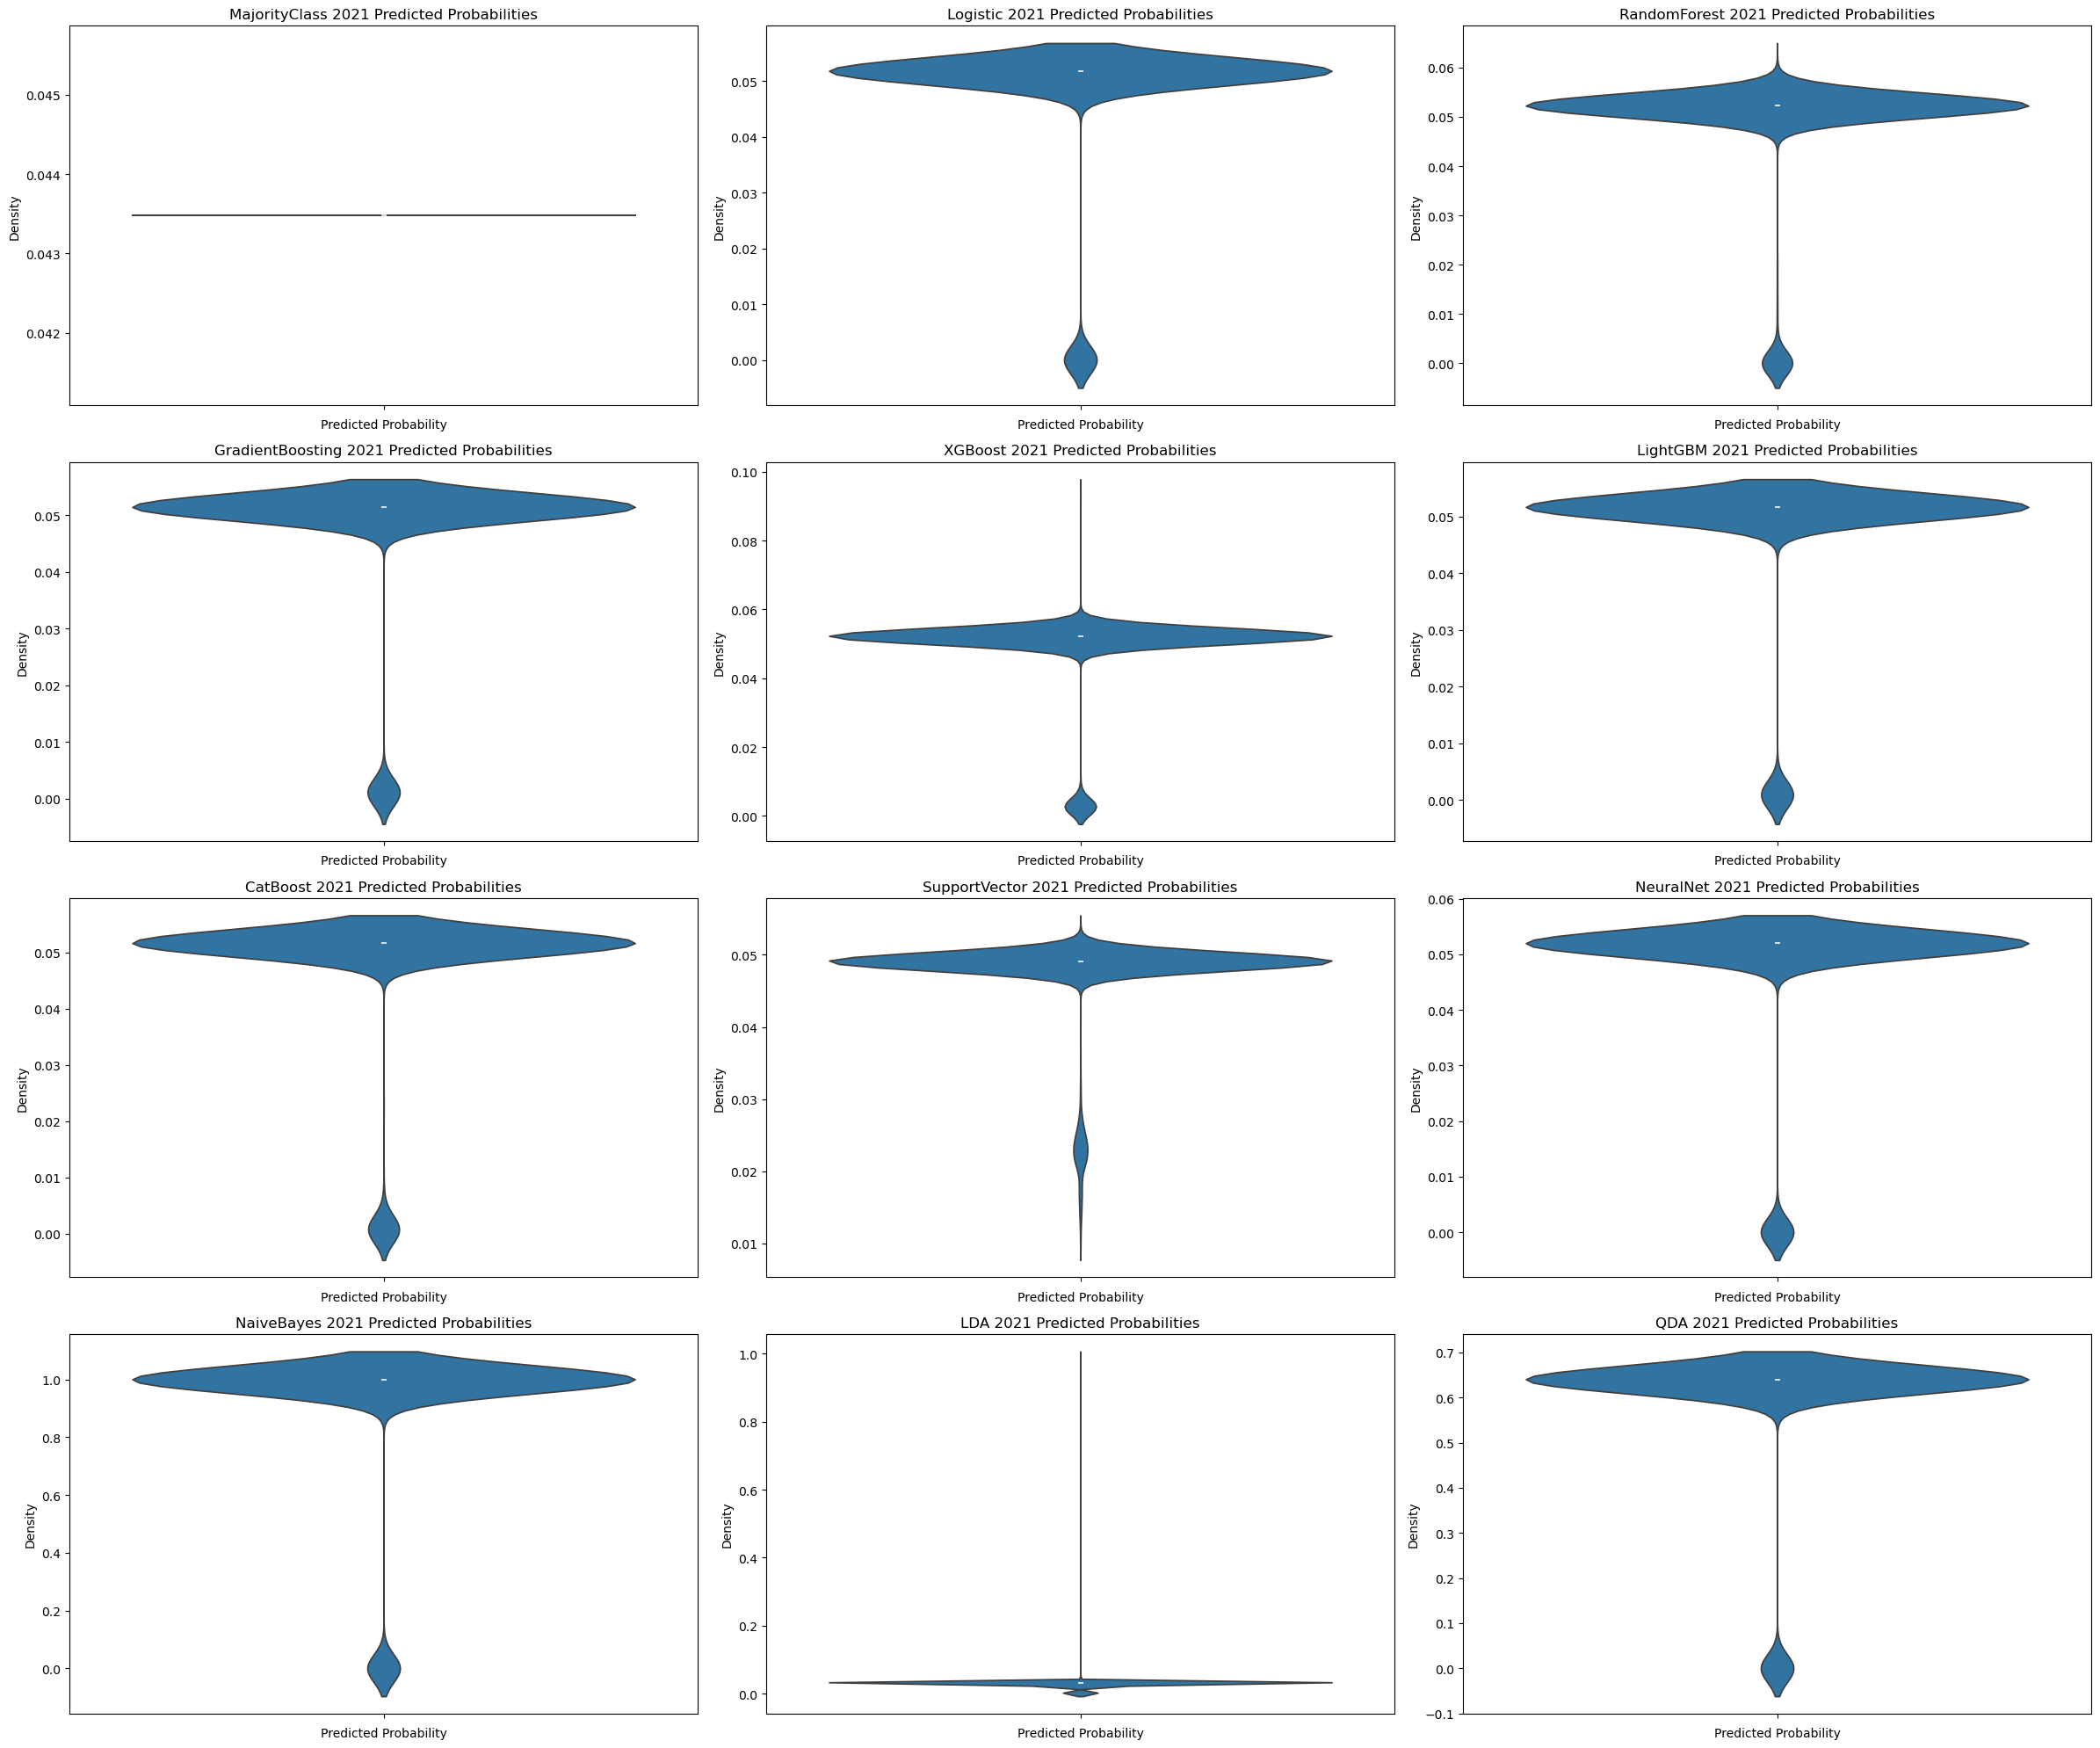

Omitting ['SBJ.FCT.Ethnicity', 'SBJ.FCT.GenderId', 'SBJ.FCT.Sex', 'SBJ.FCT.Sexuality', 'SBJ.LGL.Race.AmericanIndianAlaskaNative', 'SBJ.LGL.Race.Asian', 'SBJ.LGL.Race.HaitianBlackAfricanAmerican', 'SBJ.LGL.Race.HawaiianPacificIslander', 'SBJ.LGL.Race.MiddleEasternNorthAfrican', 'SBJ.LGL.Race.Multiple', 'SBJ.LGL.Race.White']

Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Predicted probabilities for 2021 Suicide Questions:
[0.04347826 0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]

Tuning Logistic...
Best Hyperparameters

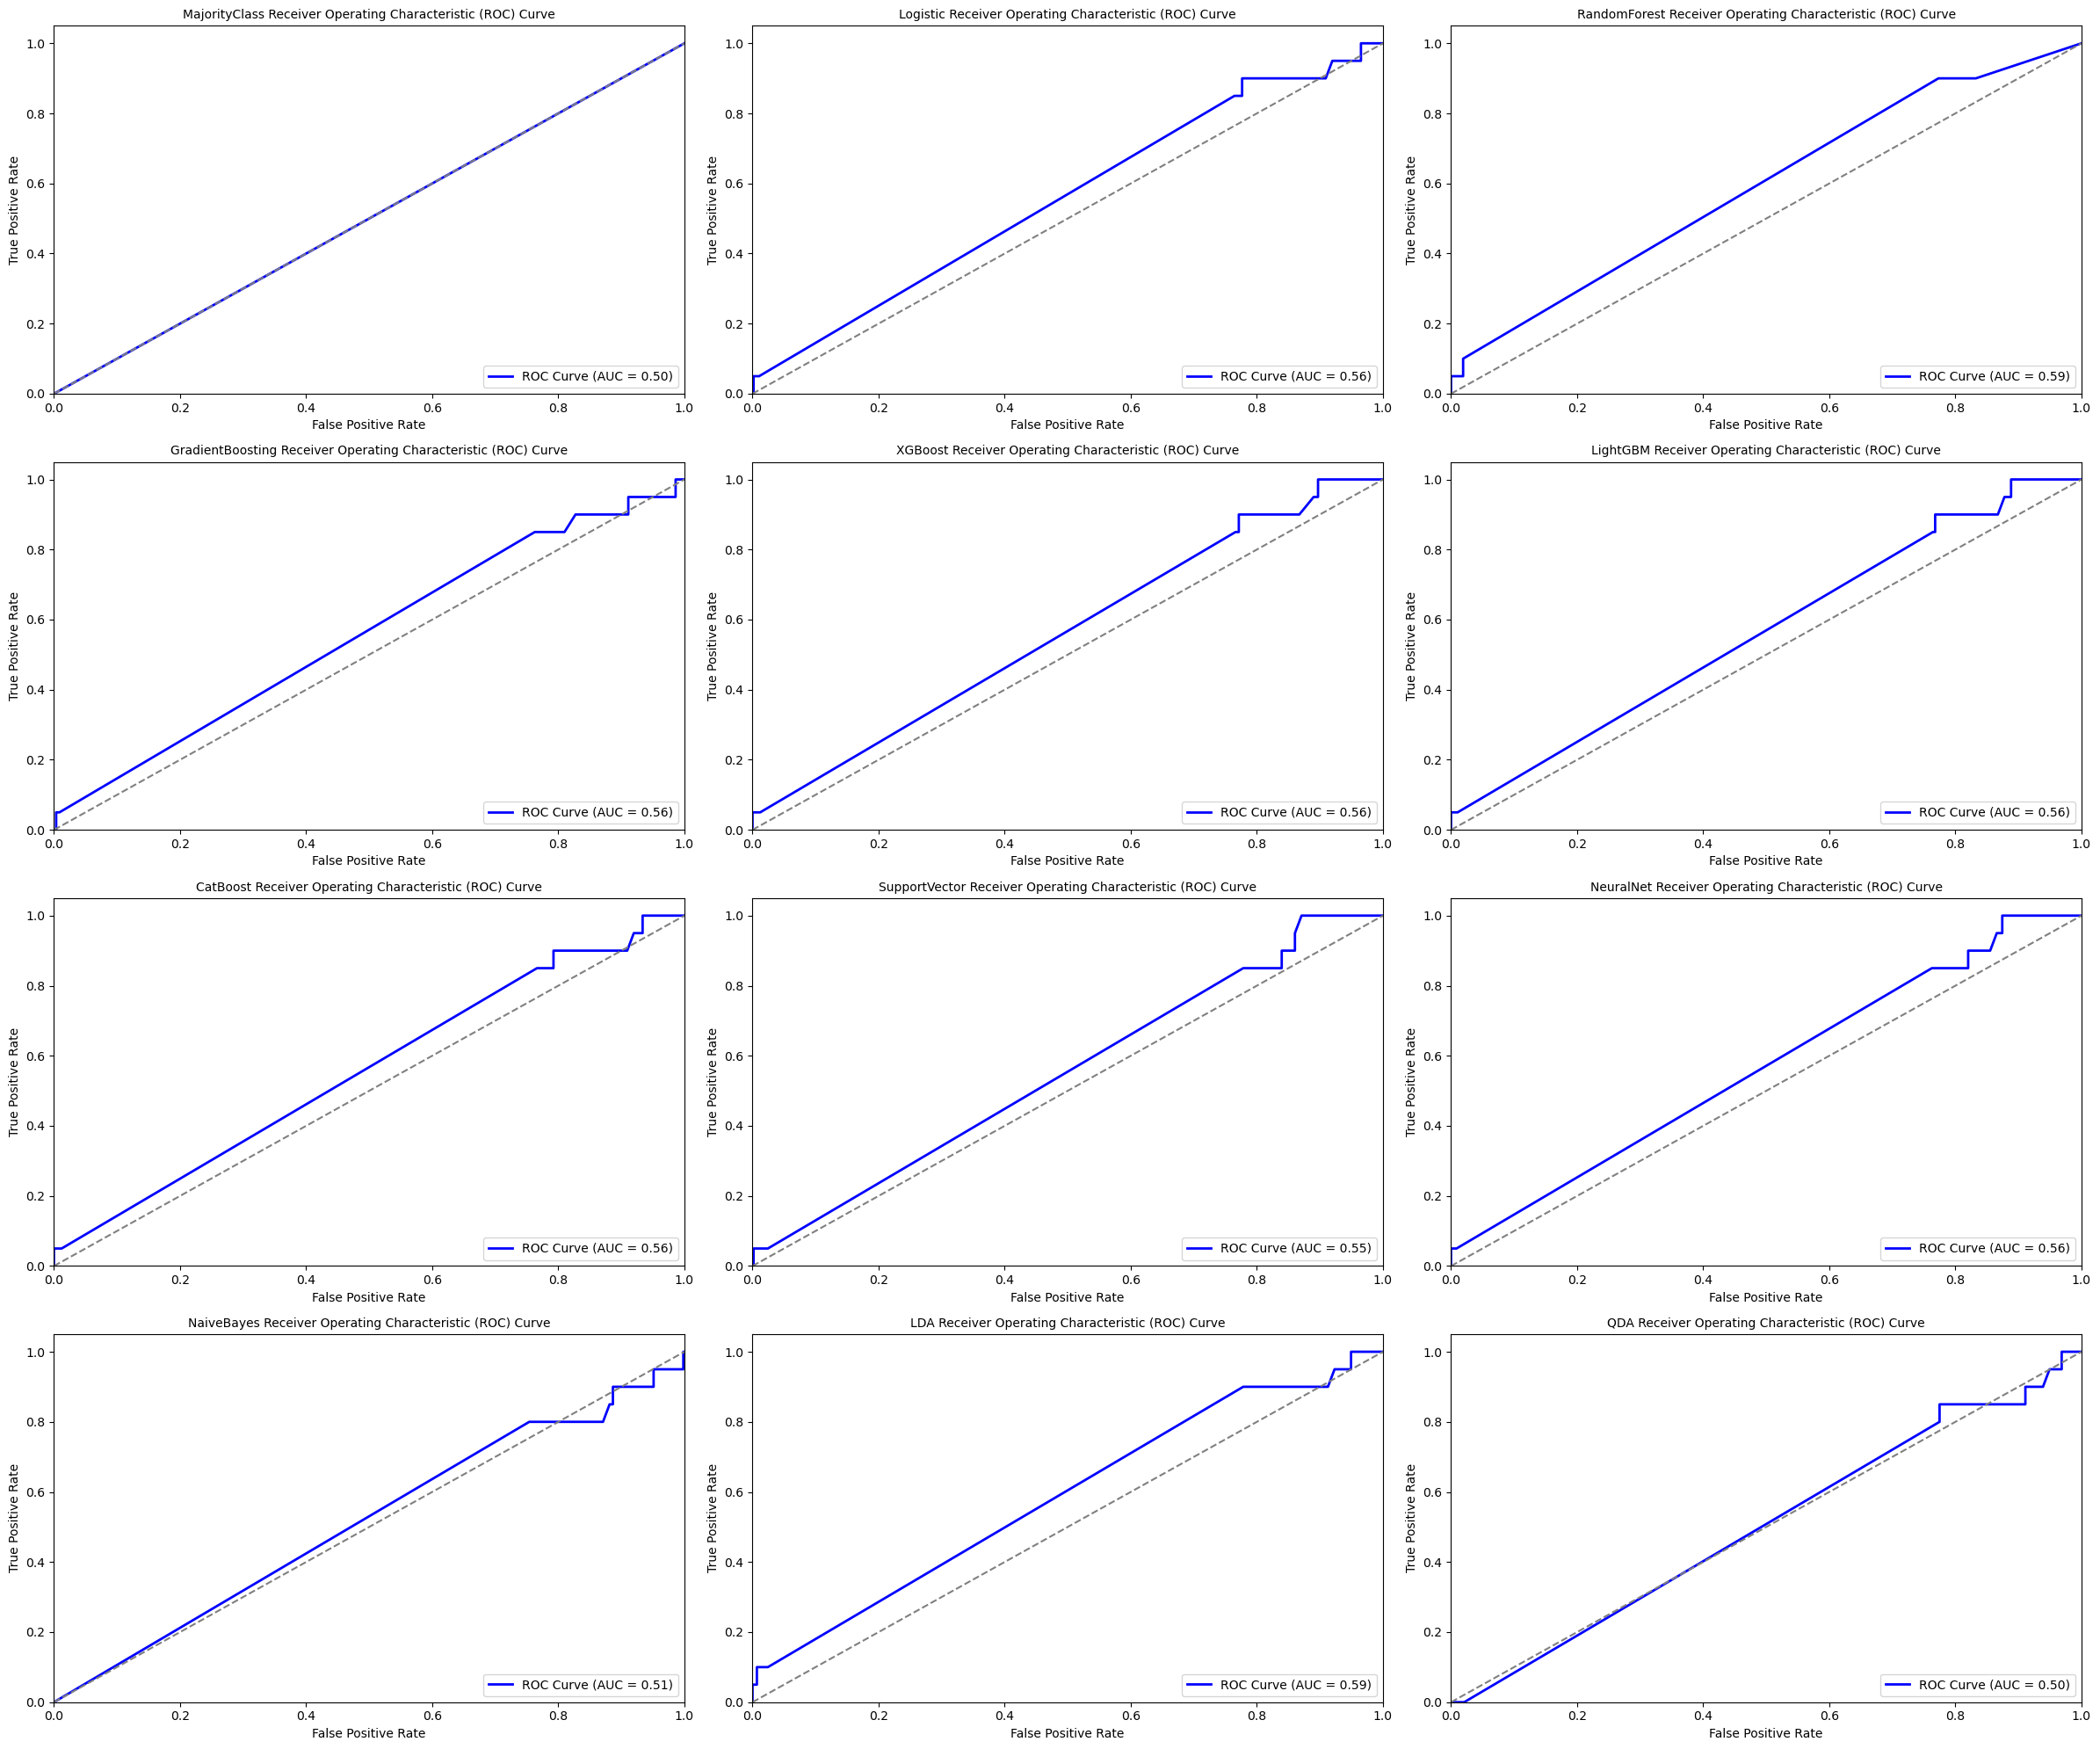

Model Name  2023 Accuracy  ROC AUC Score
2       RandomForest       0.967960       0.590489
10               LDA       0.961214       0.585166
8          NeuralNet       0.967960       0.563700
5           LightGBM       0.967960       0.563613
4            XGBoost       0.967960       0.561300
1           Logistic       0.966273       0.557155
6           CatBoost       0.967960       0.556632
3   GradientBoosting       0.964587       0.555497
7      SupportVector       0.966273       0.550524
9         NaiveBayes       0.264755       0.512827
11               QDA       0.957841       0.501745
0      MajorityClass       0.966273       0.500000

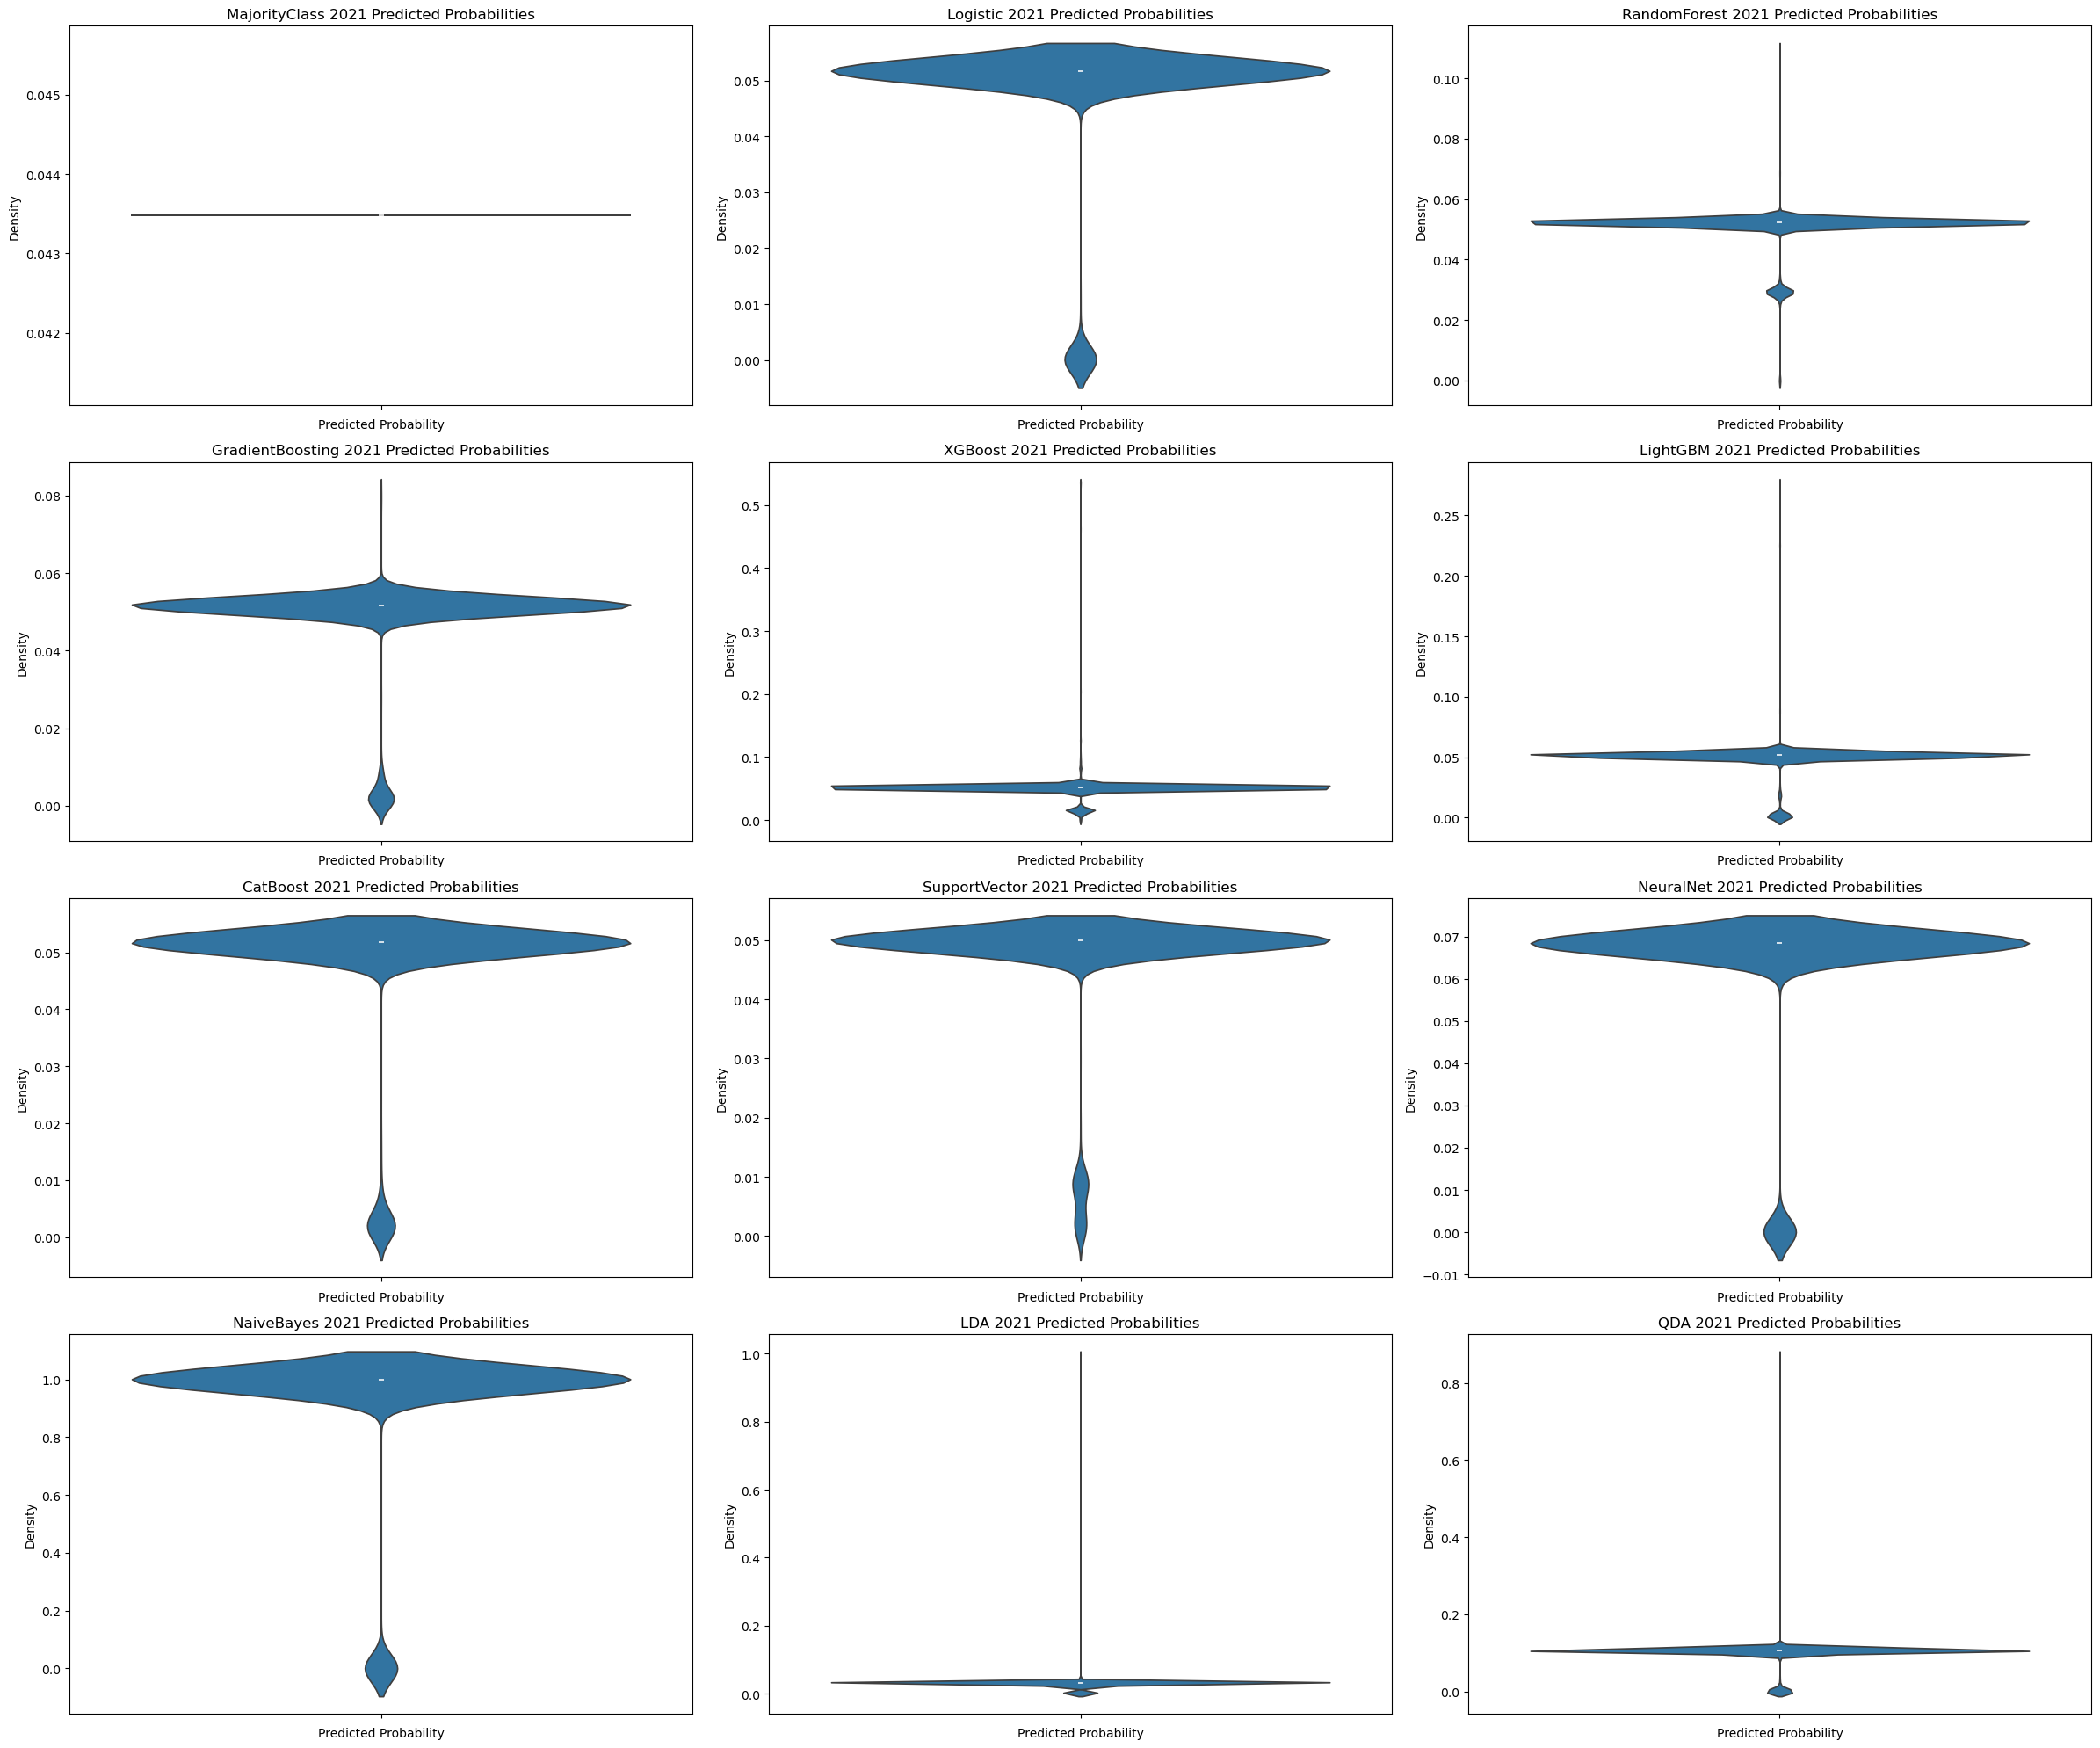

Omitting ['INV.LGL.HelpSeeking0', 'INV.LGL.HelpSeeking1', 'INV.LGL.HelpSeeking10', 'INV.LGL.HelpSeeking11', 'INV.LGL.HelpSeeking12', 'INV.LGL.HelpSeeking13', 'INV.LGL.HelpSeeking2', 'INV.LGL.HelpSeeking3', 'INV.LGL.HelpSeeking4', 'INV.LGL.HelpSeeking5', 'INV.LGL.HelpSeeking6', 'INV.LGL.HelpSeeking7', 'INV.LGL.HelpSeeking8', 'INV.LGL.HelpSeeking9']

Tuning MajorityClass...
Best Hyperparameters: {}
Accuracy for 2023 Predictions: 0.9662731871838112
ROC AUC Score for 2023 Predictions: 0.5
Classification Report for 2023 Predictions:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       573
         1.0       0.00      0.00      0.00        20

    accuracy                           0.97       593
   macro avg       0.48      0.50      0.49       593
weighted avg       0.93      0.97      0.95       593

Predicted probabilities for 2021 Suicide Questions:
[0.04347826 0.04347826 0.04347826 ... 0.04347826 0.04347826 0.04347826]

Tuning Logisti

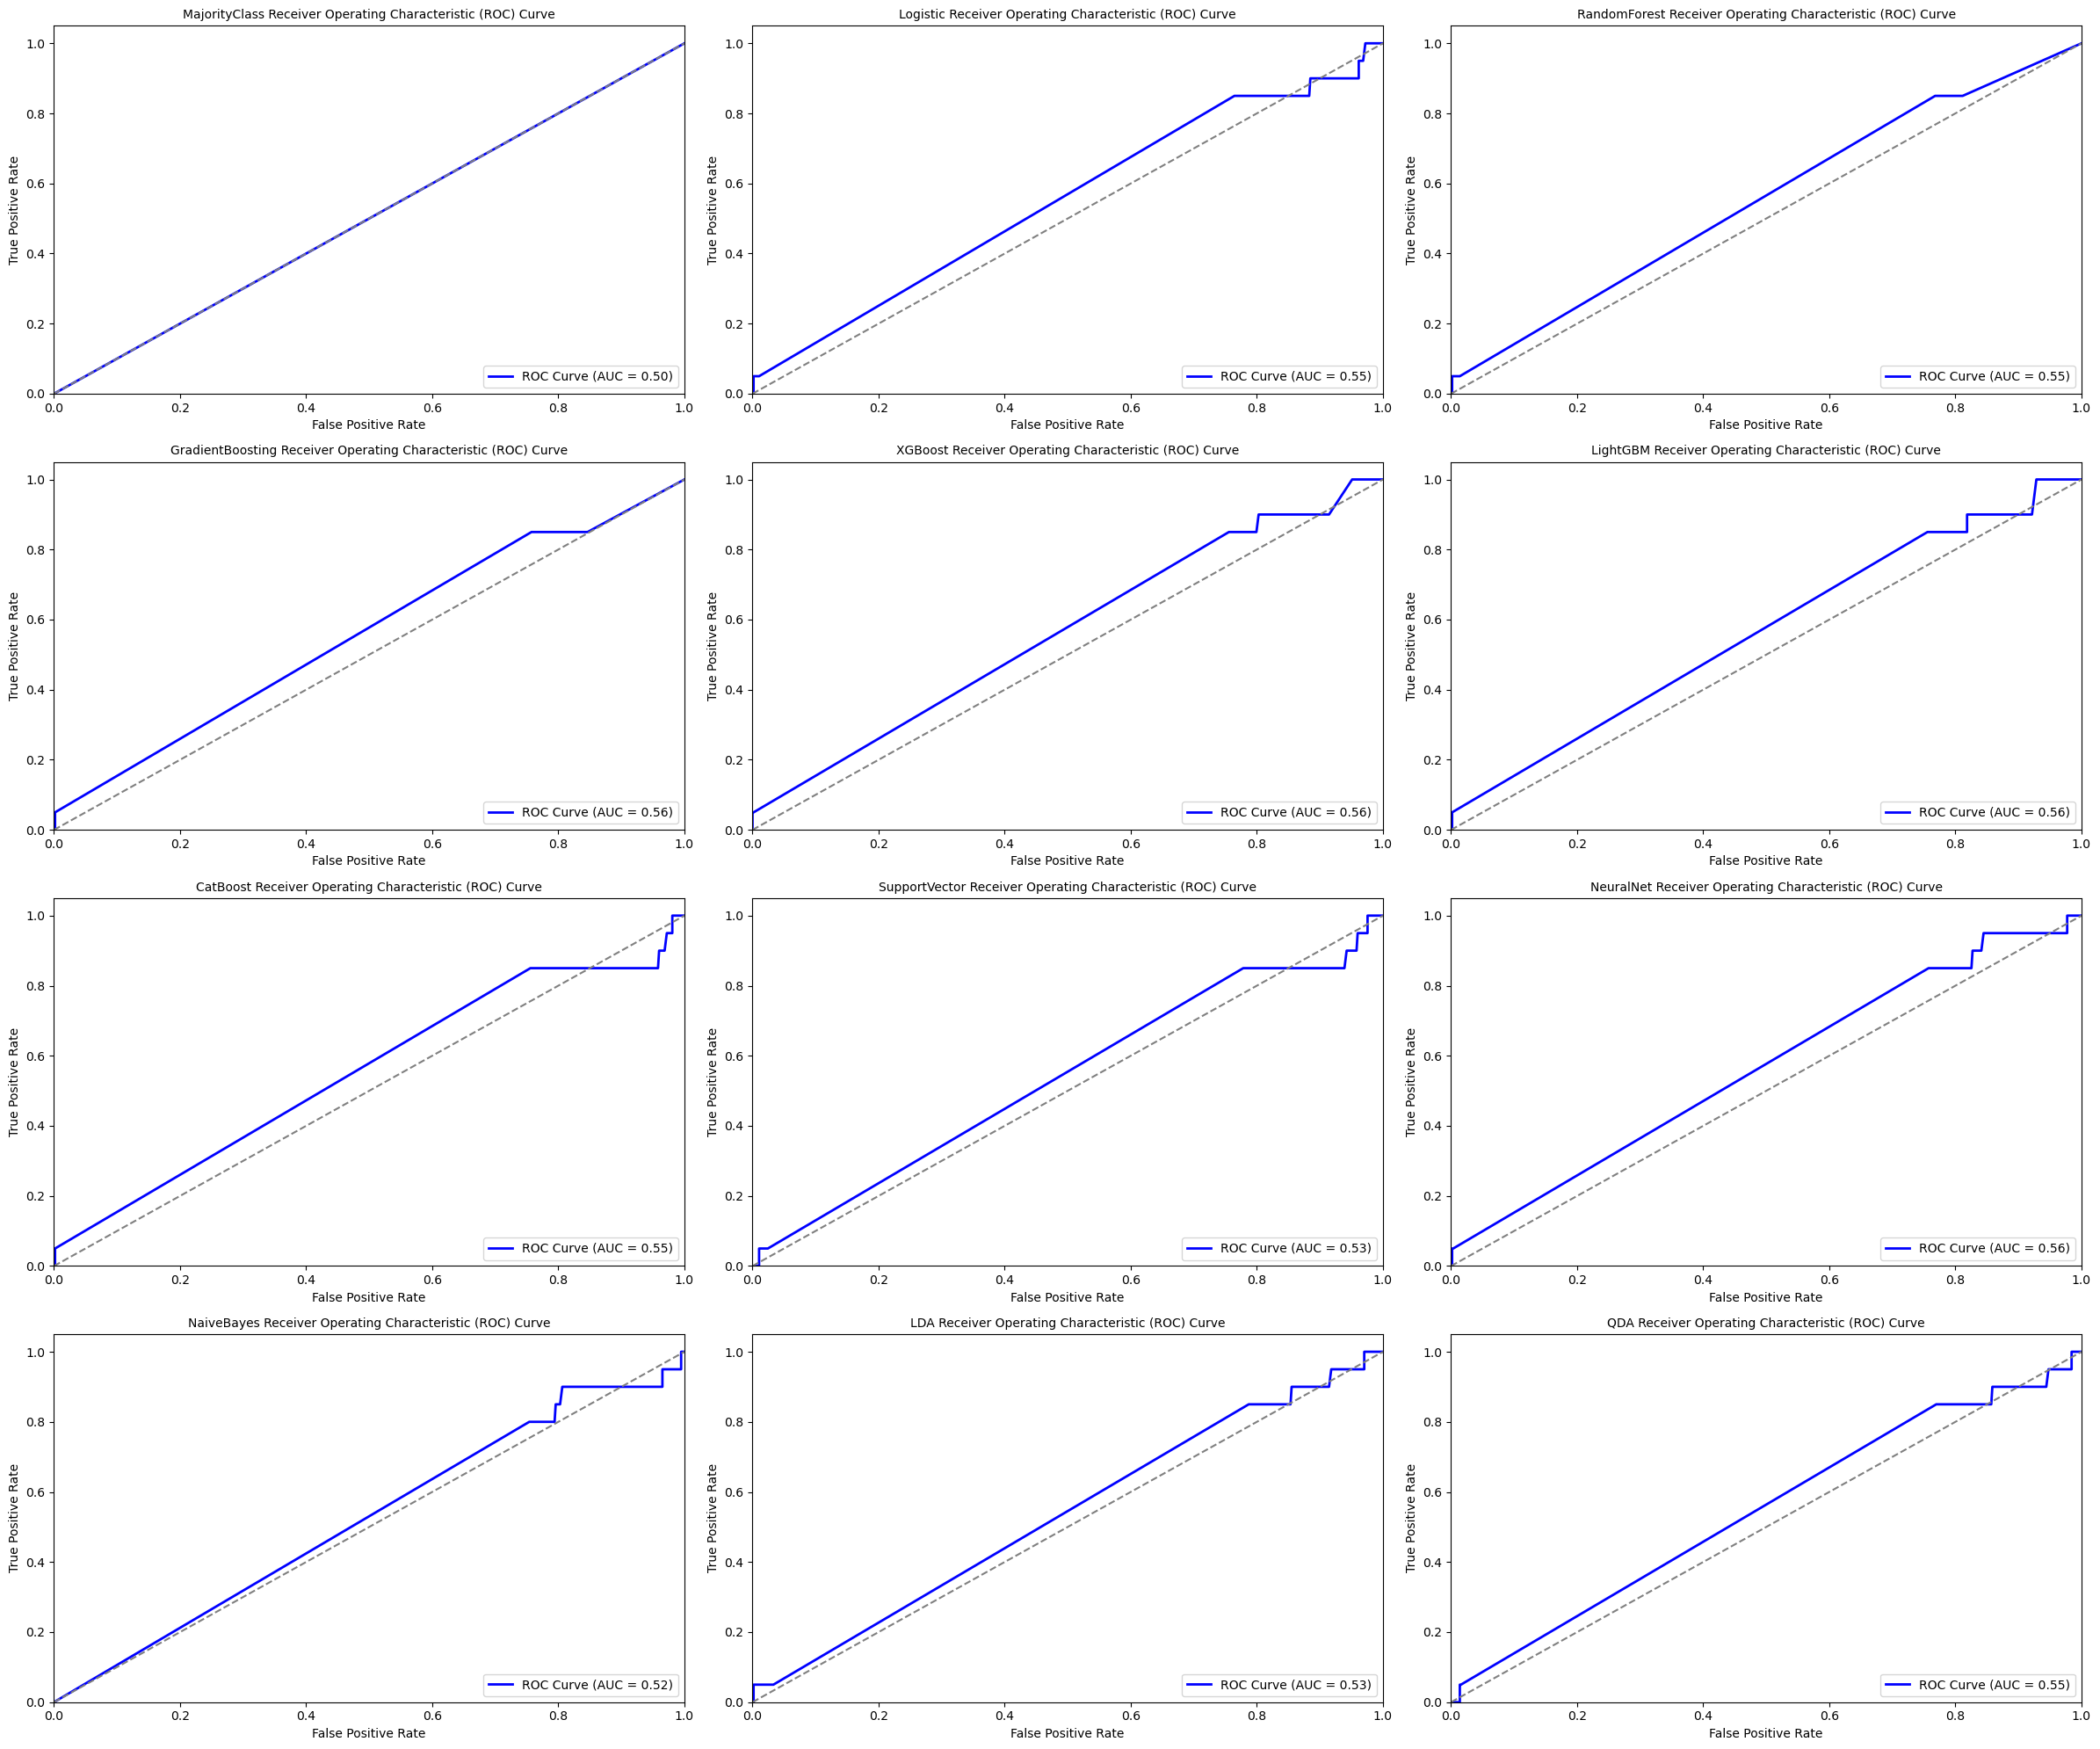

Model Name  2023 Accuracy  ROC AUC Score
4            XGBoost       0.966273       0.563700
5           LightGBM       0.966273       0.563525
8          NeuralNet       0.964587       0.563220
3   GradientBoosting       0.966273       0.557766
6           CatBoost       0.966273       0.551440
2       RandomForest       0.964587       0.551309
1           Logistic       0.964587       0.549171
11               QDA       0.957841       0.545768
10               LDA       0.964587       0.534773
7      SupportVector       0.966273       0.534599
9         NaiveBayes       0.264755       0.520462
0      MajorityClass       0.966273       0.500000

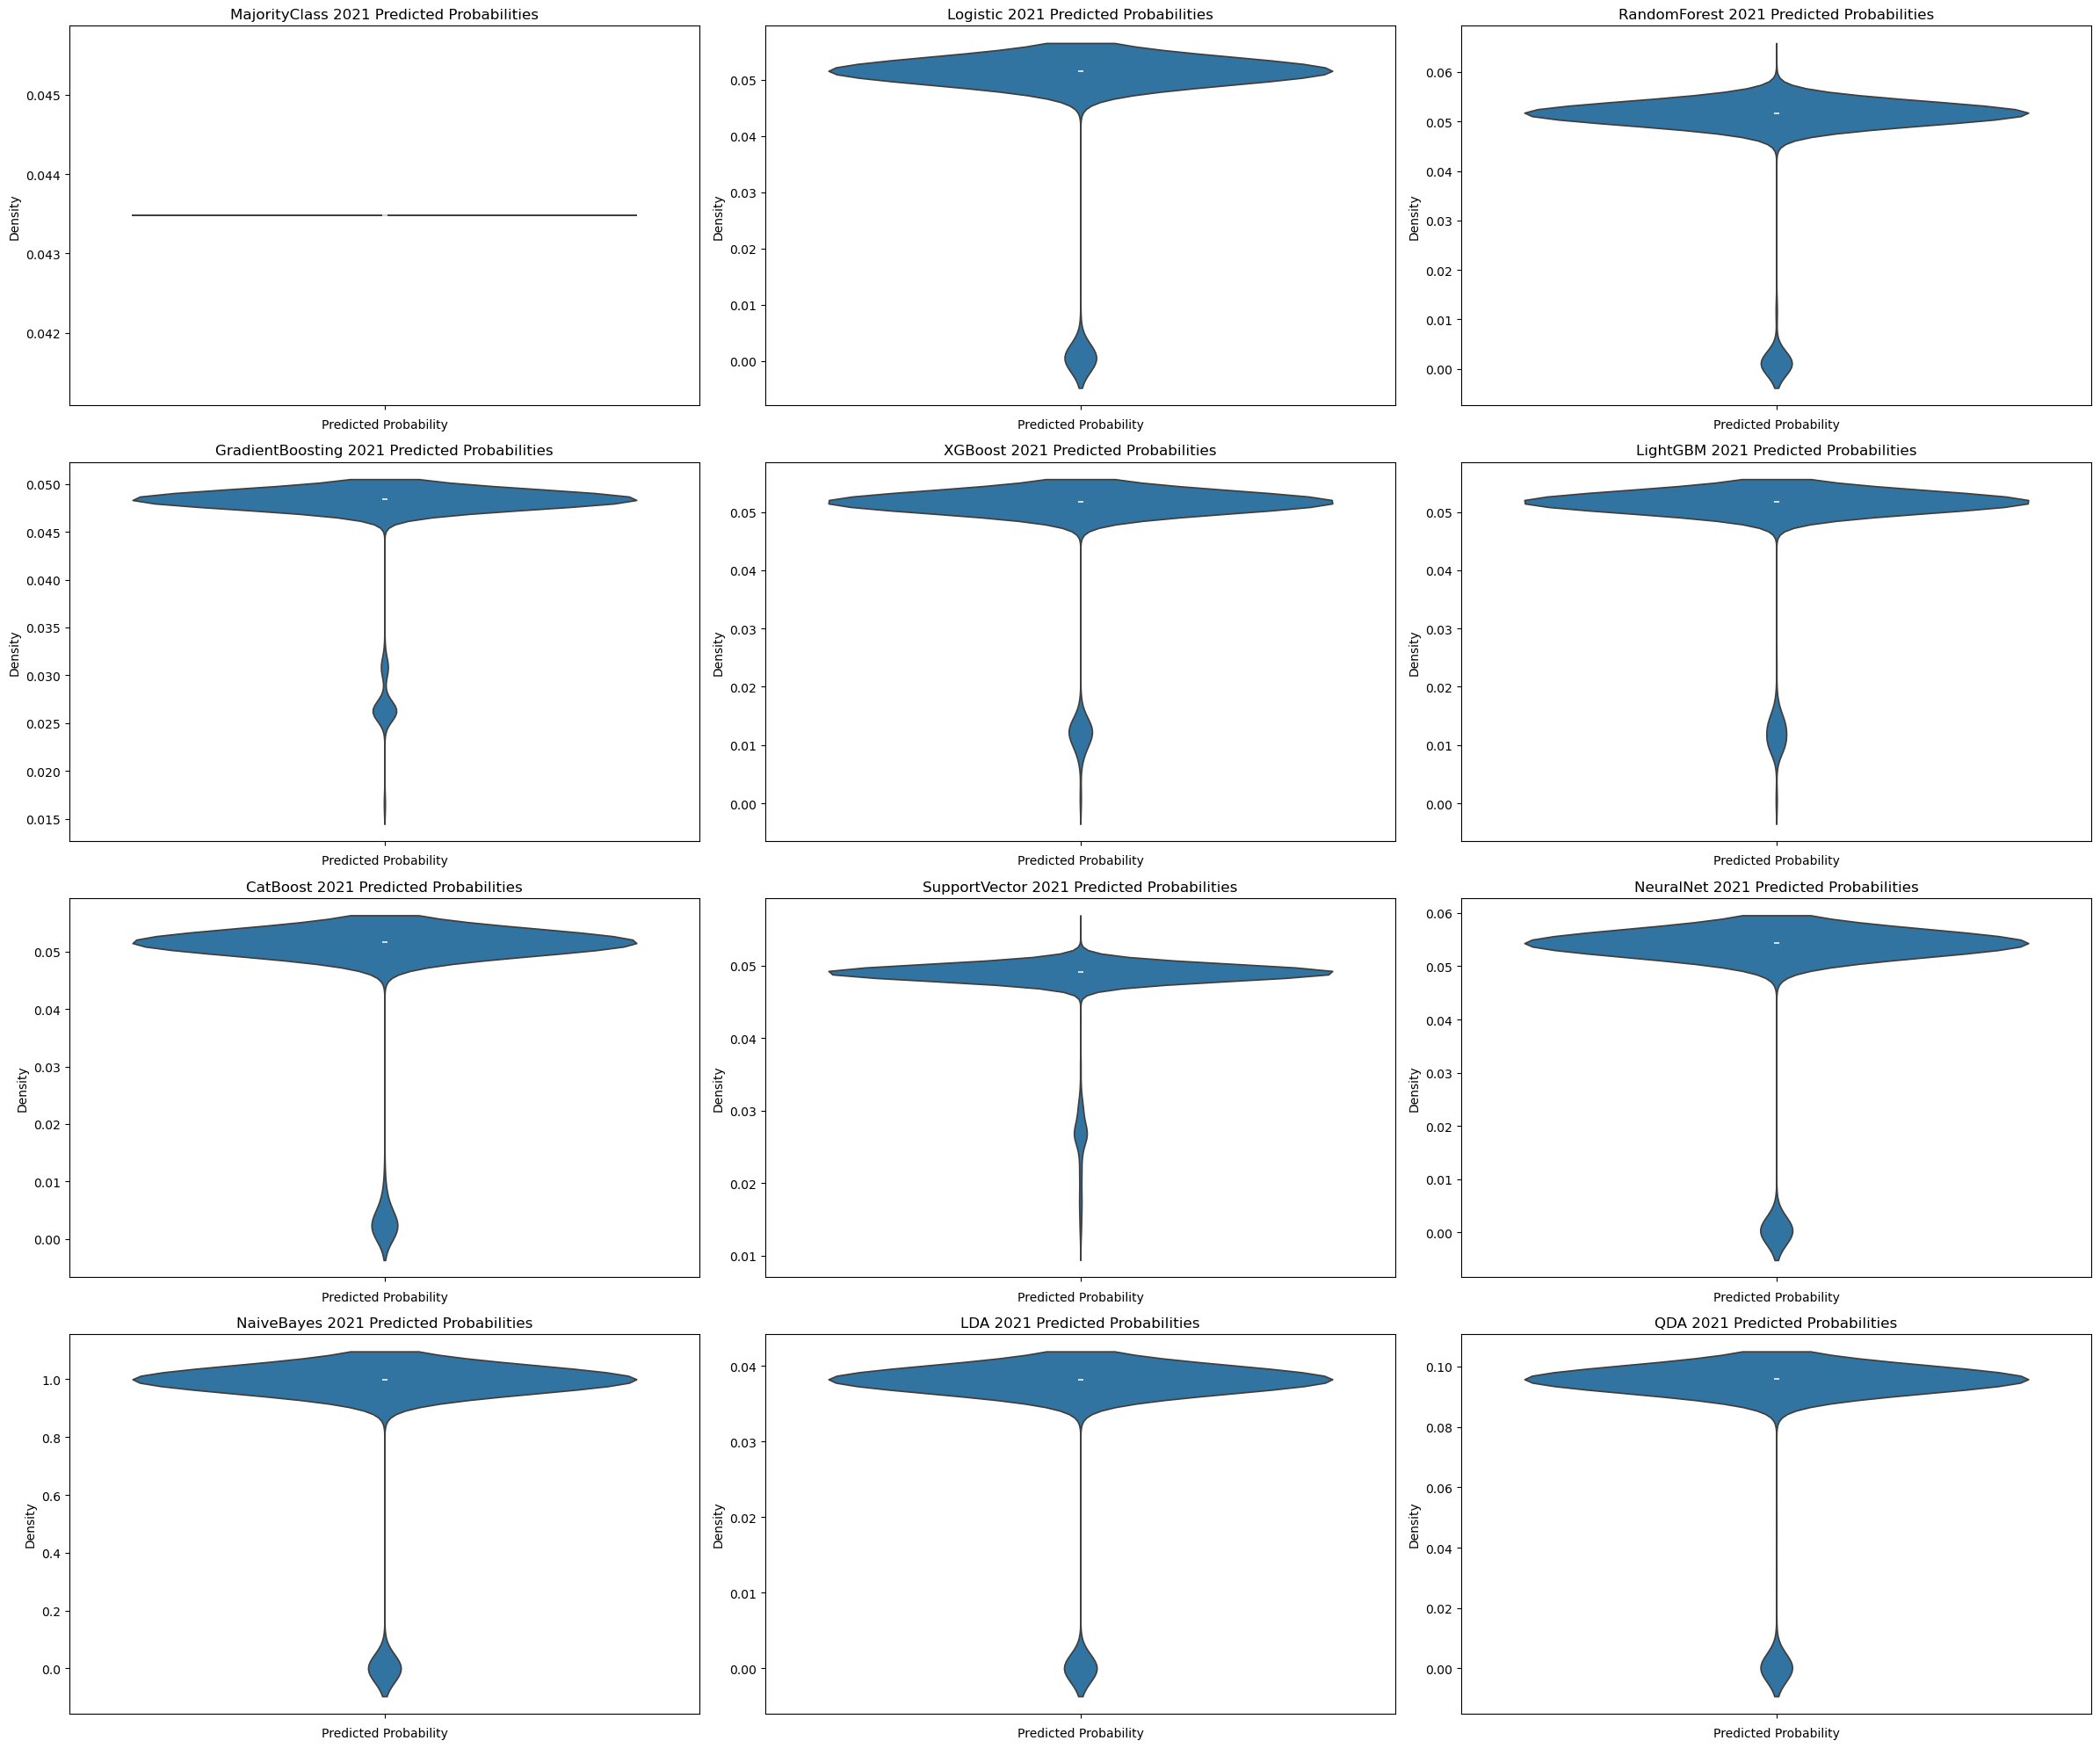

In [189]:
for cat in categories:
    print(f"Omitting {cat}")
    subset_feature_cols = []
    for c in categories:
        if c != cat:
            subset_feature_cols += get_yearly_columns(c, [2022])
    plot_metrics(models, "INV.INT.SI.Attempt2023", subset_feature_cols)

In [207]:
def iterative_prediction(df, target_cols, feature_cols, model_name, model, param_grid):
    results = {}
    print(target_cols)
    print(feature_cols)
    print(len(df))
    
    for i in range(len(target_cols) - 1):
        target_current = target_cols[i]
        target_next = target_cols[i + 1]
        
        print(f"\nTraining model to predict {target_next} using {target_current} and past predictions...")
        
        df = df.replace("missing", -1).fillna(-1)
        df = df[df[target_current] != -1]
        print(len(df))
        
        X = df[feature_cols]
        y = df[target_current]
        print(len(X))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Fine-tuning model
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        accuracy = accuracy_score(y_test, best_model.predict(X_test))
        auc_score = roc_auc_score(y_test, y_pred_proba)
        report = classification_report(y_test, best_model.predict(X_test))
        
        # Store results
        results[target_next] = {
            "model": best_model,
            "best_params": grid_search.best_params_,
            "accuracy": accuracy,
            "roc_auc": auc_score,
            "classification_report": report
        }
        
        # Use the trained model to predict probabilities for the next year
        if target_next in df.columns:
            X_next = df[feature_cols].copy()
            X_next = X_next.replace("missing", -1).fillna(-1)
            df[f"predicted_{target_next}"] = best_model.predict_proba(X_next)[:, 1]
            feature_cols.append(f"predicted_{target_next}")  # Include predictions in the next round
    
    return results

In [208]:
# target_columns = ["INV.INT.SI.Attempt2021", "INV.INT.SI.Attempt2022", "INV.INT.SI.Attempt2023"]
feature_columns = [col for col in df.columns if col.endswith("2020")]

model = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}

results = iterative_prediction(final23, get_yearly_columns(["INV.INT.SI.Attempt"], [2021, 2022, 2023]), feature_columns, "RandomForest", model, param_grid)

['INV.INT.SI.Attempt2021', 'INV.INT.SI.Attempt2022', 'INV.INT.SI.Attempt2023']
['Unnamed: 02020', 'IDX.INT.Origin.Database2020', 'IDX.INT.Origin.Record2020', 'INV.CHR.HelpSeeking.Other2020', 'INV.DBL.APSS.Q1.MindReading2020', 'INV.DBL.APSS.Q2.TVRadio2020', 'INV.DBL.APSS.Q3.Spying2020', 'INV.DBL.APSS.Q4.Auditory2020', 'INV.DBL.APSS.Q5.Controlled2020', 'INV.DBL.APSS.Q6.Visual2020', 'INV.DBL.APSS.Q7.Grandiosity2020', 'INV.DBL.APSS.Total2020', 'INV.FCT.PHQ4.Total2020', 'INV.INT.ERS.IntensityArousalTotal2020', 'INV.INT.ERS.PersistenceTotal2020', 'INV.INT.ERS.Q01.Persistence12020', 'INV.INT.ERS.Q02.Sensitivity12020', 'INV.INT.ERS.Q03.IntensityArousal12020', 'INV.INT.ERS.Q04.IntensityArousal22020', 'INV.INT.ERS.Q05.Sensitivity22020', 'INV.INT.ERS.Q06.IntensityArousal32020', 'INV.INT.ERS.Q07.Sensitivity32020', 'INV.INT.ERS.Q08.Persistence22020', 'INV.INT.ERS.Q09.Sensitivity42020', 'INV.INT.ERS.Q10.Persistence32020', 'INV.INT.ERS.Q11.Persistence42020', 'INV.INT.ERS.Q12.Sensitivity52020', 'INV.I

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'MATT B'

--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/weili/micromamba/envs/cs109a/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'random people i met on the internet'


End of notebook :)

<div style="background-color: #007BFF; height: 4px; width: 100%;"></div>